<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>
<h1><center><font size=6>Artificial Intelligence and Machine Learning</center></font></h1>
<h2><center>Feature Selection, Model Selection and Tuning</center></h2>

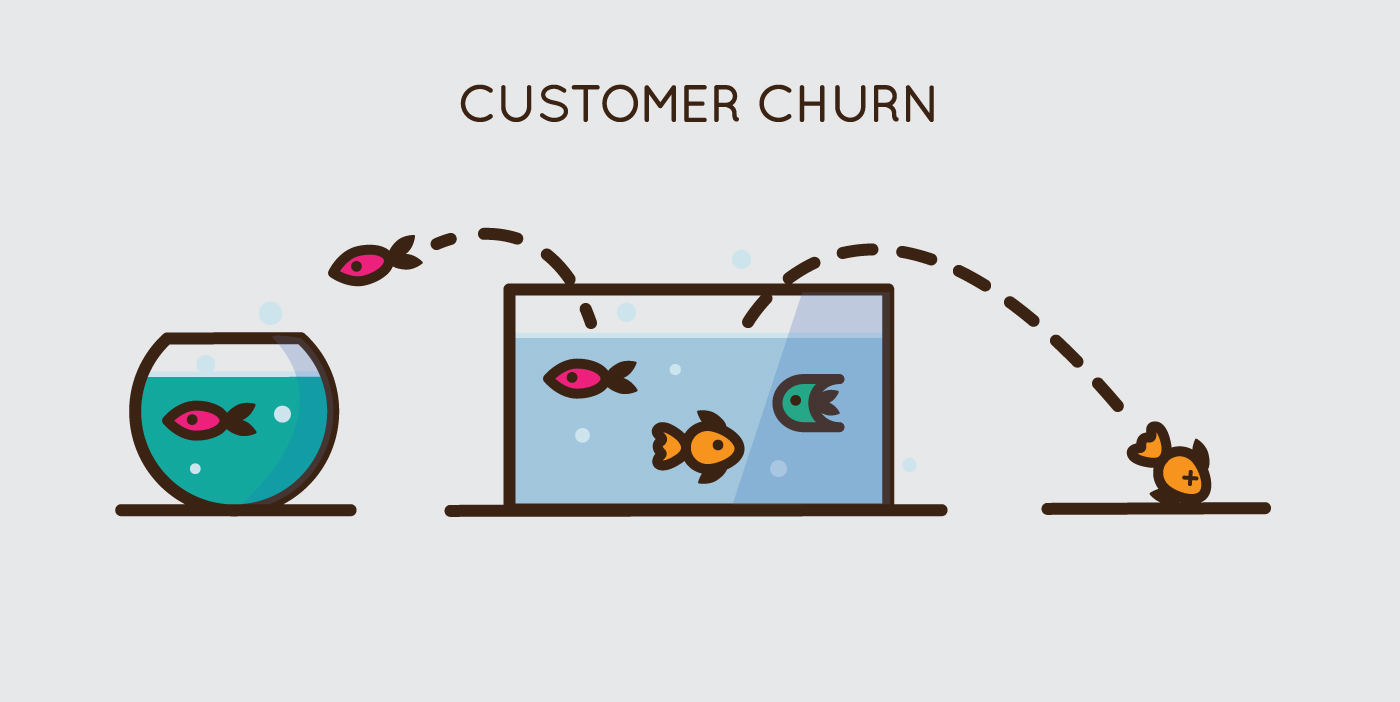

<b><h2><center>Project Credit Card Users Churn Prediction</center></h2></b>
<b><h3><center>By Dario H. Romero</center></h3></b>

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

**Table of Content**
- Description
    - Background & Context
    - Objective
    - Data Dictionary
- Import Libraries
- Import Dataset

- EDA & Insights
    - Univariate analysis 
    - Bivariate analysis 
    - Key meaningful observations on individual variables and the relationship between variables (5)

- Data pre-processing
    - Prepare the data for analysis 
    - Feature Engineering 
    - Missing value Treatment 
    - Outlier Treatment<p>
      __Note__: Please ensure no data leakage occurs among train-test and validation sets (3)

- Model building
    - Choose metric on interest 
    - Build 6 models (from logistic regression, decision trees, bagging and boosting methods)<p> 
      __Note__: You can choose not to build XGBoost if you are facing issues with the installation (3)

- Model building: Oversampled data
    - Build 6 models using `oversampled` data
        - logistic regression, 
        - decision trees, 
        - bagging and 
        - boosting methods    
    - You can choose not to build XGBoost if you are facing issues with the installation (4)

- Model building: Undersampled data
    - Build 6 models using `undersampled` data
        - logistic regression, 
        - decision trees, 
        - bagging and 
        - boosting methods<p> (4)
      
- Hyperparameter tuning using random search
    - Choose models that might perform better after tuning (tune at least 3 models out of 18 built in the previous steps) 
    - Provide proper reasoning for tuning that model 
    - Tune the best 3 models obtained above using randomized search and metric of interest 
    - Check the performance of 3 tuned models (7)

- Model Performances
    - Compare the model performance of tuned models 
    - Choose the best model (4)

- Productionize the model
    - Create a final model using pipelines (3)
    
- Actionable Insights & Recommendations

- Business recommendations and insights

## Description

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services `'so that customers do not renounce'` their credit cards. This is known as `'customer churn'` or `'churning'`.

You need to identify the best possible model that will give the required performance.

### Objective

In identifying the best possible model you need to perform the following major activities:

* Explore and visualize the dataset.

* Build a classification model to predict if the customer is going to churn or not

* Optimize the model using appropriate techniques

* Generate a set of insights and recommendations that will help the bank

### Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## EDA & Insights

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from p5_utils import (
    labeled_barplot,
    histogram_boxplot,
    plot_univariate,
    get_outliers,
    get_stats,
    stacked_barplot,
    make_confusion_matrix,
    confusion_matrix_sklearn,
    get_metrics_score,
    model_performance_classification_sklearn,
)


# To tune a model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    plot_confusion_matrix,
)

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# to display and store Matplotlib plots within a Python Jupyter notebook
%matplotlib inline

# enable retina display
%config InlineBackend.figure_format='retina'

# set style similar to ggplot in R
plt.style.use("ggplot")

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

In [4]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

np.set_printoptions(edgeitems=20, linewidth=100)
np.set_printoptions(suppress=True)
pd.set_option("expand_frame_repr", False)

sns.set_style(style="darkgrid")

<IPython.core.display.Javascript object>

### Import Dataset

In [5]:
# read dataset and make a safety copy to work with
df = pd.read_csv("BankChurners.csv")
data = df.copy()

<IPython.core.display.Javascript object>

In [6]:
# show first 5 rows
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0  768805383  Existing Customer            45      M                3     High School        Married     $60K - $80K          Blue              39                         5                       1                      3       12691.0                  777          11914.0                 1.335             1144              42                1.625                  0.061
1  818770008  Existing Customer            49      F                5        Graduate         Single  Less than $40K          Blue              44                         6                       1                      2        8256.0                  864           7392.0                 1.541             1291              33                3.714                  0.105
2  713982108  Existing Customer            51      M                3        Graduate        Married    $80K - $120K          Blue              36                         4                       1                      0        3418.0                    0           3418.0                 2.594             1887              20                2.333                  0.000
3  769911858  Existing Customer            40      F                4     High School            NaN  Less than $40K          Blue              34                         3                       4                      1        3313.0                 2517            796.0                 1.405             1171              20                2.333                  0.760
4  709106358  Existing Customer            40      M                3      Uneducated        Married     $60K - $80K          Blue              21                         5                       1                      0        4716.0                    0           4716.0                 2.175              816              28                2.500                  0.000

<IPython.core.display.Javascript object>

In [7]:
# show last 5 rows
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
10122  772366833  Existing Customer            50      M                2        Graduate         Single     $40K - $60K          Blue              40                         3                       2                      3        4003.0                 1851           2152.0                 0.703            15476             117                0.857                  0.462
10123  710638233  Attrited Customer            41      M                2             NaN       Divorced     $40K - $60K          Blue              25                         4                       2                      3        4277.0                 2186           2091.0                 0.804             8764              69                0.683                  0.511
10124  716506083  Attrited Customer            44      F                1     High School        Married  Less than $40K          Blue              36                         5                       3                      4        5409.0                    0           5409.0                 0.819            10291              60                0.818                  0.000
10125  717406983  Attrited Customer            30      M                2        Graduate            NaN     $40K - $60K          Blue              36                         4                       3                      3        5281.0                    0           5281.0                 0.535             8395              62                0.722                  0.000
10126  714337233  Attrited Customer            43      F                2        Graduate        Married  Less than $40K        Silver              25                         6                       2                      4       10388.0                 1961           8427.0                 0.703            10294              61                0.649                  0.189

<IPython.core.display.Javascript object>

In [8]:
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

* data initially contains 10,127 rows and 21 columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

**Observations**
* There are 10 columns with data types `int64`, 6 columns with data types `object`, and 5 columns with data type `float64`
* from the initial 10,127 rows, the columns `Education_Level` and `Marital_Status` have missing data

In [10]:
data["CLIENTNUM"].duplicated().sum()

0

<IPython.core.display.Javascript object>

* feature `CLIENTUM` has no business importance for the modeling problem. Column will be dropped.

In [11]:
data.drop(columns=["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
data.describe(include="all").T

count unique                top  freq         mean          std     min     25%     50%      75%      max
Attrition_Flag              10127      2  Existing Customer  8500          NaN          NaN     NaN     NaN     NaN      NaN      NaN
Customer_Age              10127.0    NaN                NaN   NaN     46.32596     8.016814    26.0    41.0    46.0     52.0     73.0
Gender                      10127      2                  F  5358          NaN          NaN     NaN     NaN     NaN      NaN      NaN
Dependent_count           10127.0    NaN                NaN   NaN     2.346203     1.298908     0.0     1.0     2.0      3.0      5.0
Education_Level              8608      6           Graduate  3128          NaN          NaN     NaN     NaN     NaN      NaN      NaN
Marital_Status               9378      3            Married  4687          NaN          NaN     NaN     NaN     NaN      NaN      NaN
Income_Category             10127      6     Less than $40K  3561          NaN          NaN     NaN     NaN     NaN      NaN      NaN
Card_Category               10127      4               Blue  9436          NaN          NaN     NaN     NaN     NaN      NaN      NaN
Months_on_book            10127.0    NaN                NaN   NaN    35.928409     7.986416    13.0    31.0    36.0     40.0     56.0
Total_Relationship_Count  10127.0    NaN                NaN   NaN      3.81258     1.554408     1.0     3.0     4.0      5.0      6.0
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN     2.341167     1.010622     0.0     2.0     2.0      3.0      6.0
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN     2.455317     1.106225     0.0     2.0     2.0      3.0      6.0
Credit_Limit              10127.0    NaN                NaN   NaN  8631.953698   9088.77665  1438.3  2555.0  4549.0  11067.5  34516.0
Total_Revolving_Bal       10127.0    NaN                NaN   NaN  1162.814061   814.987335     0.0   359.0  1276.0   1784.0   2517.0
Avg_Open_To_Buy           10127.0    NaN                NaN   NaN  7469.139637  9090.685324     3.0  1324.5  3474.0   9859.0  34516.0
Total_Amt_Chng_Q4_Q1      10127.0    NaN                NaN   NaN     0.759941     0.219207     0.0   0.631   0.736    0.859    3.397
Total_Trans_Amt           10127.0    NaN                NaN   NaN  4404.086304  3397.129254   510.0  2155.5  3899.0   4741.0  18484.0
Total_Trans_Ct            10127.0    NaN                NaN   NaN    64.858695     23.47257    10.0    45.0    67.0     81.0    139.0
Total_Ct_Chng_Q4_Q1       10127.0    NaN                NaN   NaN     0.712222     0.238086     0.0   0.582   0.702    0.818    3.714
Avg_Utilization_Ratio     10127.0    NaN                NaN   NaN     0.274894     0.275691     0.0   0.023   0.176    0.503    0.999

<IPython.core.display.Javascript object>

**Observations**
* `Attrition_Flag` is the target variable. Its highest frequent value is `'Existing Customer'` and it is highly unbalanced.
* `Customer_Age` range goes from 26 to 73 years old with a median of 46.
* `Gender` is binary with `'F'`-female being the predominant value.
* `Dependent_count` range from `0` to `5` dependents.
* `Education_Level` has `6` values with `'Graduate'` as the top frequency.
* `Marital_Status` has `3` values with `'Married'` as the most frequent.
* `Income_Category` has `6` possible values with `'Less than $40K'` accounting for almost a third of the observations.
* `Card_Category` has `4` values with `'Blue'` being the top frequent category over `90%` of the time.
* `Months_on_book` is of type `numerical` with a range from `13` to `56`.
* `Total_Relationship_Count` range from `1` to `6`.
* `Months_Inactive_12_mon` range from `0` to `6`.
* `Contacts_Count_12_mon` also range from `0` to `6`.
* `Credit_Limit` goes from `1,483` to `34,516` with a median of `4,549`.
* `Total_Revolving_Bal` range from `0` to `2,517` with a median of `1,276`.
* `Avg_Open_To_Buy` range from `3` to `34,516` with a median of `3,474`.
* `Total_Amt_Chng_Q4_Q1` is ranging from `0` to ~`3.4`.
* `Total_Trans_Amt` ranges from `510` to `18,484` with a median of `3,899`.
* `Total_Trans_Ct` goes from `10` to `139` with a median of `67`.
* `Total_Ct_Chng_Q4_Q1` range from `0` to `3.7` with a median of `0.7`.
* `Avg_Utilization_Ratio` range from `0` to `0.999` with a median of `0.176`.

### Univariate Analysis

#### Observations on Attrition_Flag

object


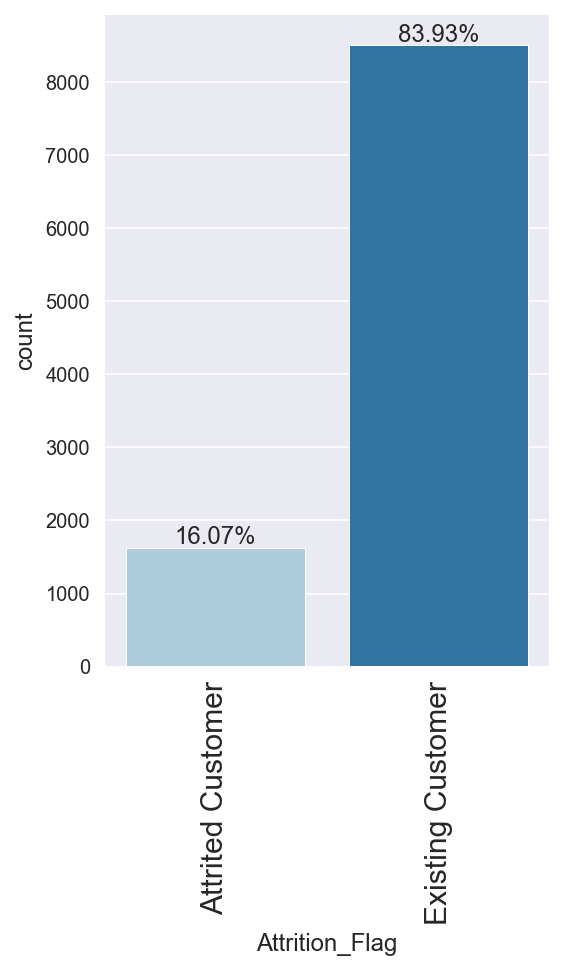

<IPython.core.display.Javascript object>

In [13]:
plot_univariate(data, "Attrition_Flag")

* Almost 84% of customers has no 'attrition' qualification.

#### Observations on Customer_Age

int64


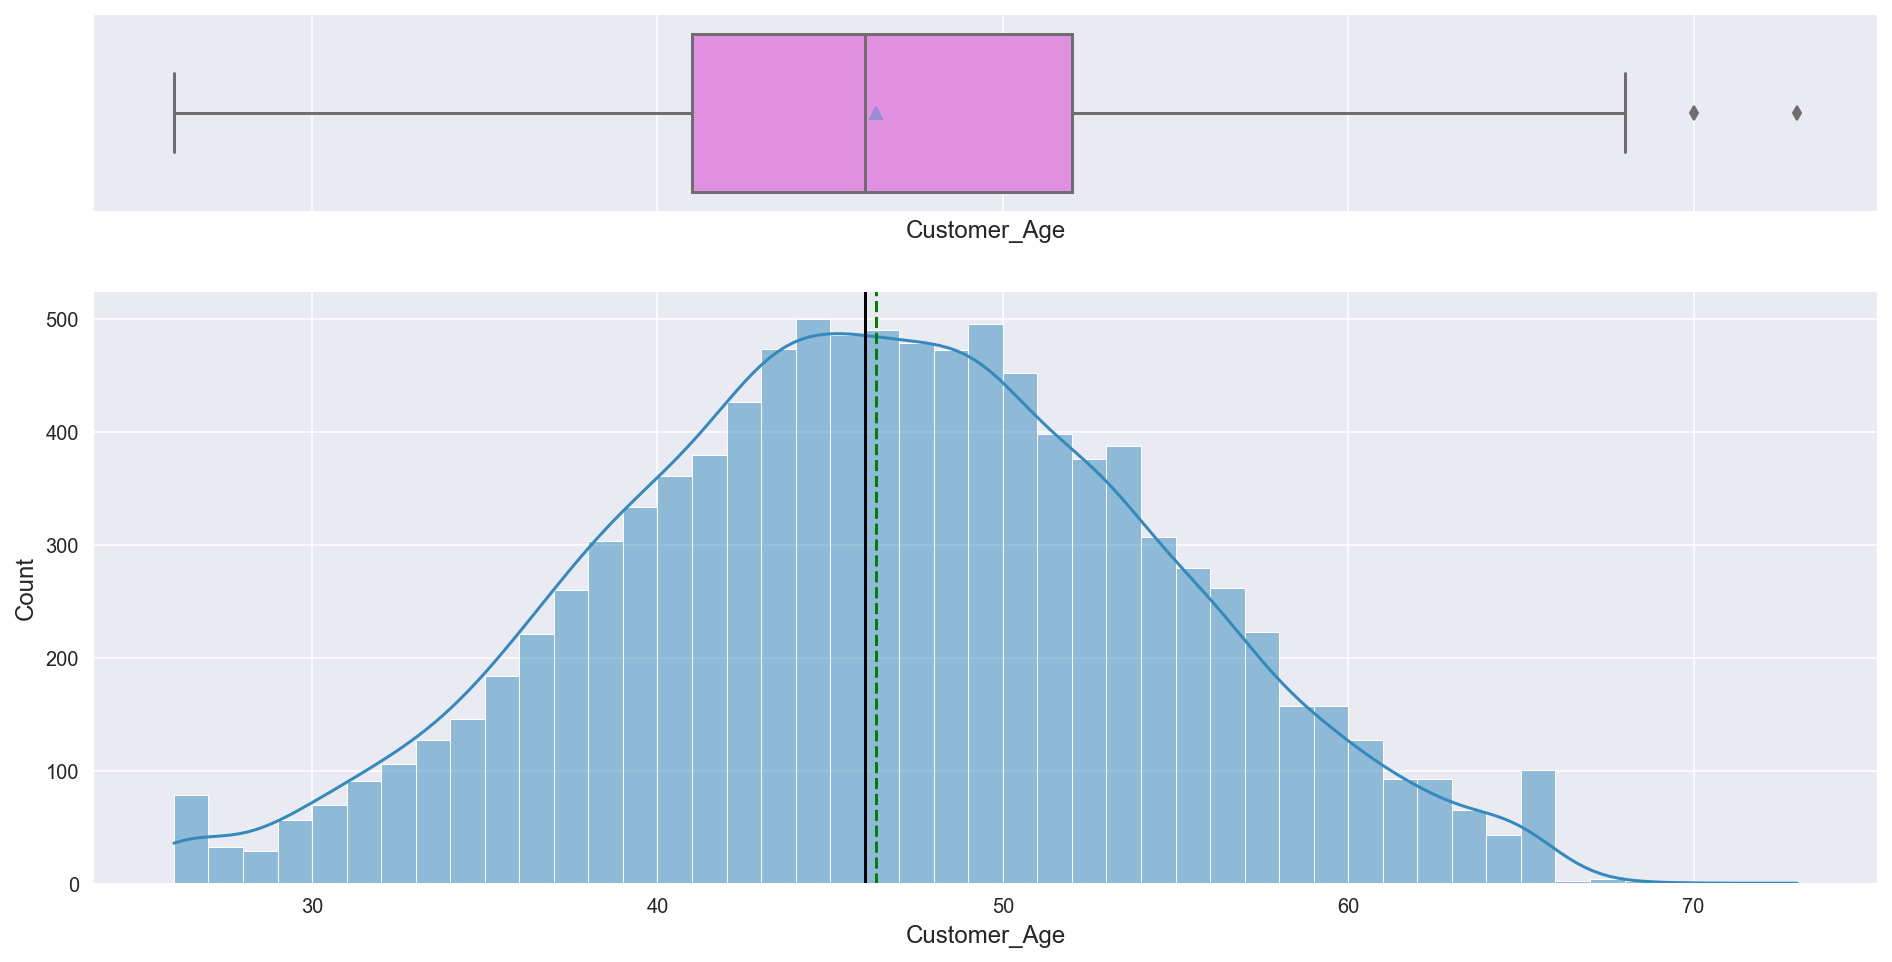

<IPython.core.display.Javascript object>

In [14]:
plot_univariate(data, "Customer_Age")

* 'Customer_Age' distribution looks fairly normal (gaussian) with some outliers to the right of the median.

#### Observations on Gender

object


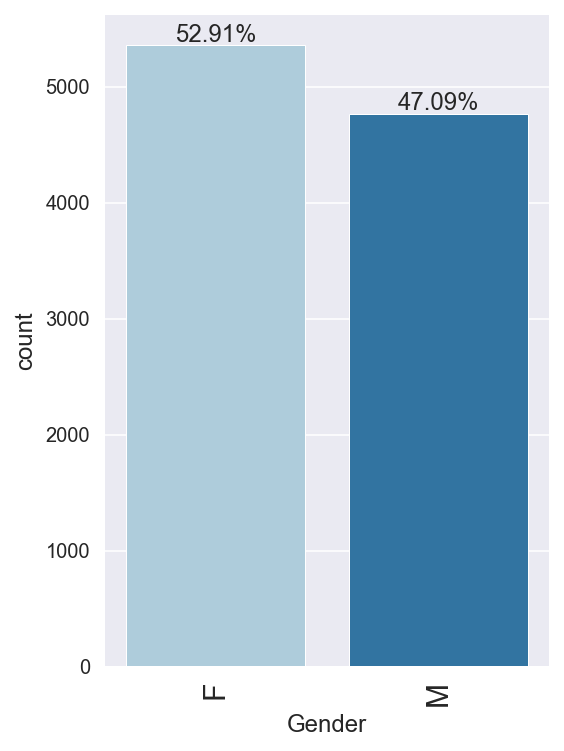

<IPython.core.display.Javascript object>

In [15]:
plot_univariate(data, "Gender")

* 'Gender' has almost 53% 'female' population and 47% 'male'.

#### Observations on Dependent_count

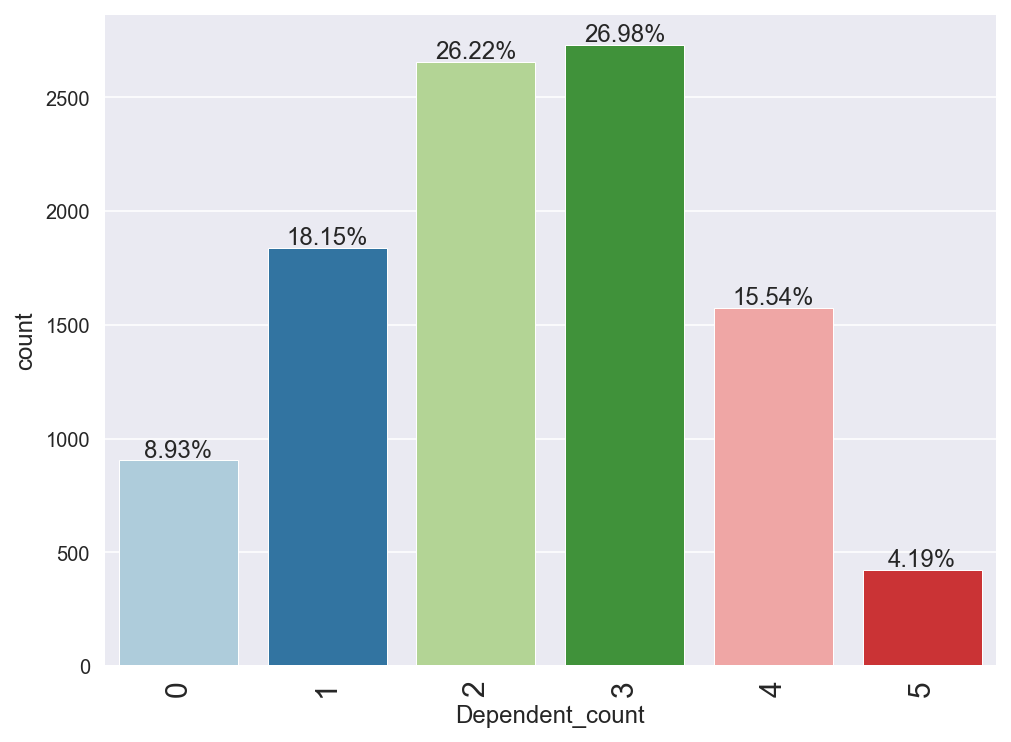

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data, "Dependent_count", True)

* 'Dependent_count' has almost 53% of population with with '2' and '3' dependents altogether.
* Second in frequency of number of dependents is with '1' and '4' with 18% and 16% respectively.
* Lowest frequency lies within number of dependents '0' and '5' with 9% and 4%.

#### Observations on Education_Level

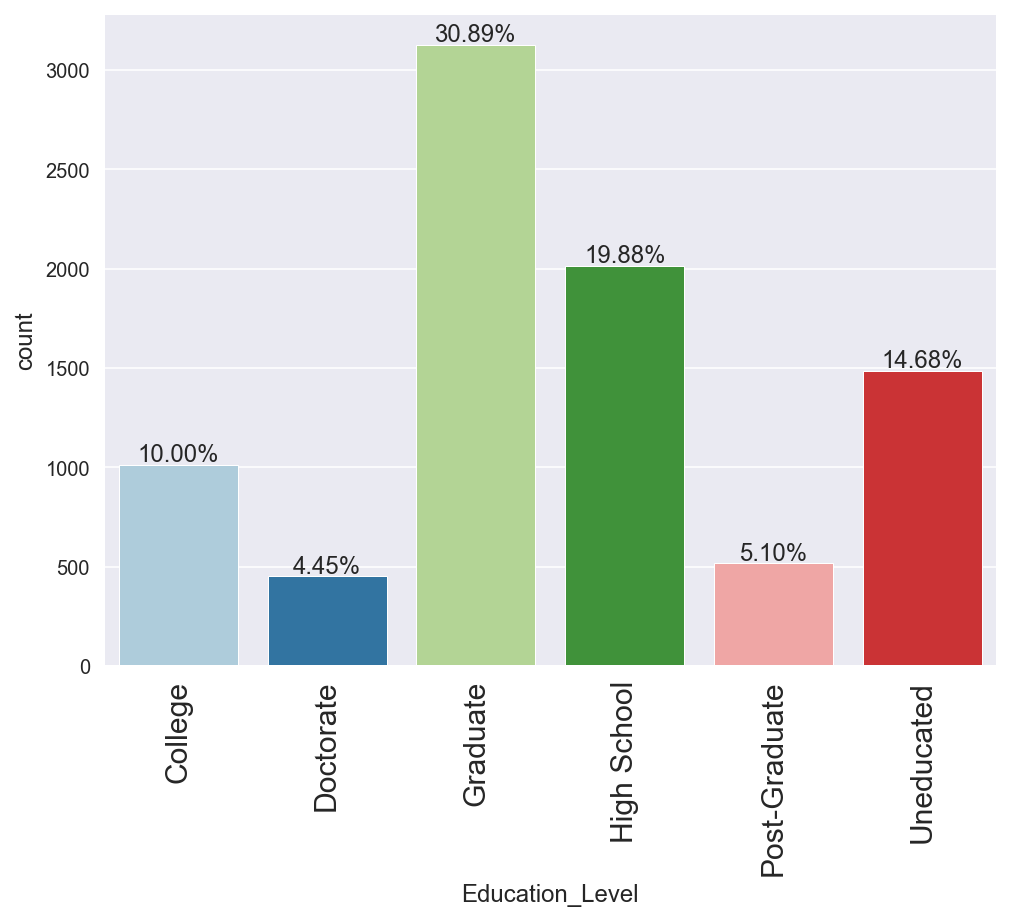

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "Education_Level", True)

* 'Graduate' is the most frequent 'Education_Level' with ~31%, followed by 'High School' with ~20%.
* Next in frequency is 'Uneducated' with ~15%, followed by 'College' at 10%.
* Lowest frequency lies within 'Post-Graduate' with 5.1% and 'Doctorate' with 4.5%.

#### Observations on Marital_Status

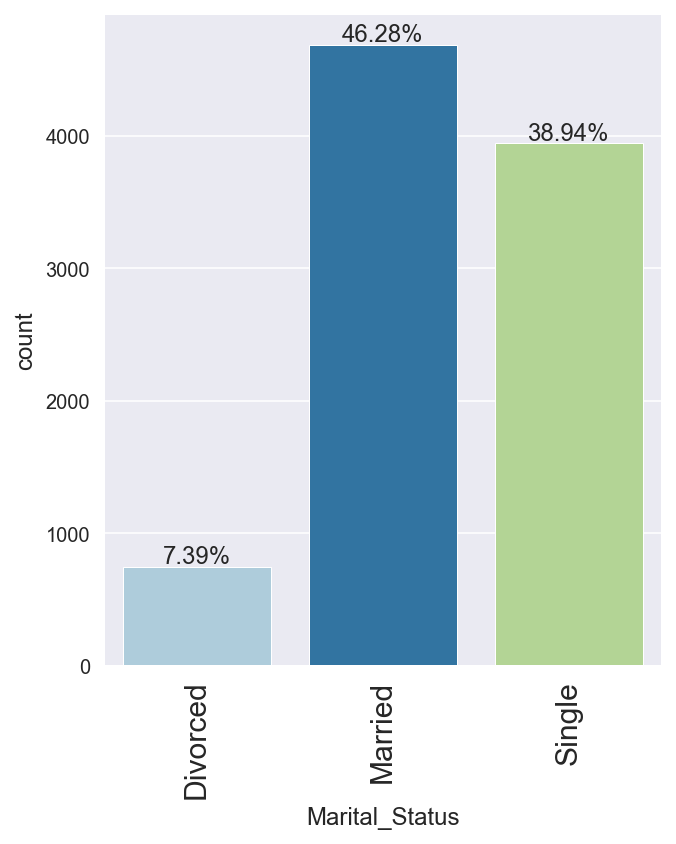

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "Marital_Status", True)

* 'Married' is the most frequent 'Marital_Status' with 46%, followed by 'Single' with ~39%.
* Lowest frequency lies within 'Divorced' with 7.4%.

#### Observations on Income_Category

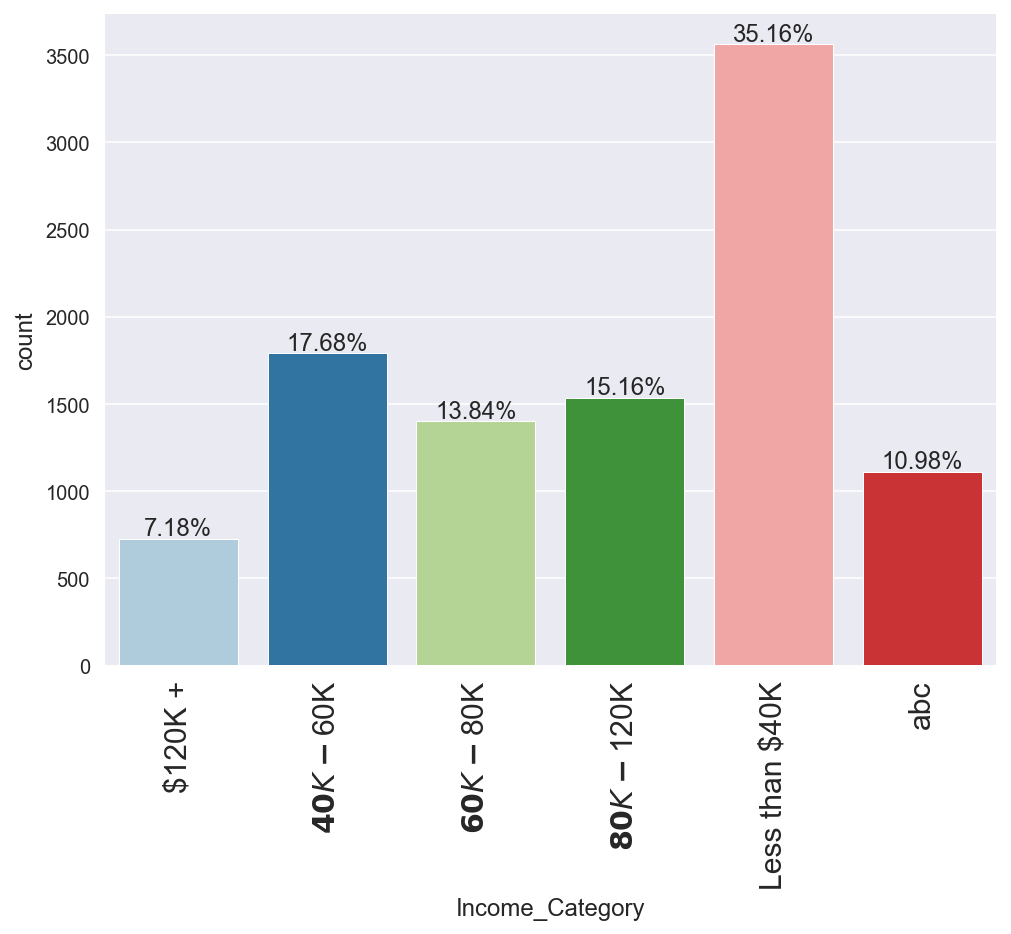

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(data, "Income_Category", True)

* On 'Income_Category' the highest percentage is for 'Less than $40K' with 35.2%.

* Next in frequency we found customers with income within '40K - 60K' with ~18%.

* The brackets '60K - 80K' and '80K - 120K' are 14% and 15% respectively.

* Lowest frequency belongs to '$120K +' with a 7.2%.

* There is a 'strange' segment called 'abc' with ~11%. We will investigate this further. 

#### Observations on Card_Category

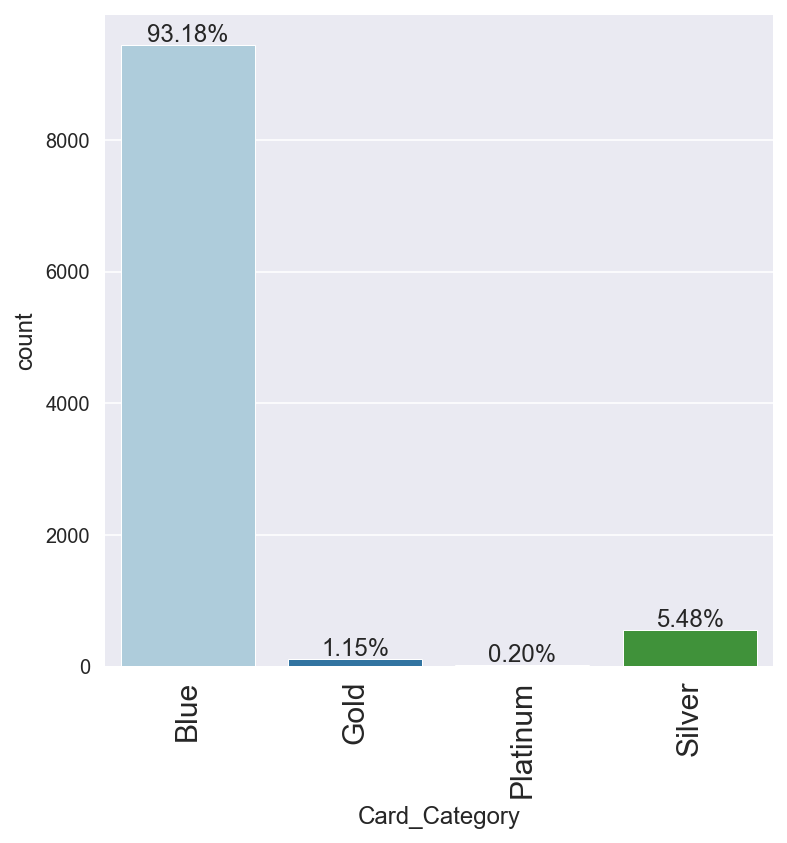

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "Card_Category", True)

* On 'Card_Category' the highest percentage is for 'Blue' level with 93.2%.

* Next in frequency we found customers with level 'Silver' on 5.5%.

* Lowest frequency belongs to levels 'Gold' and 'Platinum' with 1.2% and 0.2% respectively.

#### Observations on Months_on_book

int64


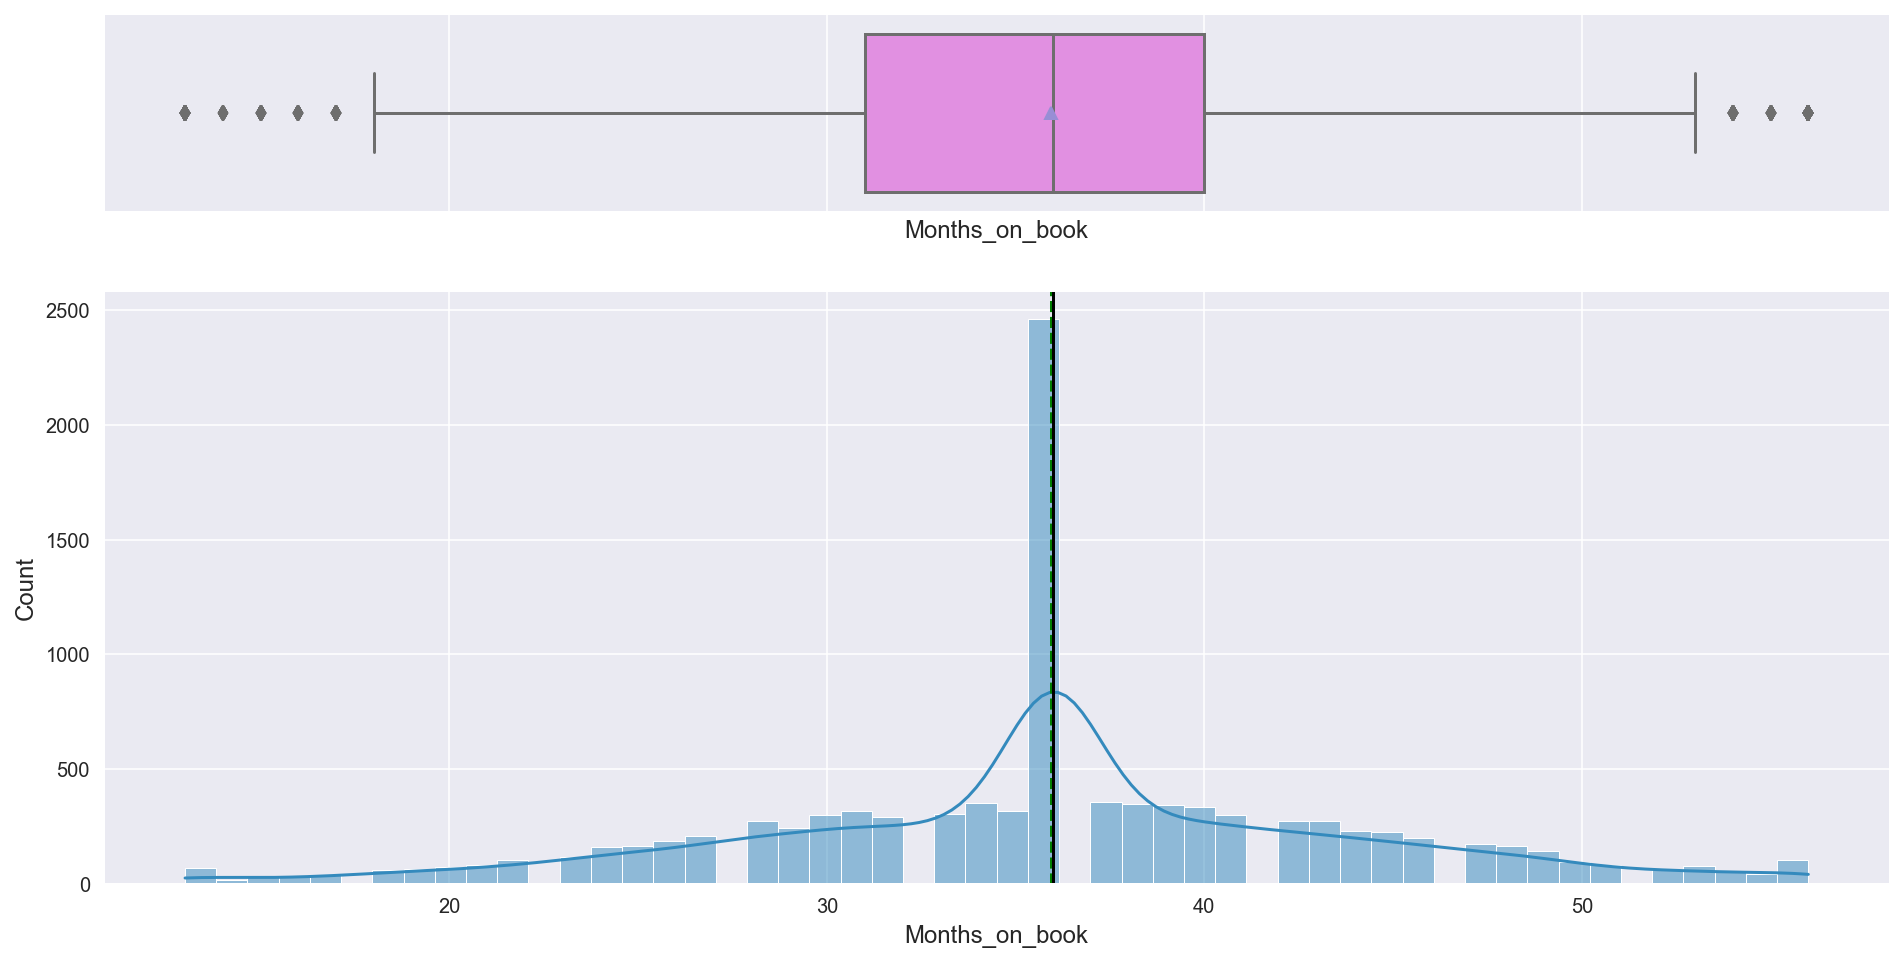

<IPython.core.display.Javascript object>

In [21]:
plot_univariate(data, "Months_on_book")

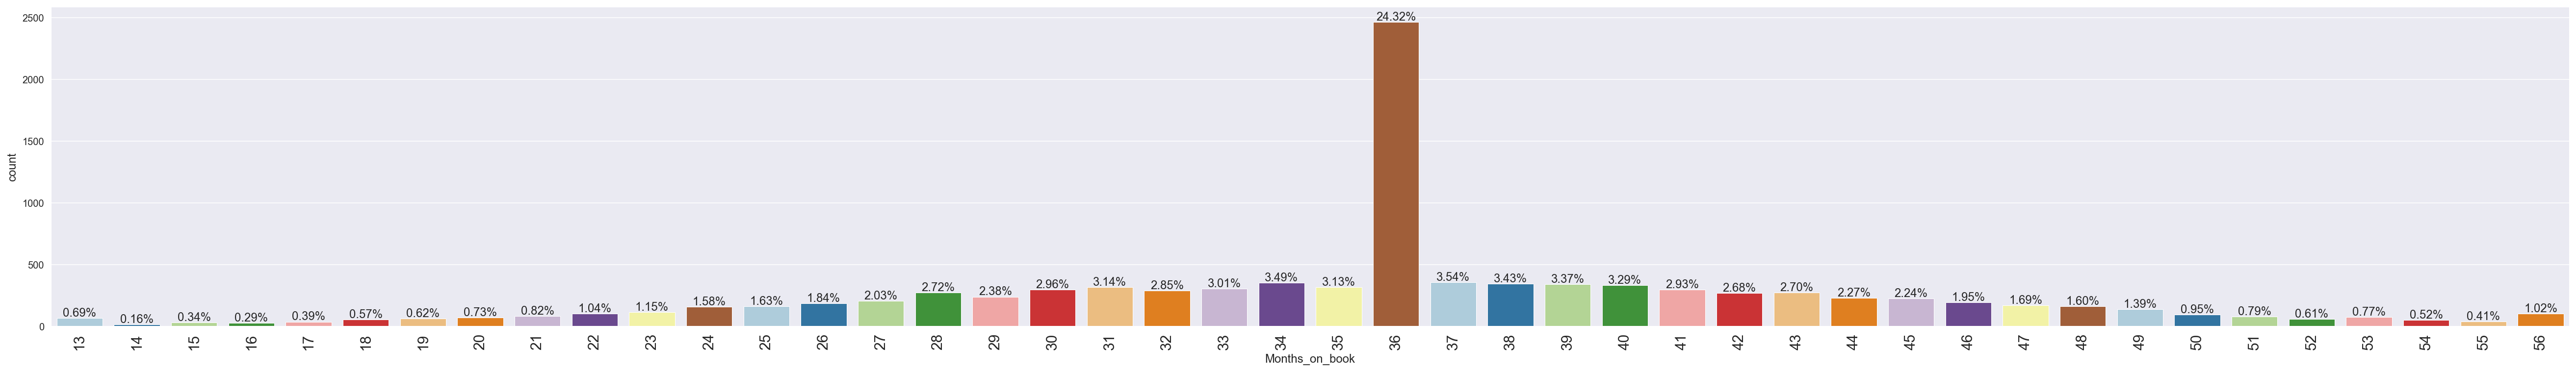

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "Months_on_book", True)

* On 'Months_on_book' the highest percentage is for '36' months with 24.3%.

* Distribution looks pretty normal (gaussian) and a few outliers on the left and right of the box plot.

#### Observations on Total_Relationship_Count

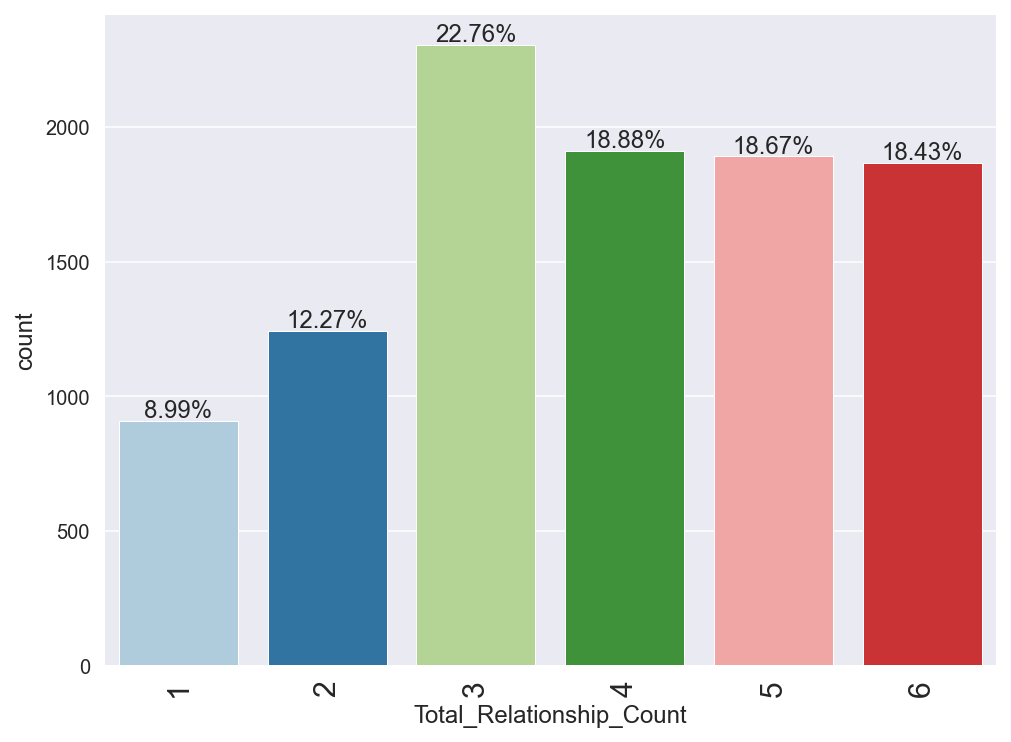

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Total_Relationship_Count", True)

* On 'Total_Relationship_Count' the highest percentage is for '3' counts with ~23%.
* Next in frequency are '4', '5', and '6' counts with 18.9%, 18.7% and 18.4% respectively.
* Lowest frequency belongs to counts '2' and '1' with 12.3% and 9% respectively.

#### Observations on Months_Inactive_12_mon

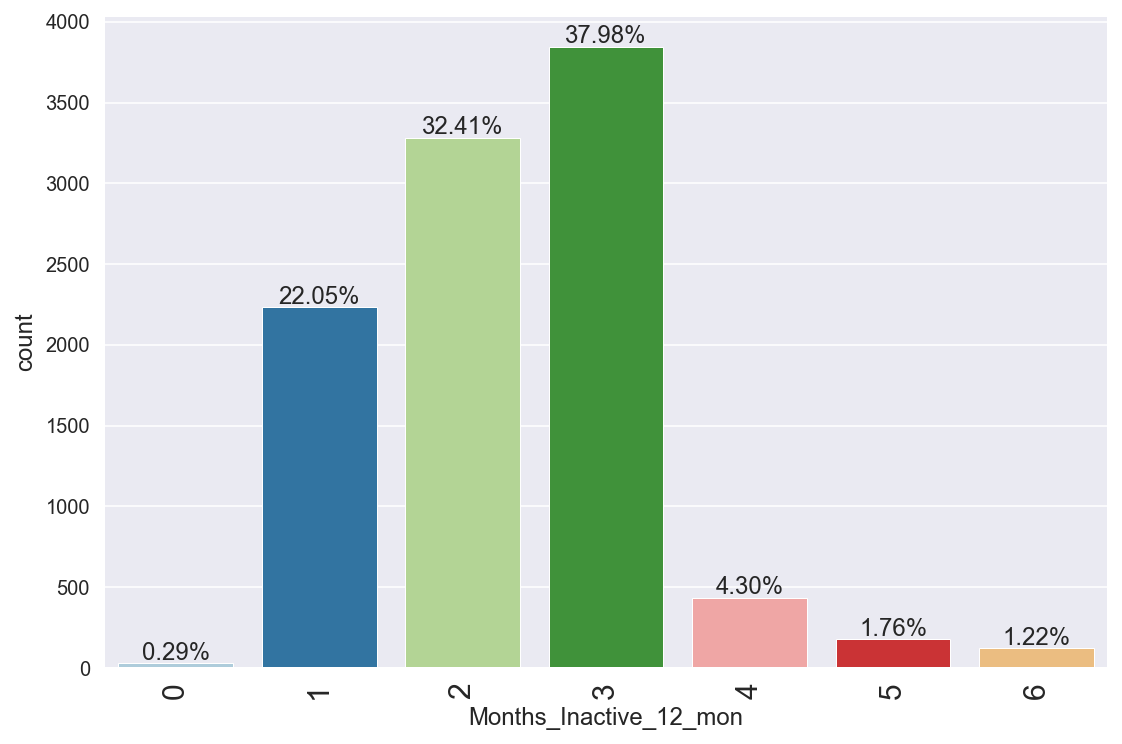

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "Months_Inactive_12_mon", True)

* On 'Months_Inactive_12_mon' the highest percentage is for '3' counts with ~38%.
* Next in frequency are '2', and '1' with 32.4%, and 22% respectively.
* Lowest frequency belongs to counts '4', '5' and '6' with 4.3%, 1.8%, and 1.2% respectively.

#### Observations on Contacts_Count_12_mon

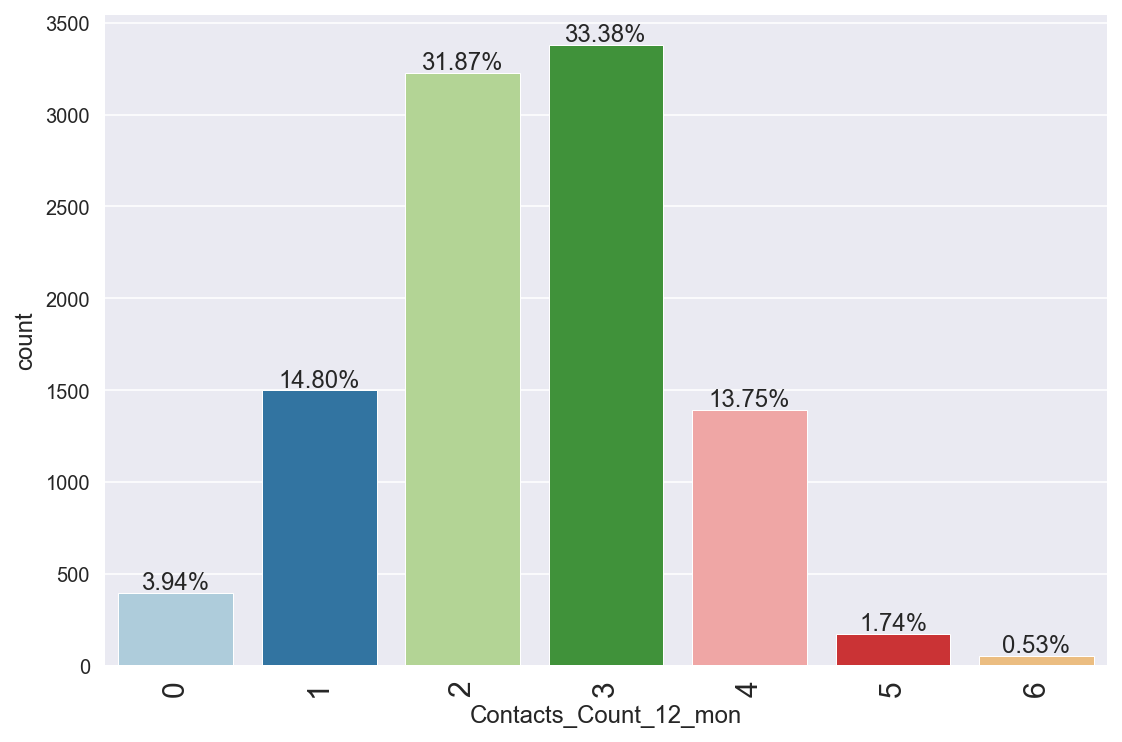

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "Contacts_Count_12_mon", True)

* On 'Contacts_Count_12_mon' the highest percentage is for '3', and '2' counts with ~33.4%, and 31.9%.
* Next in frequency are '1', and '4' with 14.8%, and 13.8% respectively.
* Lowest frequency belongs to counts '0', '5', and '6' with 3.9%, 1.7%, and 0.5% respectively.

#### Observations on Credit_Limit

float64


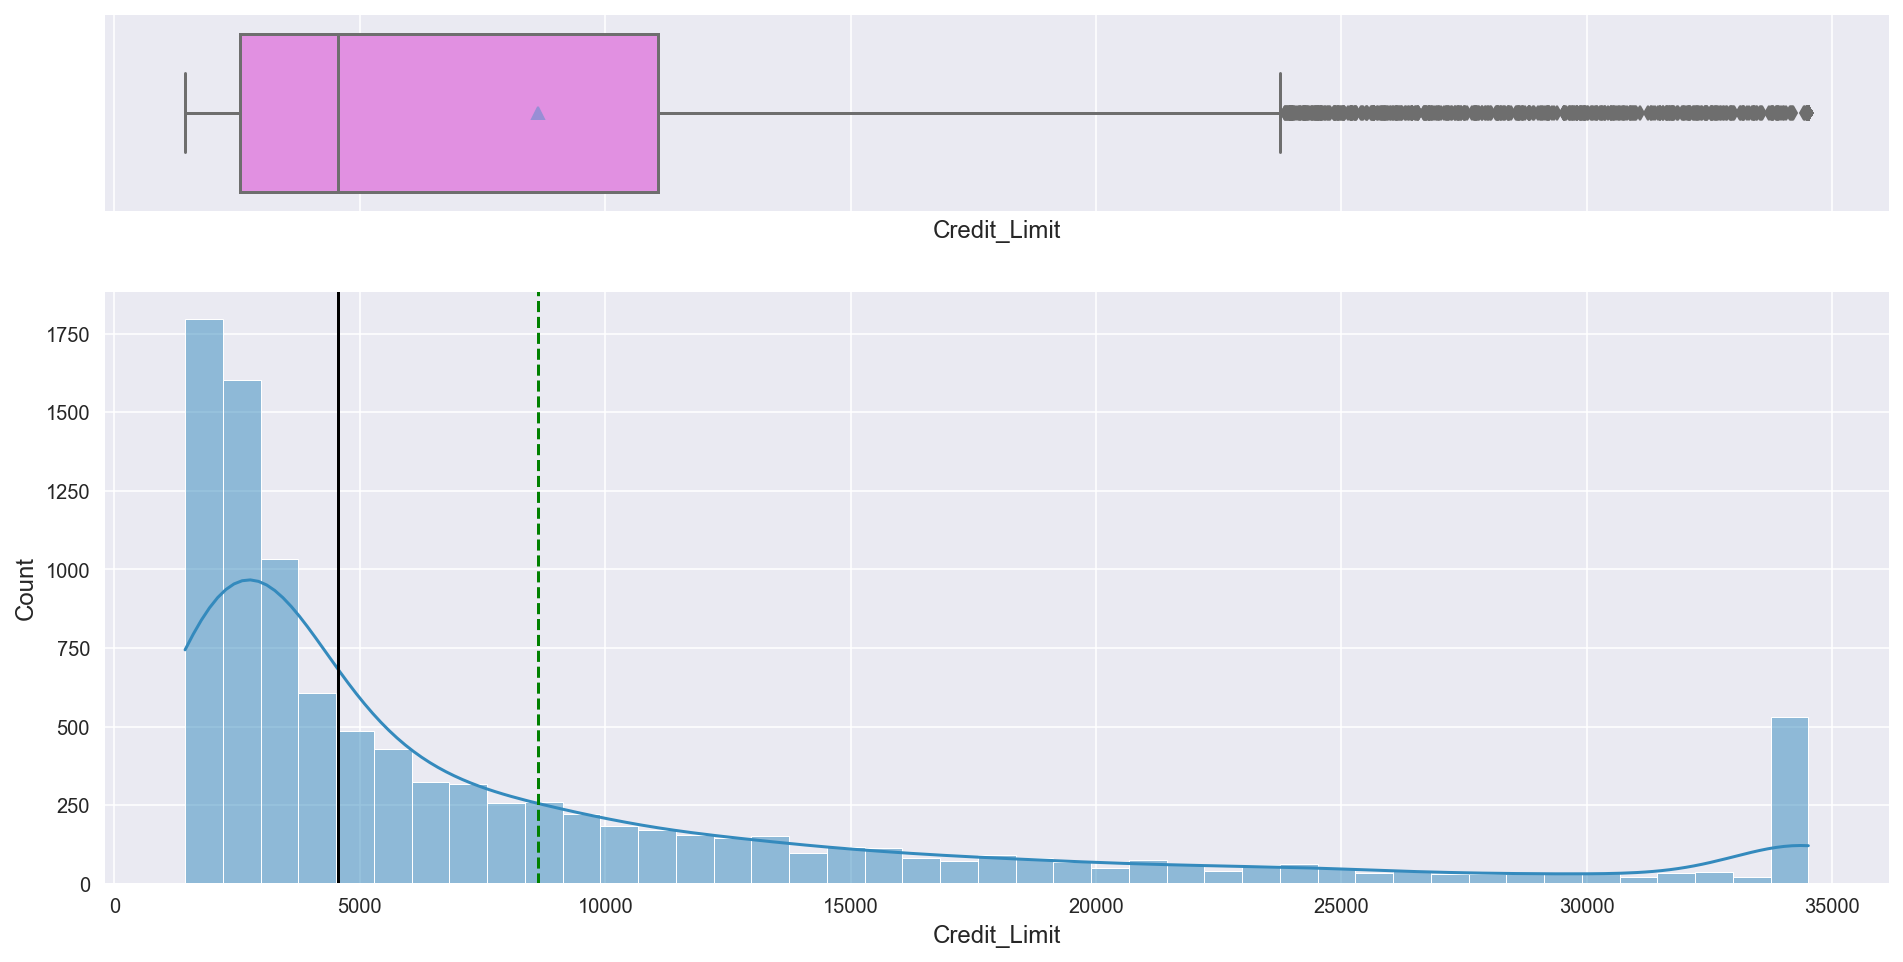

<IPython.core.display.Javascript object>

In [26]:
plot_univariate(data, "Credit_Limit")

* On 'Credit_Limit' the distribution looks skewed to the right but 'gaussian' and a considerable number of outliers to the right of the median.

#### Observations on Total_Revolving_Bal

int64


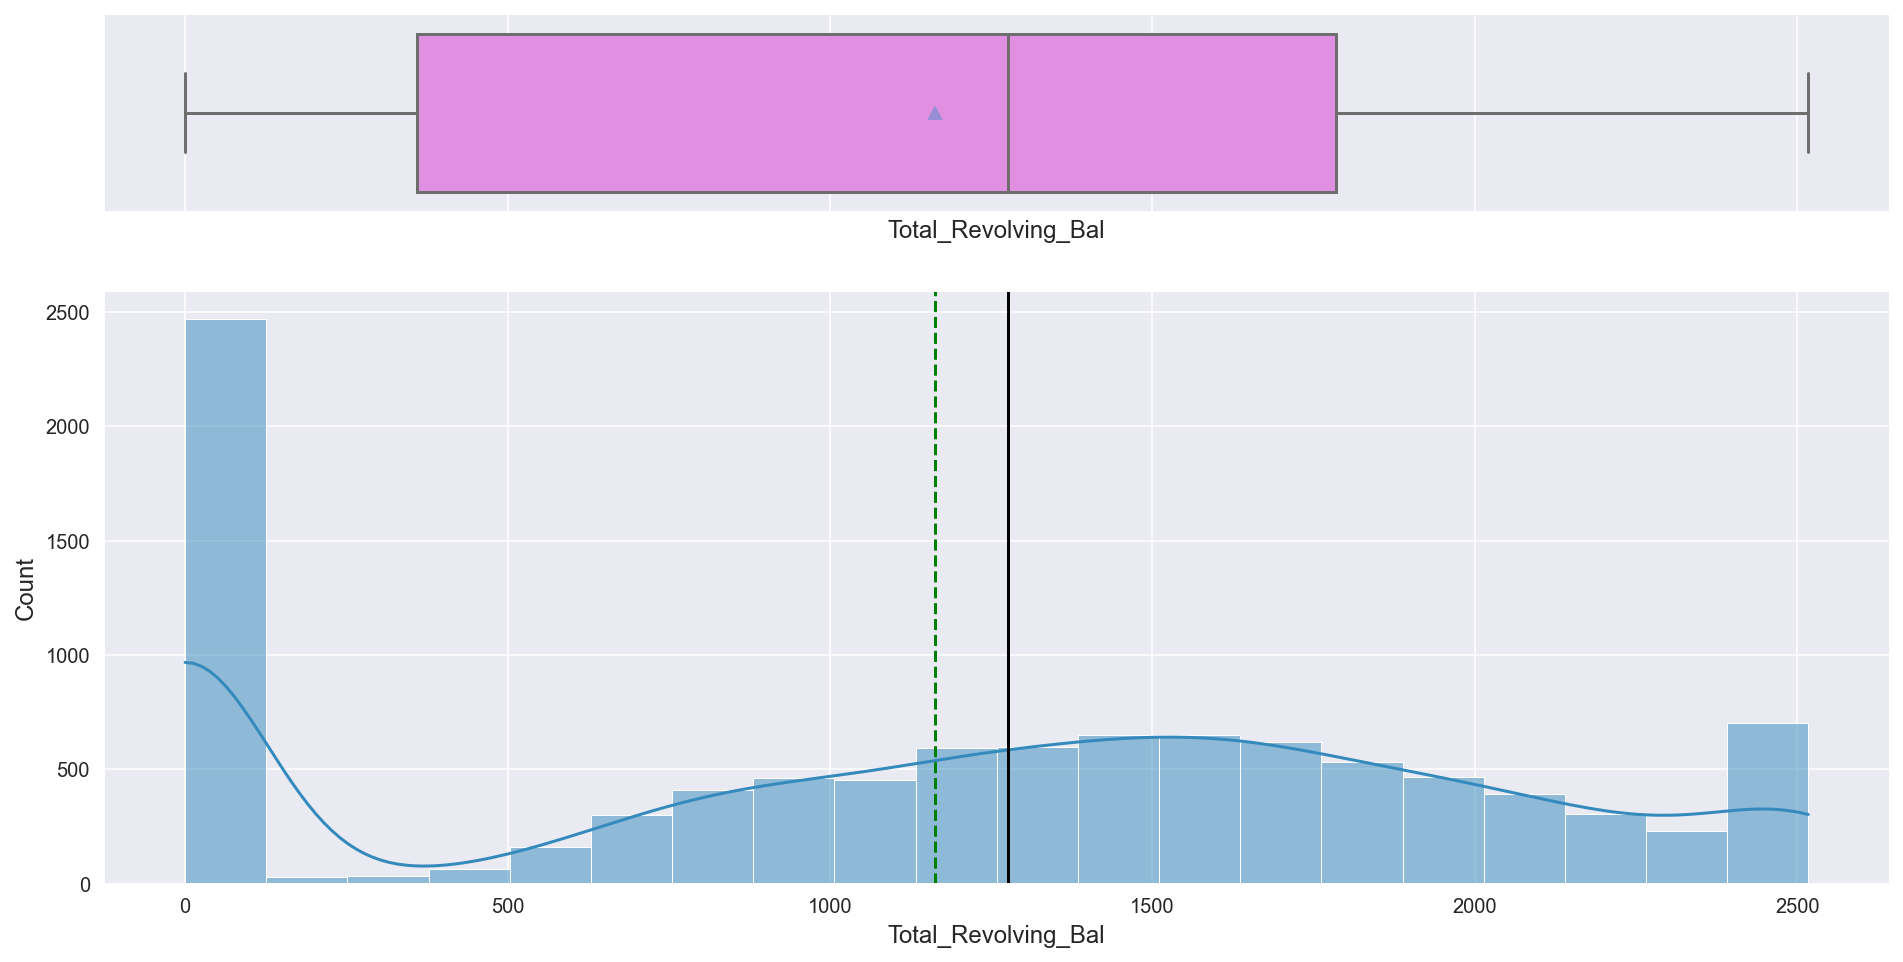

<IPython.core.display.Javascript object>

In [27]:
plot_univariate(data, "Total_Revolving_Bal")

* On 'Total_Revolving_Bal' the distribution looks skewed to the left ('mean' behind the 'median') with a considerable 'hump' at the left indicating a possible bi-modal distribution.

#### Observations on Avg_Open_To_Buy

float64


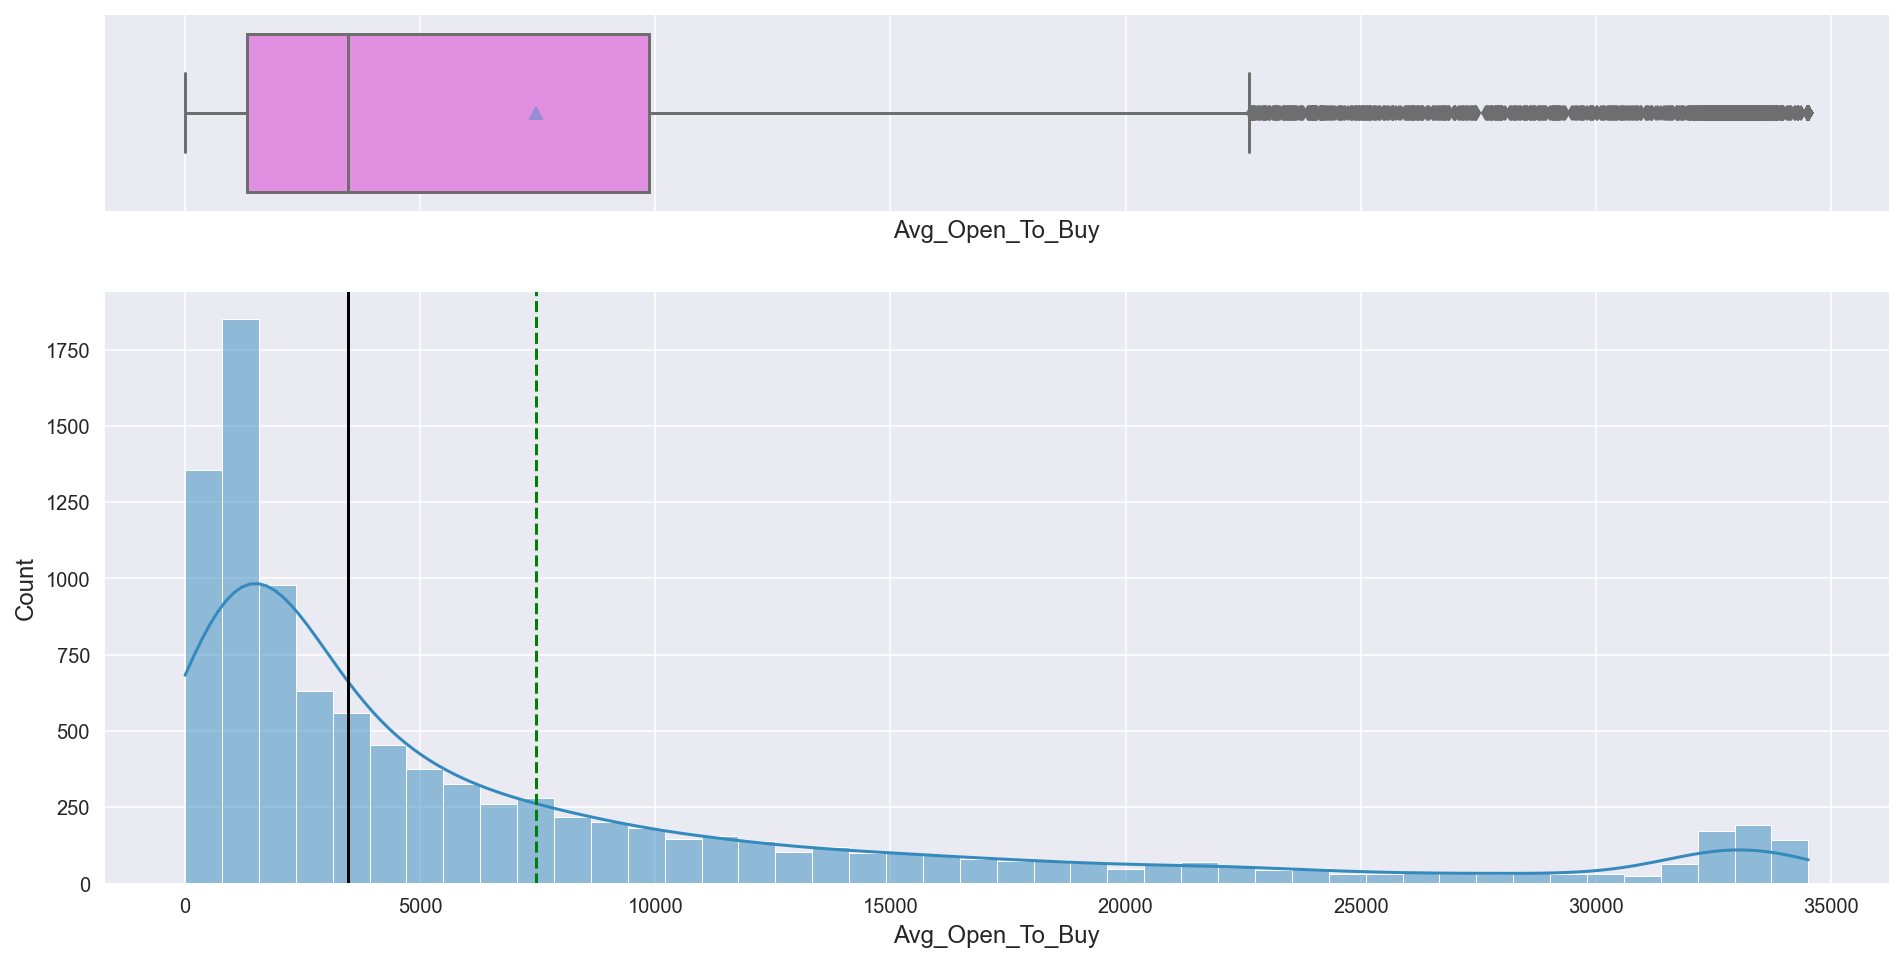

<IPython.core.display.Javascript object>

In [28]:
plot_univariate(data, "Avg_Open_To_Buy")

* On 'Avg_Open_To_Buy' the distribution looks skewed to the right.
* It also shows a small 'hump' at the right indicating a possible bi-modal distribution.
* And a 'bunch' of `'outliers'` which will be analyzed later.

#### Observations on Total_Amt_Chng_Q4_Q1

float64


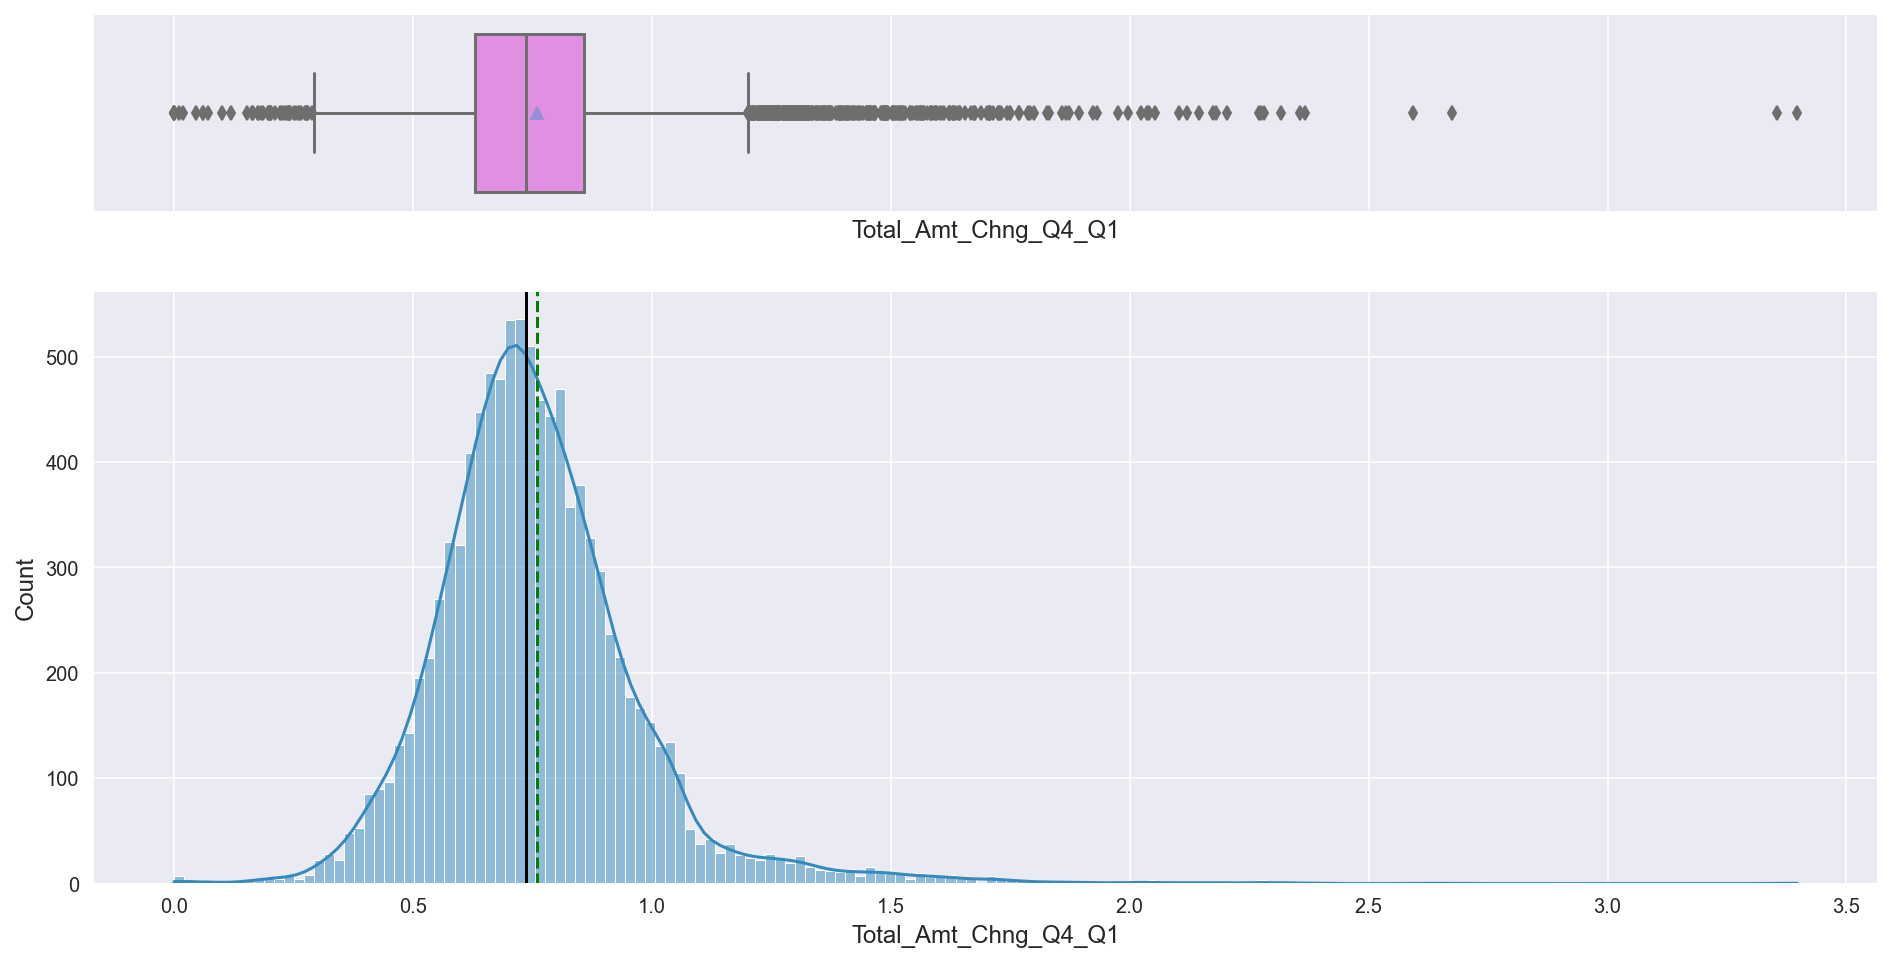

<IPython.core.display.Javascript object>

In [29]:
plot_univariate(data, "Total_Amt_Chng_Q4_Q1")

* On 'Total_Amt_Chng_Q4_Q1' the distribution looks slightly skewed to the right.
* It also shows a considerable number of `'outliers'` on both sides of the whiskers.

#### Observations on Total_Trans_Amt

int64


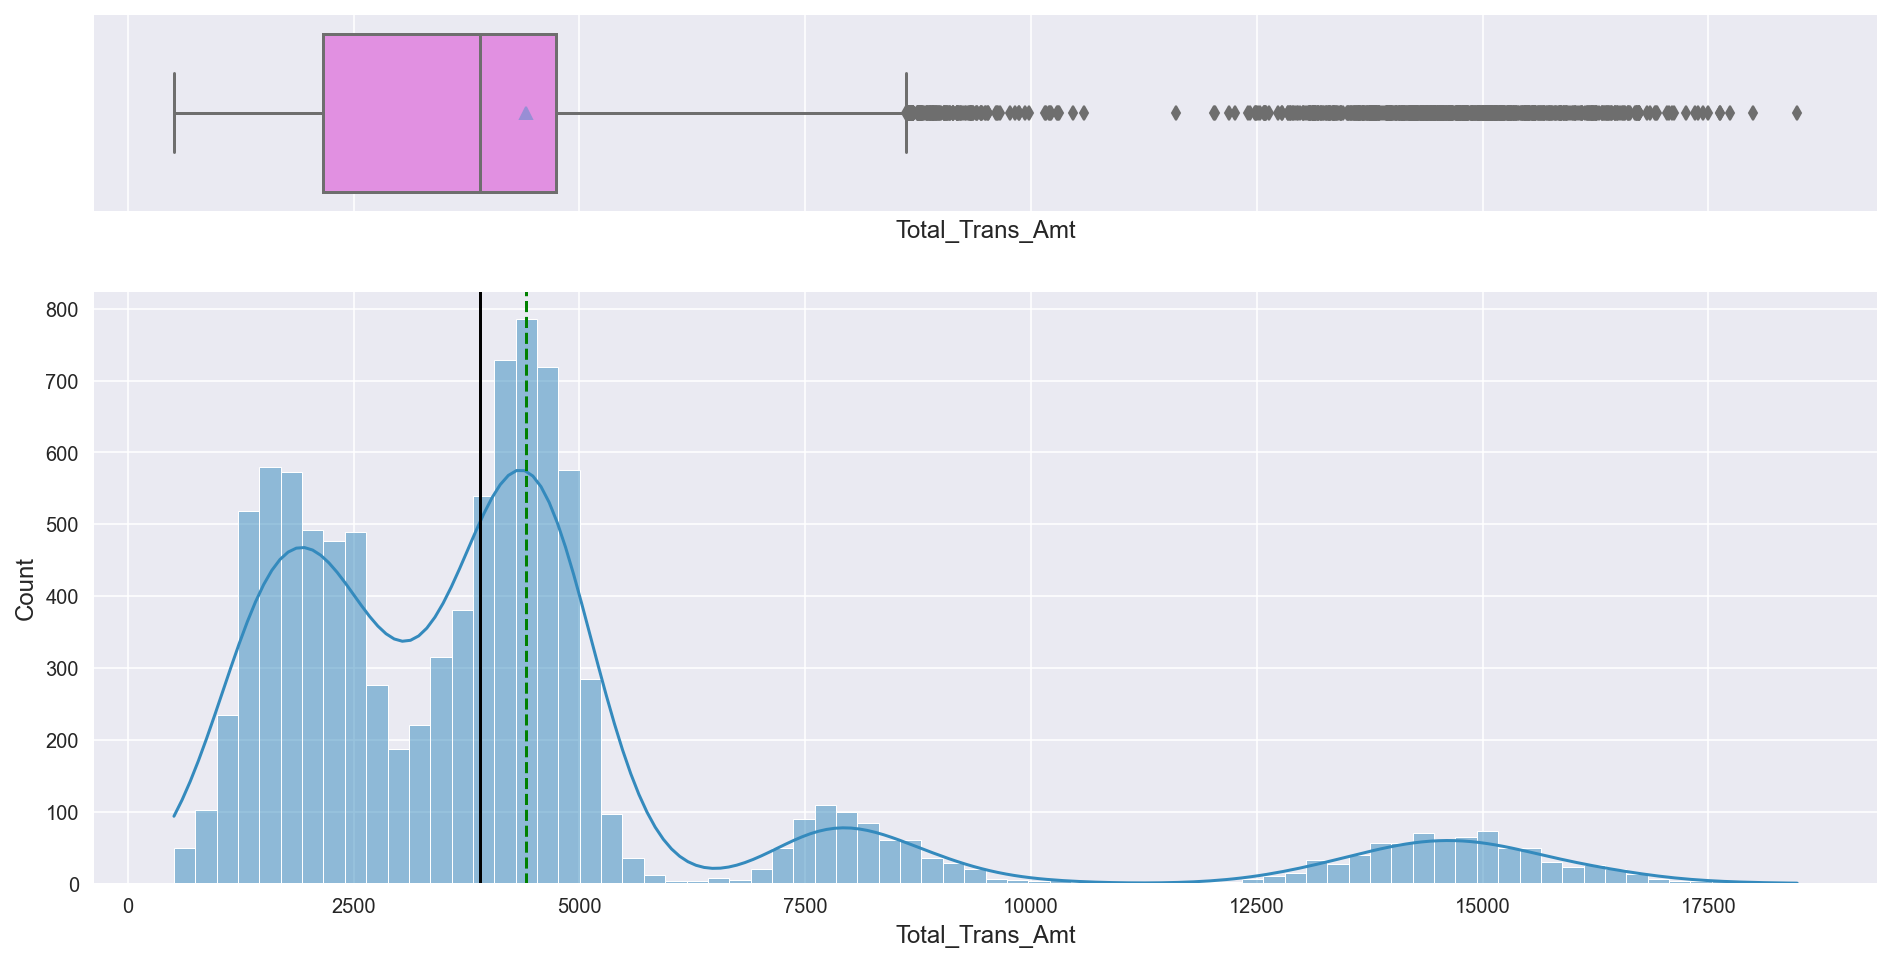

<IPython.core.display.Javascript object>

In [30]:
plot_univariate(data, "Total_Trans_Amt")

* On 'Total_Trans_Amt' the distribution looks skewed to the right with several 'humps'.
* It also shows a considerable number of `'outliers'` on the right of the higher whisker.

#### Observations on Total_Trans_Ct

int64


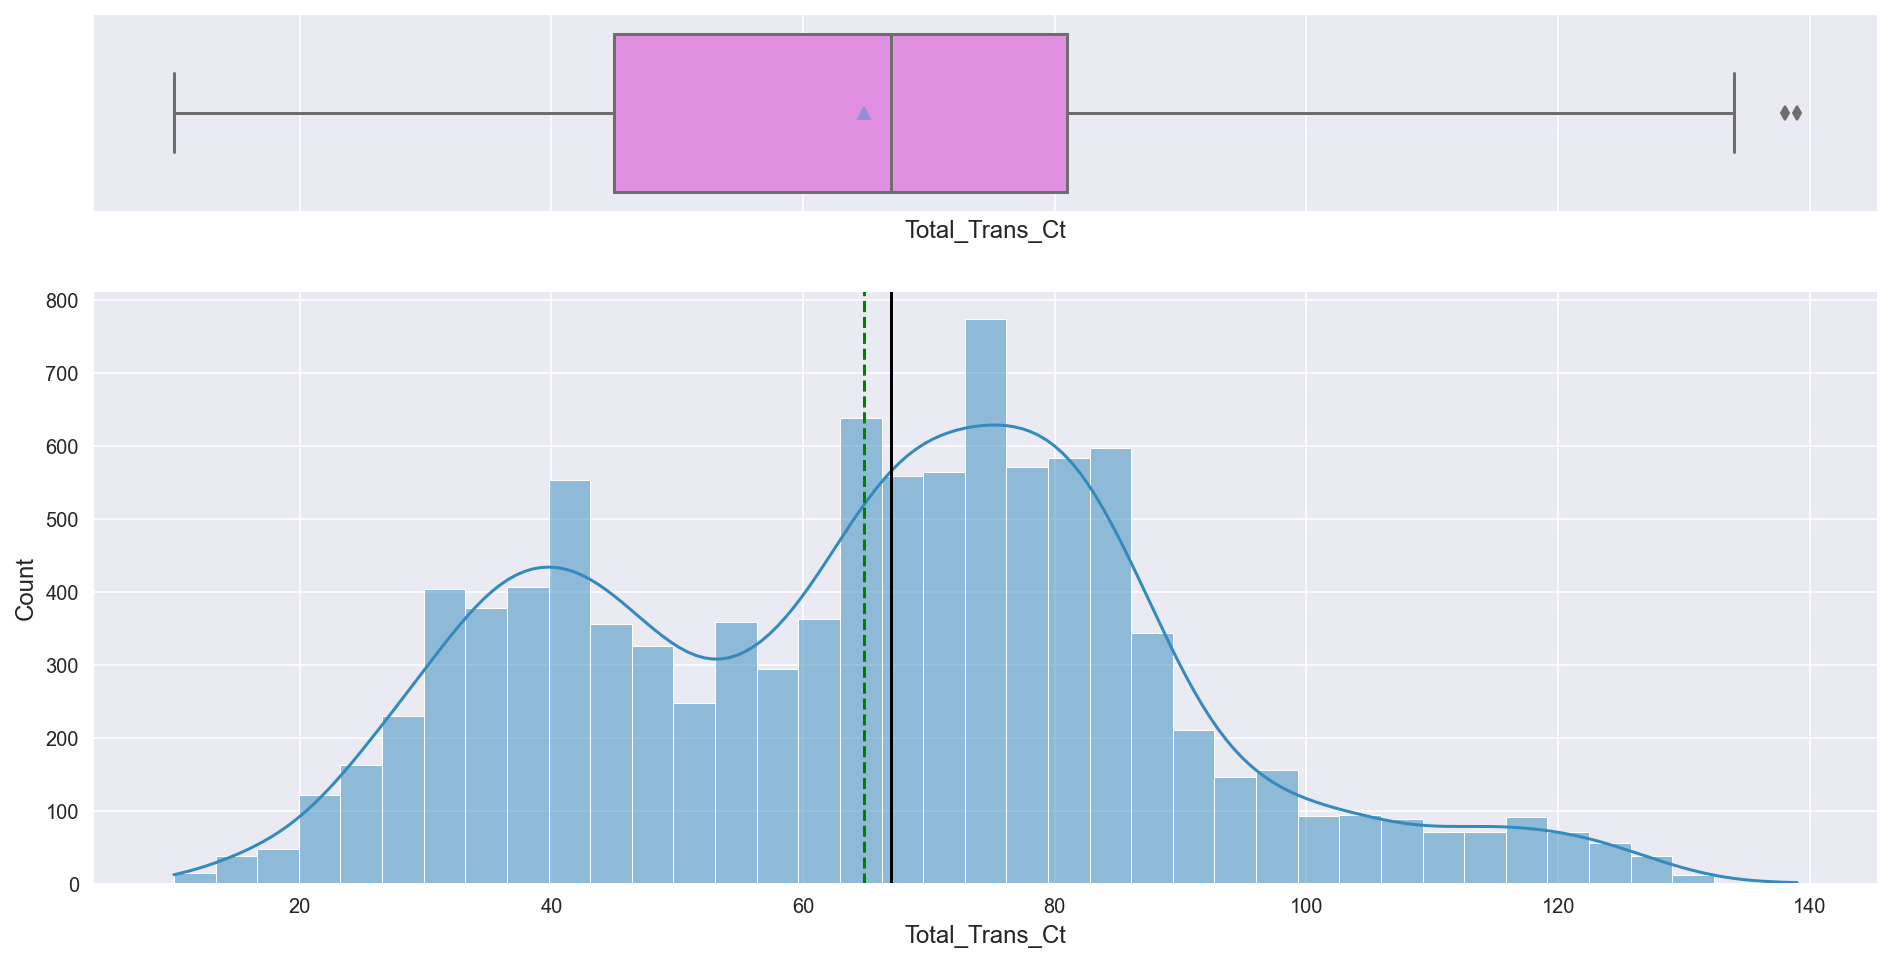

<IPython.core.display.Javascript object>

In [31]:
plot_univariate(data, "Total_Trans_Ct")

* On 'Total_Trans_Ct' the distribution looks skewed to the left with a couple of 'humps'.
* It also shows a few `'outliers'` on the right of the higher whisker.

#### Observations on Total_Ct_Chng_Q4_Q1

float64


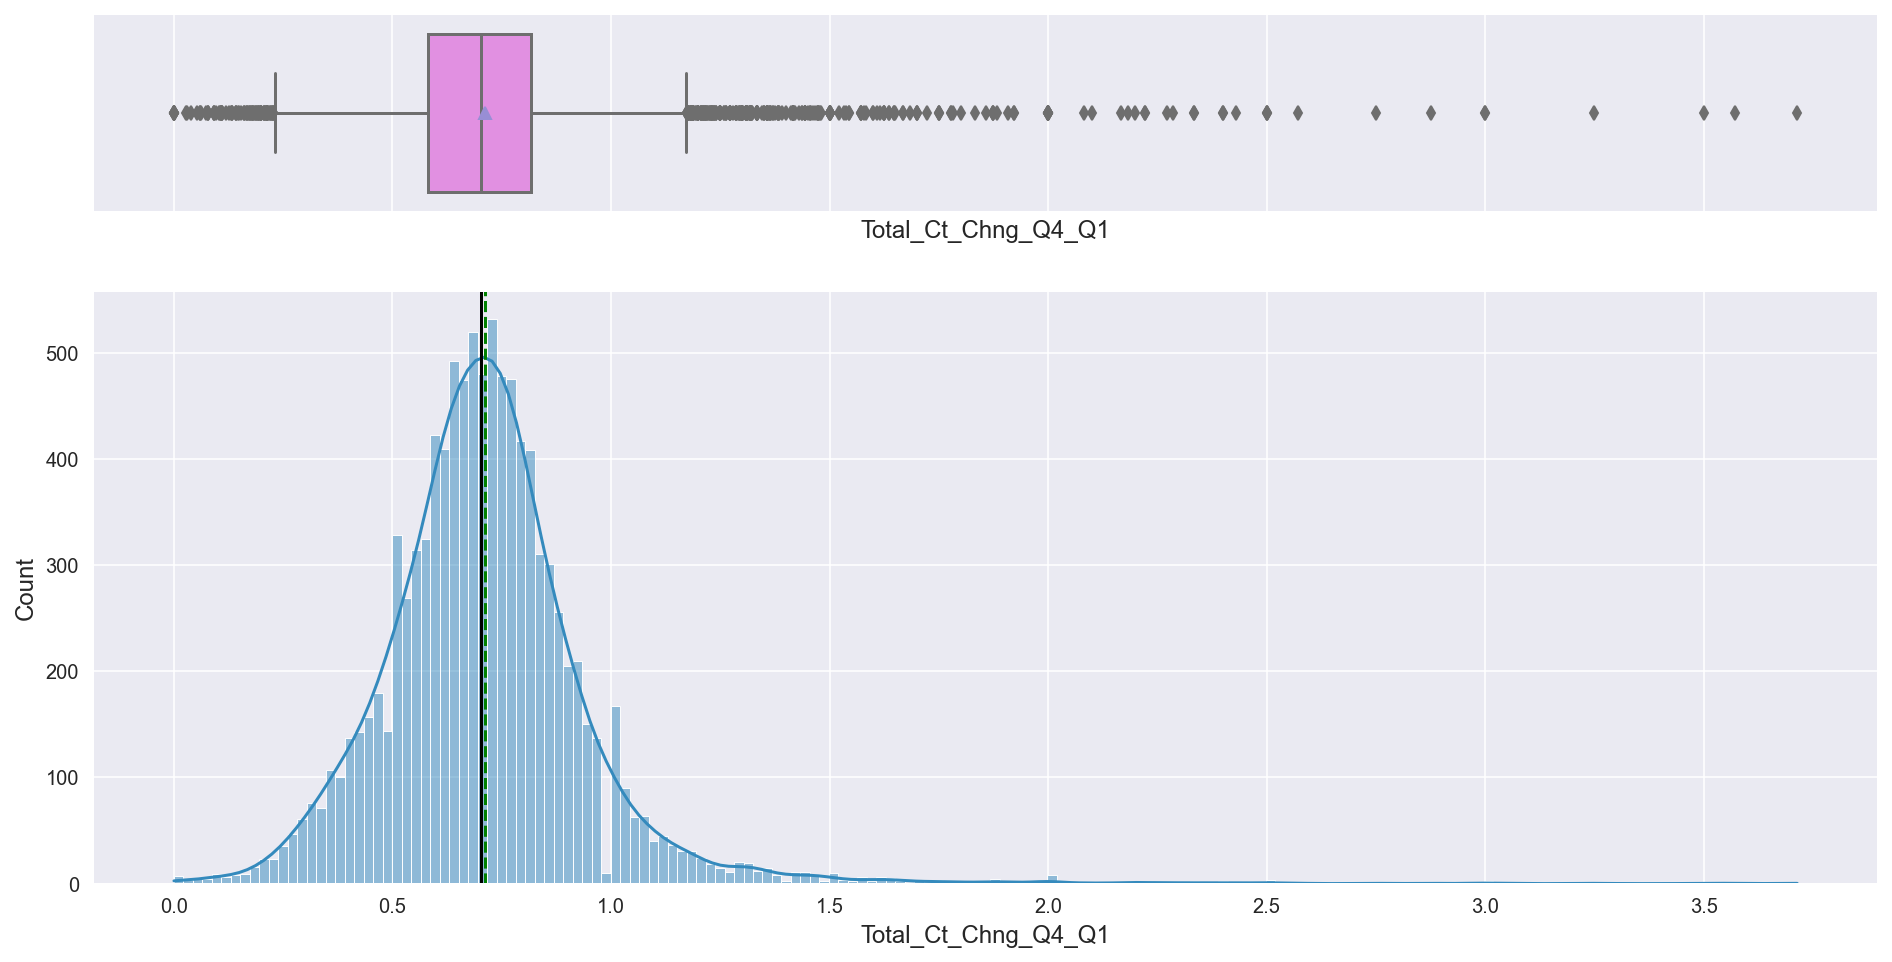

<IPython.core.display.Javascript object>

In [32]:
plot_univariate(data, "Total_Ct_Chng_Q4_Q1")

* On 'Total_Ct_Chng_Q4_Q1' the distribution looks like is a 'straight' `'gaussian'`.
* It also shows a high number of `'outliers'` on the right & left of the whiskers.

#### Observations on Avg_Utilization_Ratio

float64


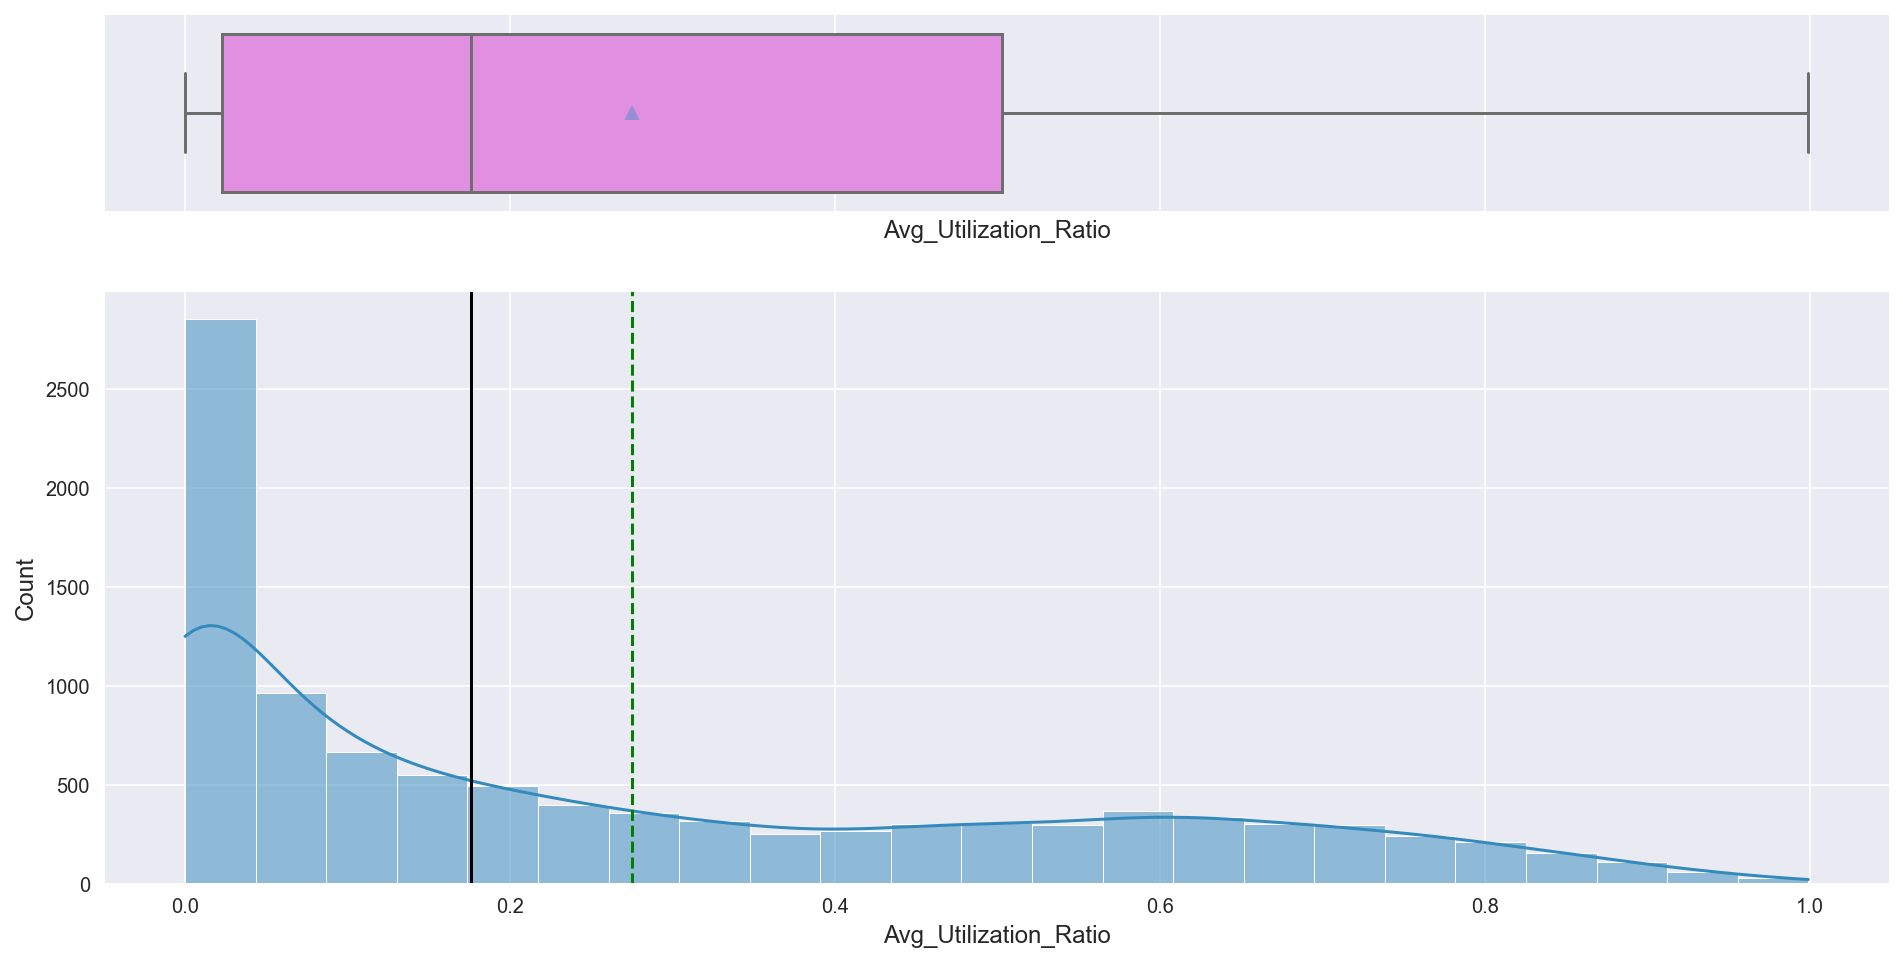

<IPython.core.display.Javascript object>

In [33]:
plot_univariate(data, "Avg_Utilization_Ratio")

* On 'Avg_Utilization_Ratio' the distribution looks skewed to right.
* It doesn't show `'outliers'` but a second 'hump' indicating the presence of a bi-modal distribution.

### Bivariate analysis

#### Attrition_Flag vs Customer_Age

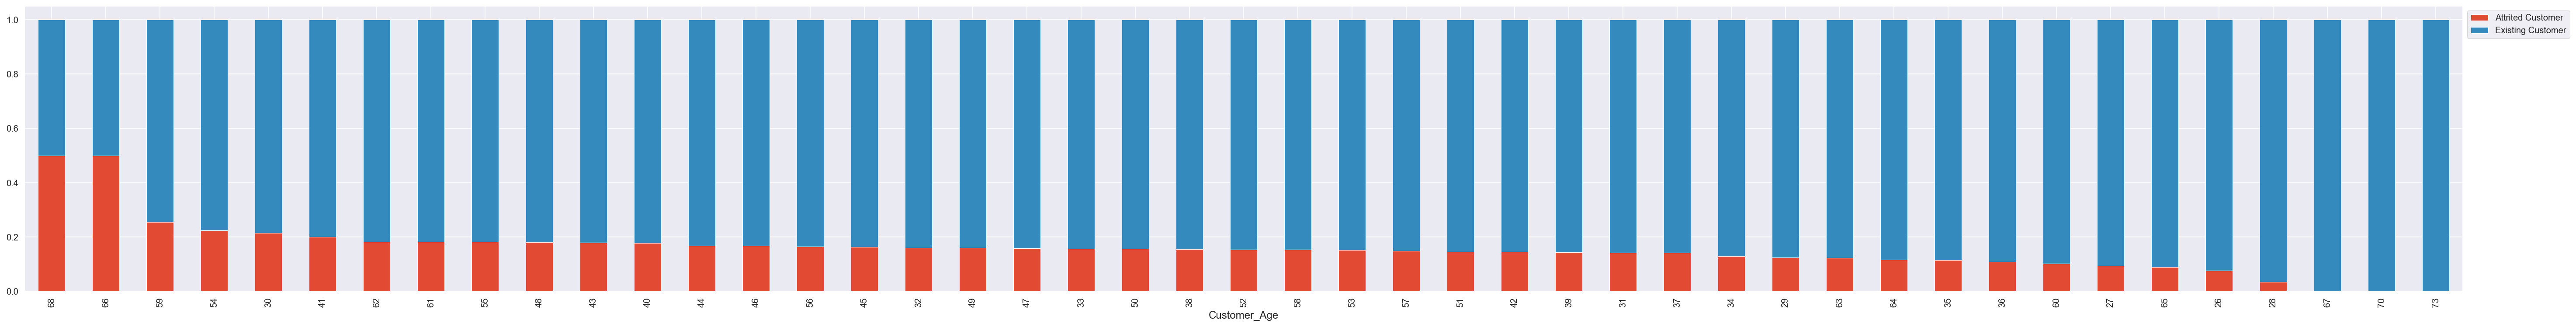

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "Customer_Age", "Attrition_Flag")

* Attrition is more possible at 'Customer_Age' 68 & 66 than in other ages.

#### Attrition_Flag vs Gender

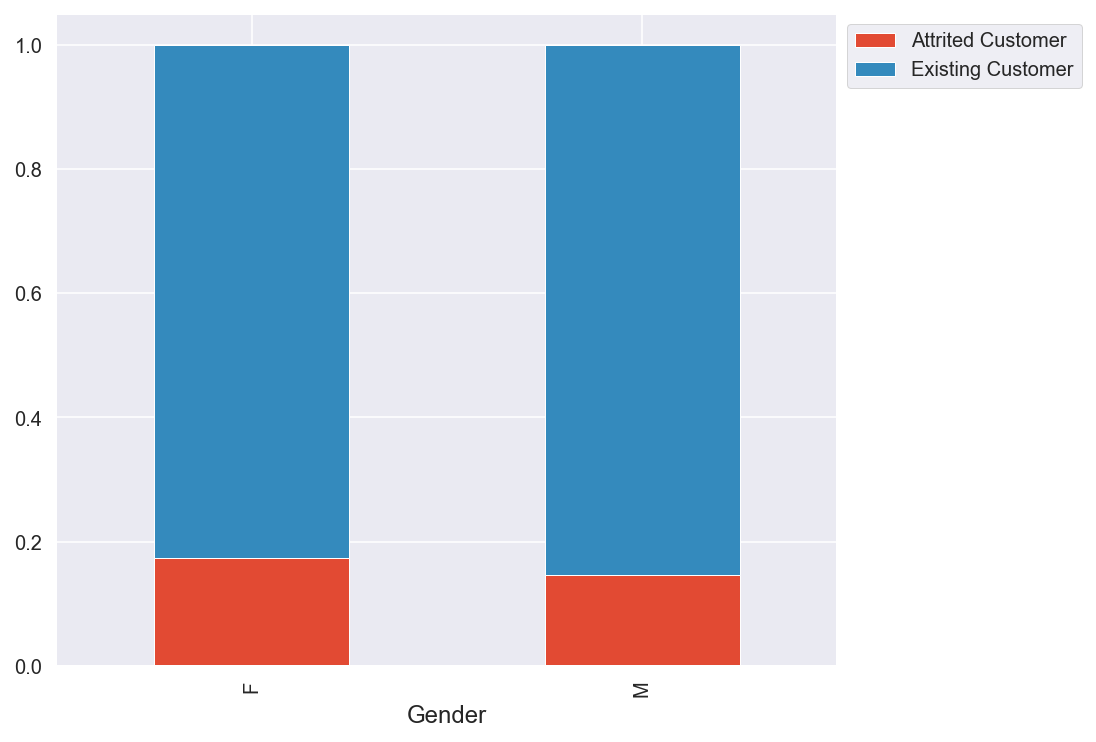

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(data, "Gender", "Attrition_Flag")

* Attrition is not too different if th customer is 'Male' or 'Female'.
* 'Gender' doesn't seen to be a relevant attribute to identify Attrition.

#### Attrition_Flag vs Dependent_count

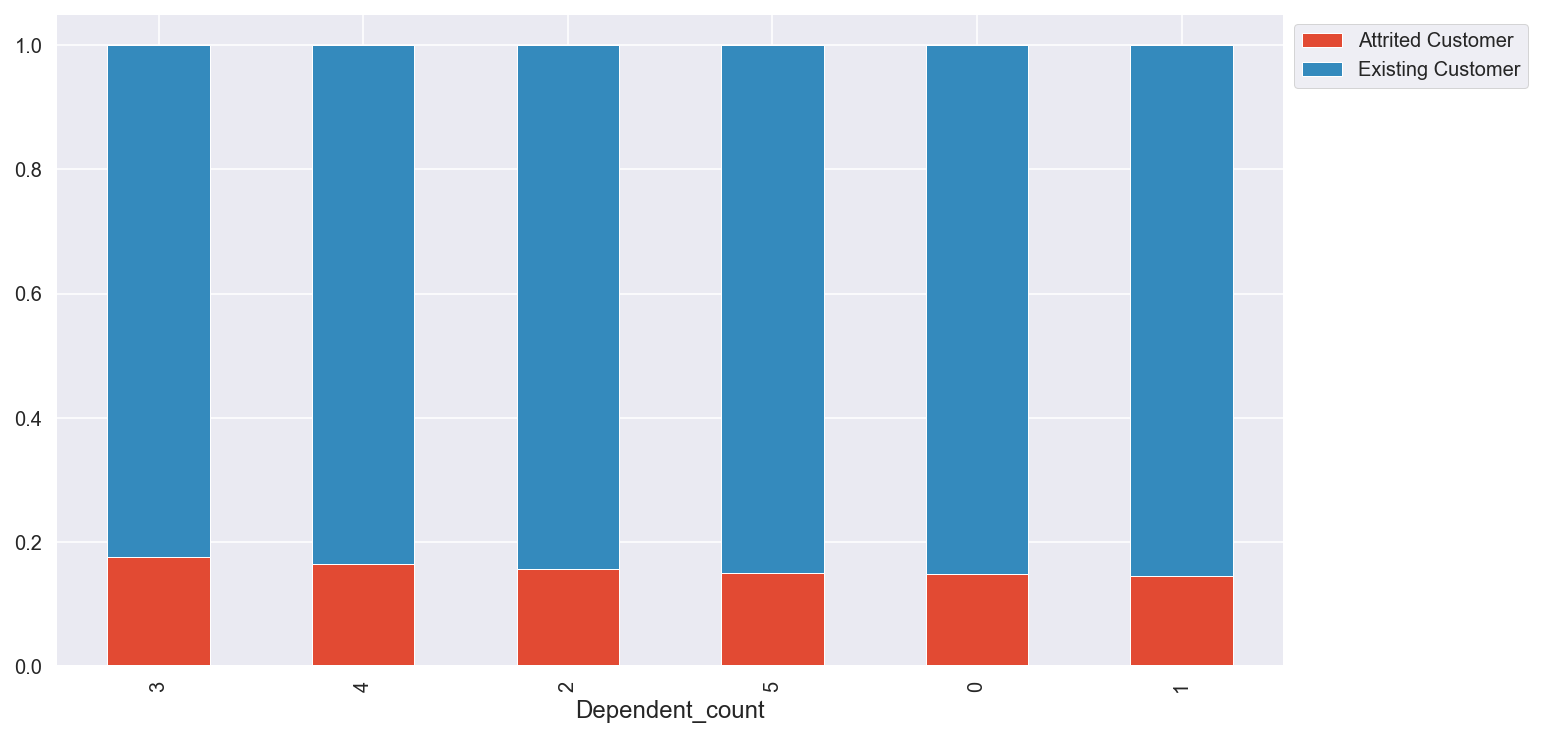

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* Attrition is not too different if the customer have many or none dependents.
* 'Dependent_count' doesn't seen to be a relevant attribute to identify Attrition.

#### Attrition_Flag vs Education_Level

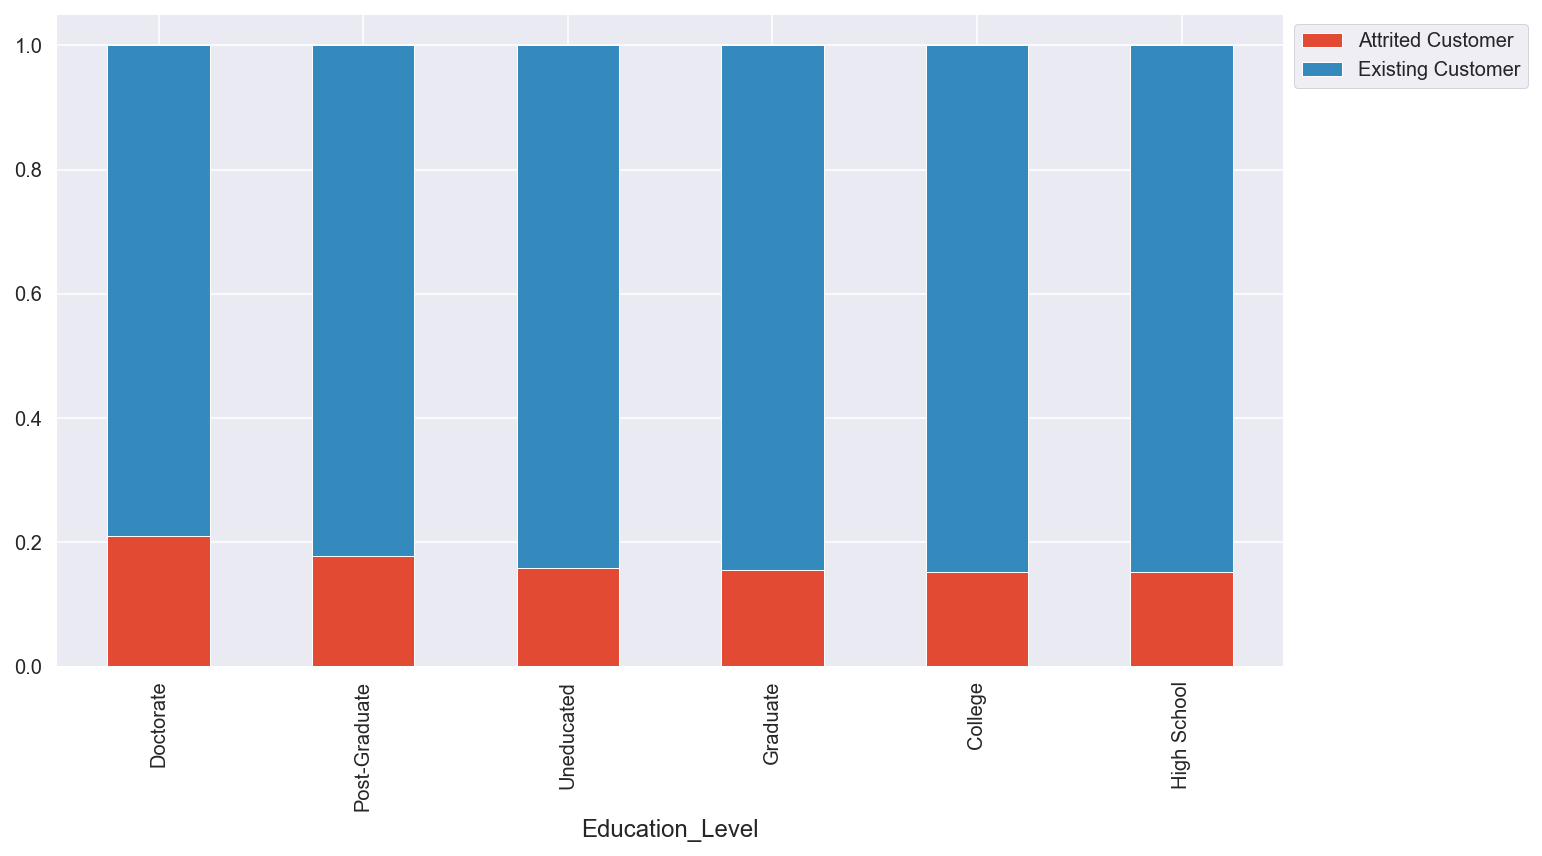

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* 'Education_Level' doesn't seen to be a relevant attribute to identify Attrition.

#### Attrition_Flag vs Marital_Status

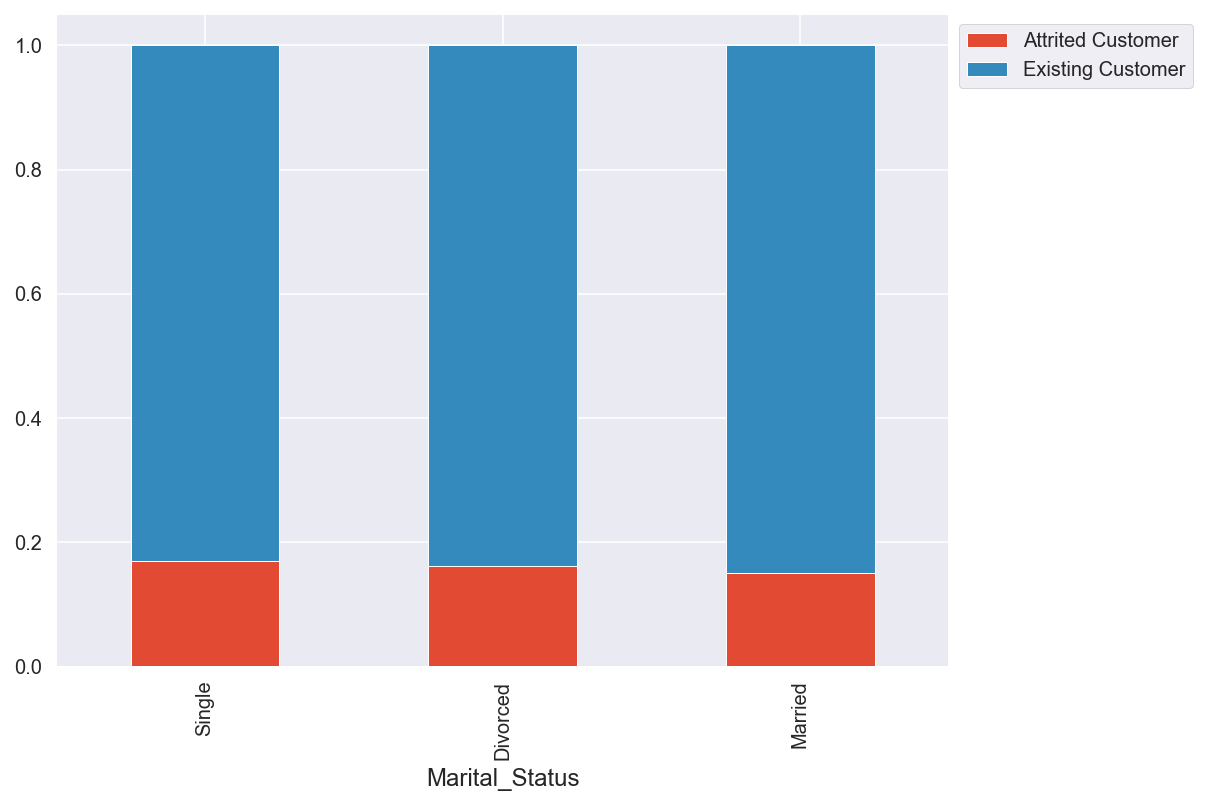

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* 'Marital_Status' also doesn't seen to be a relevant attribute to identify Attrition. Proportions are relatively the same.

#### Attrition_Flag vs Income_Category

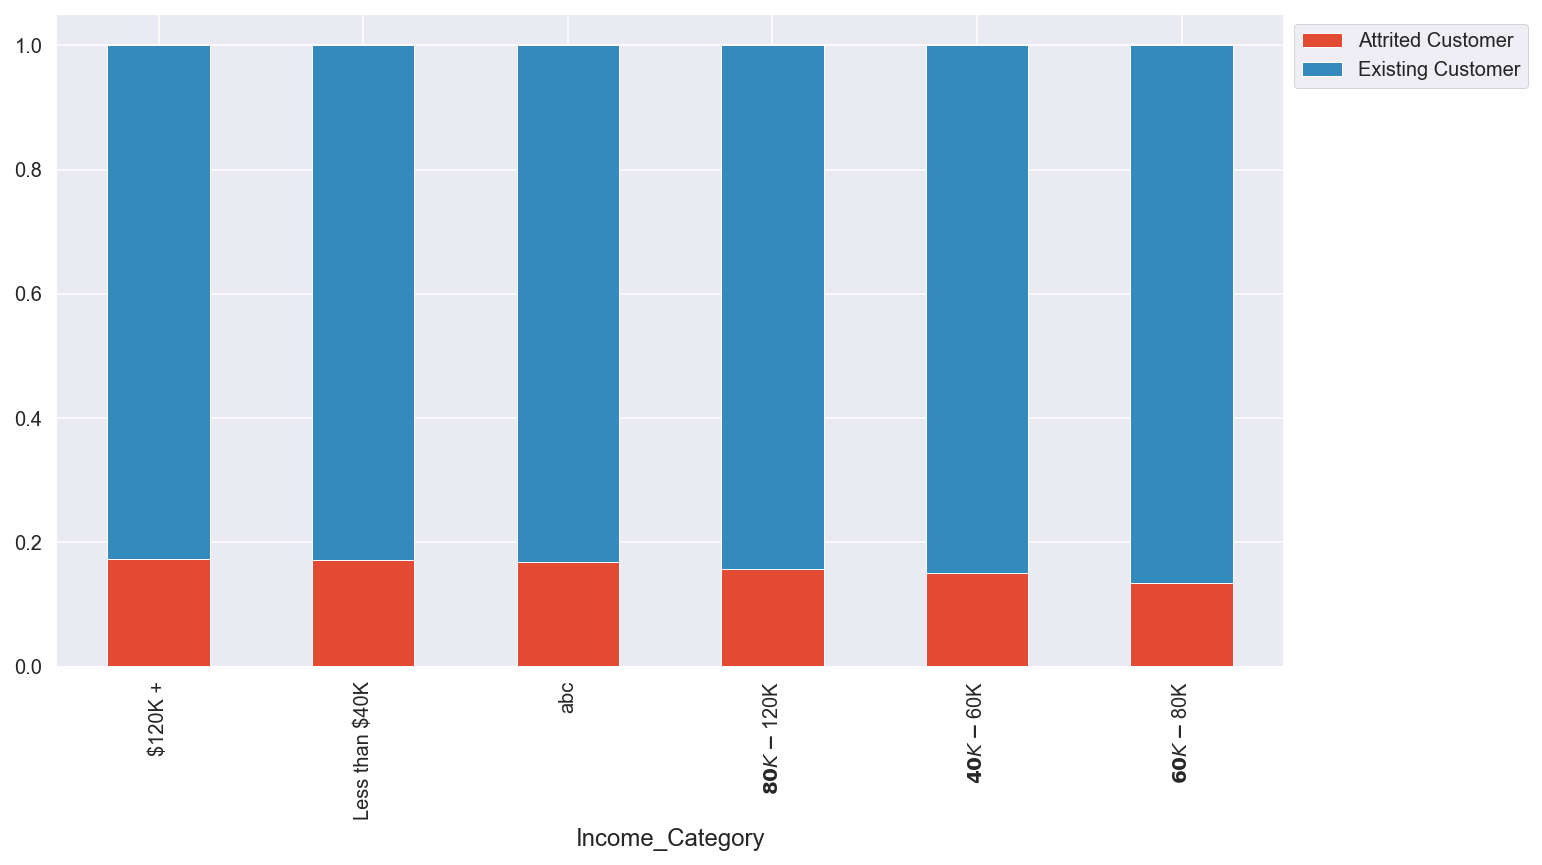

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* 'Income_Category' also doesn't seen to be a relevant attribute to identify Attrition. Proportions are relatively the same.

#### Attrition_Flag vs Card_Category

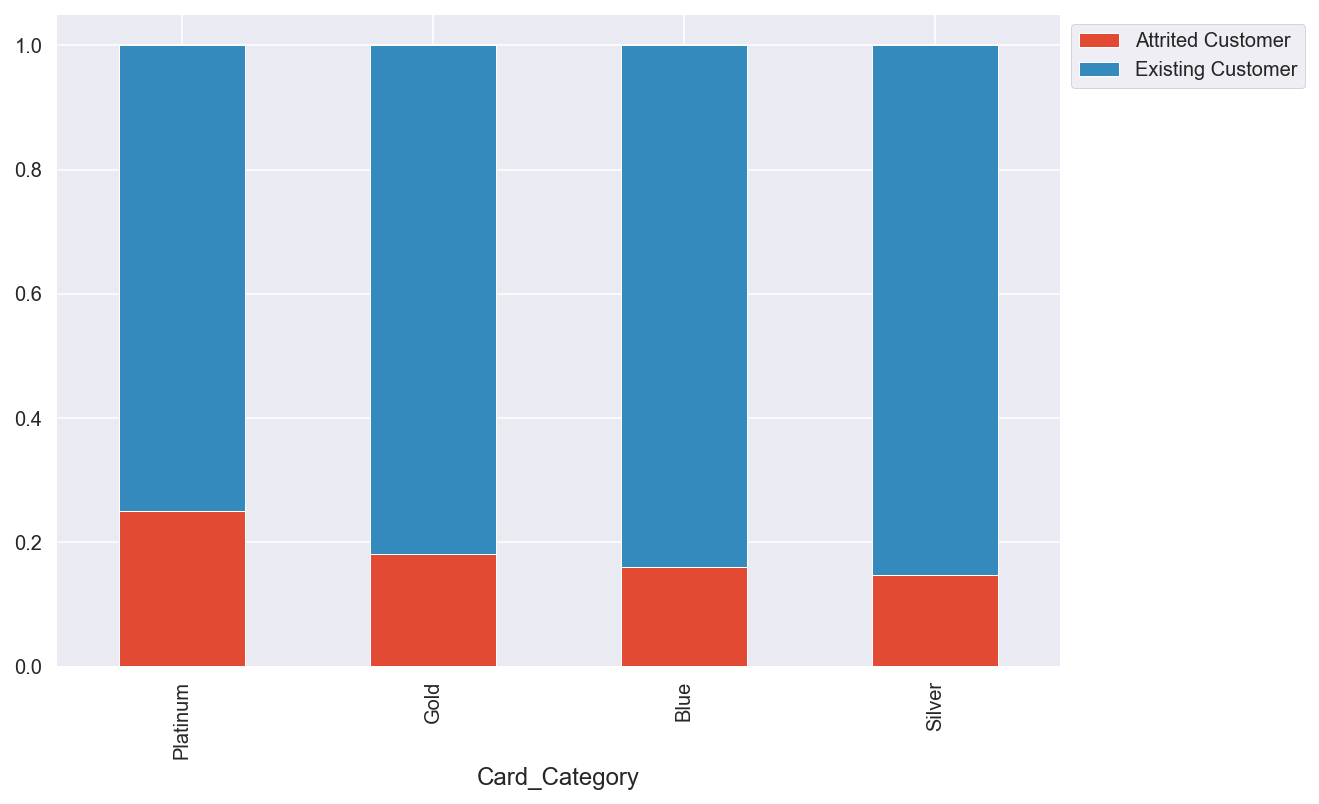

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* 'Card_Category' indicates that customers with 'Premium' level cards are slightly more inclined to attrite than customer other type of card.

#### Attrition_Flag vs Months_on_book

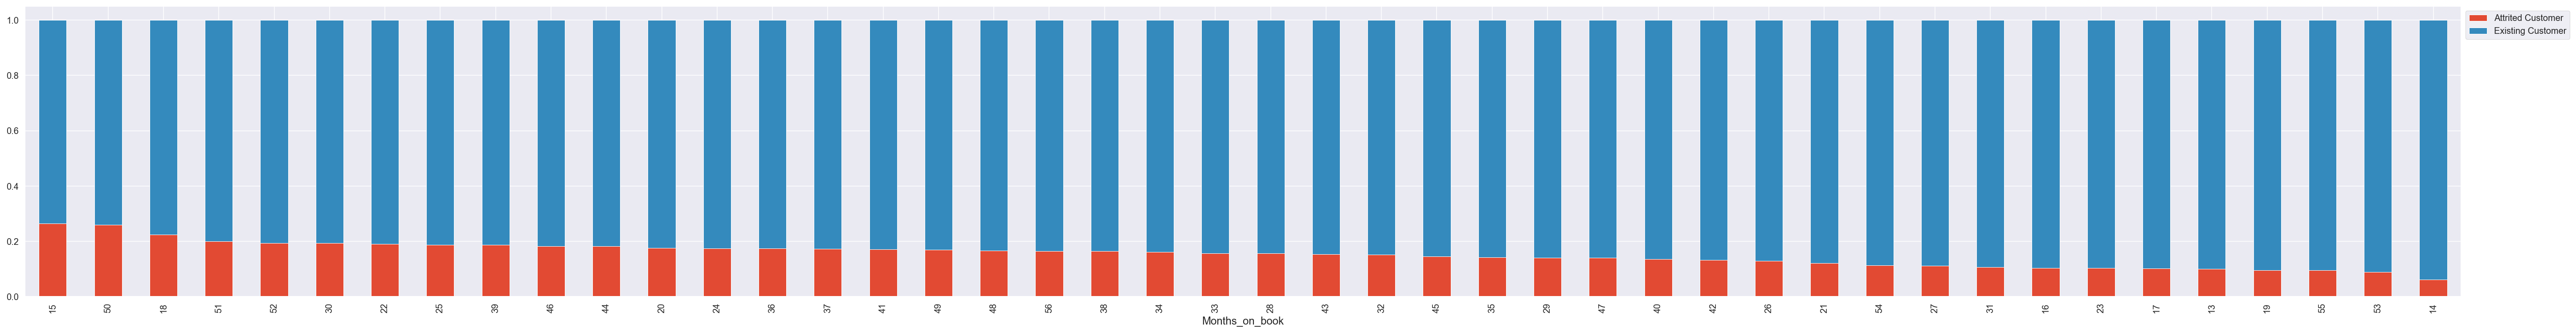

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "Months_on_book", "Attrition_Flag")

* 'Months_on_book' doesn't seem to indicate a clear condition that attrite will happen subject to any number of `Months_on_book'.

#### Attrition_Flag vs Total_Relationship_Count

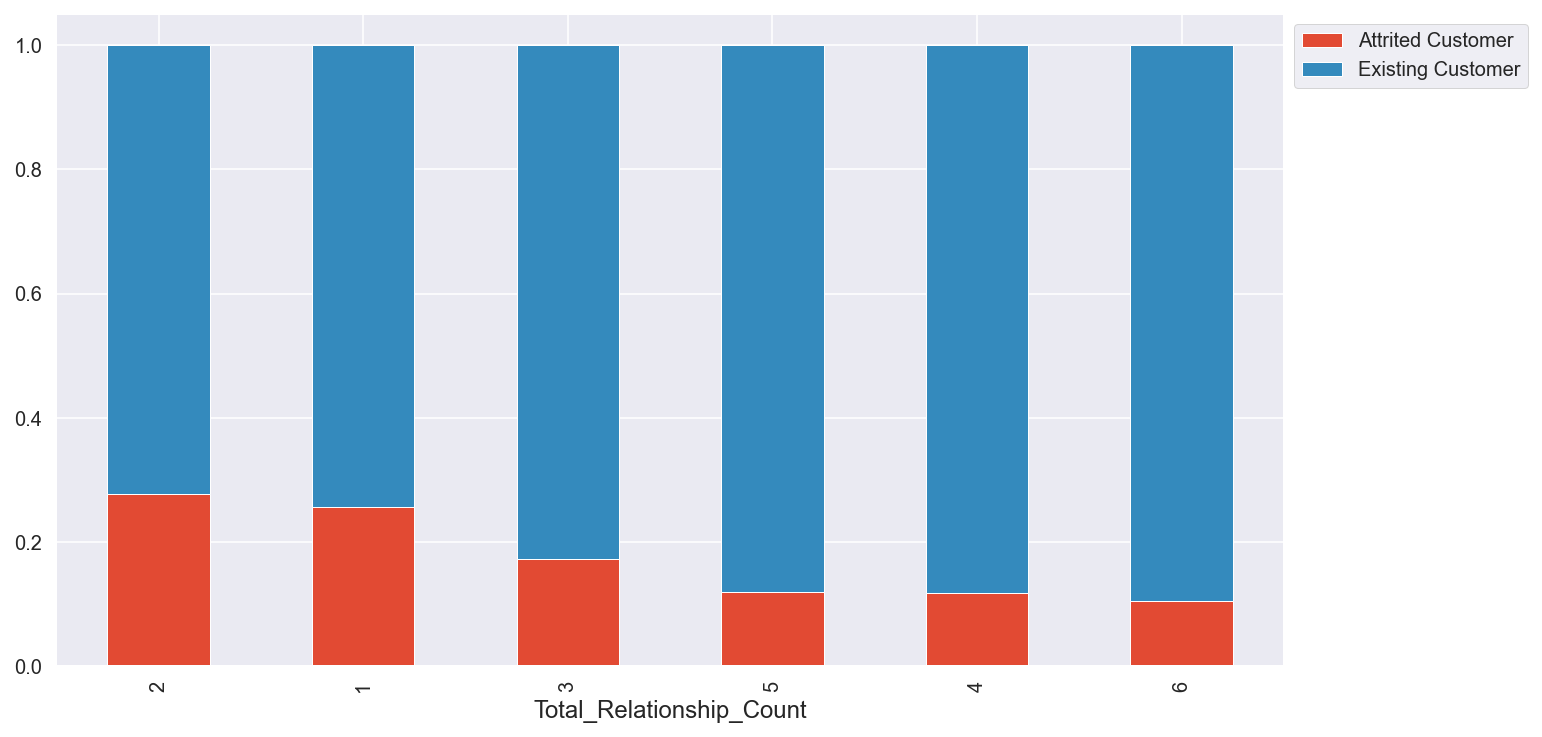

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* On 'Total_Relationship_Count' is slighlty higher to attrite when count is '1' or '2'.

#### Attrition_Flag vs Months_Inactive_12_mon

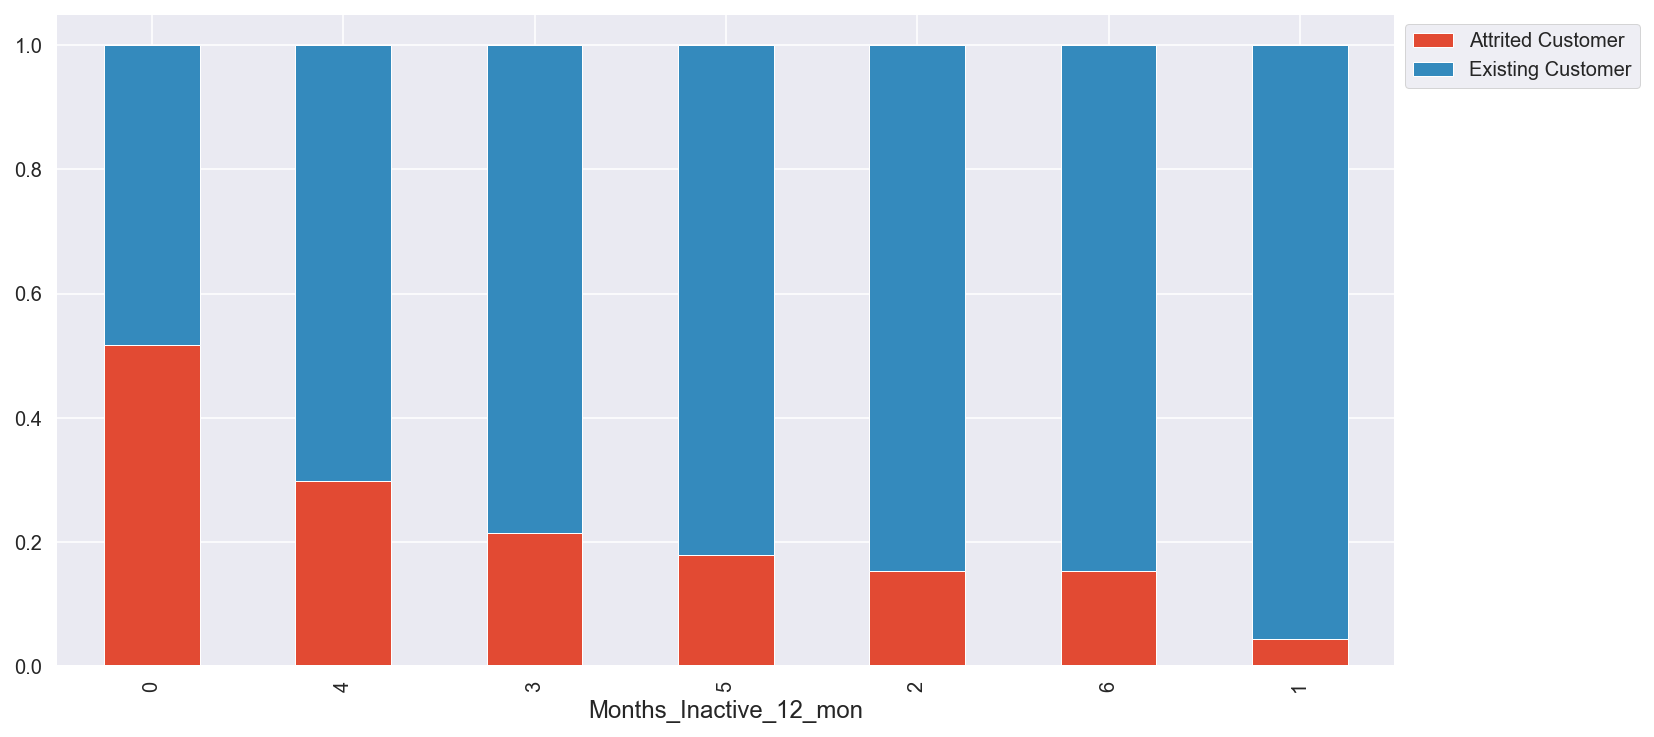

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

* On 'Months_Inactive_12_mon' we see that when is '0' the attrition is more likely to happen.

#### Attrition_Flag vs Contacts_Count_12_mon

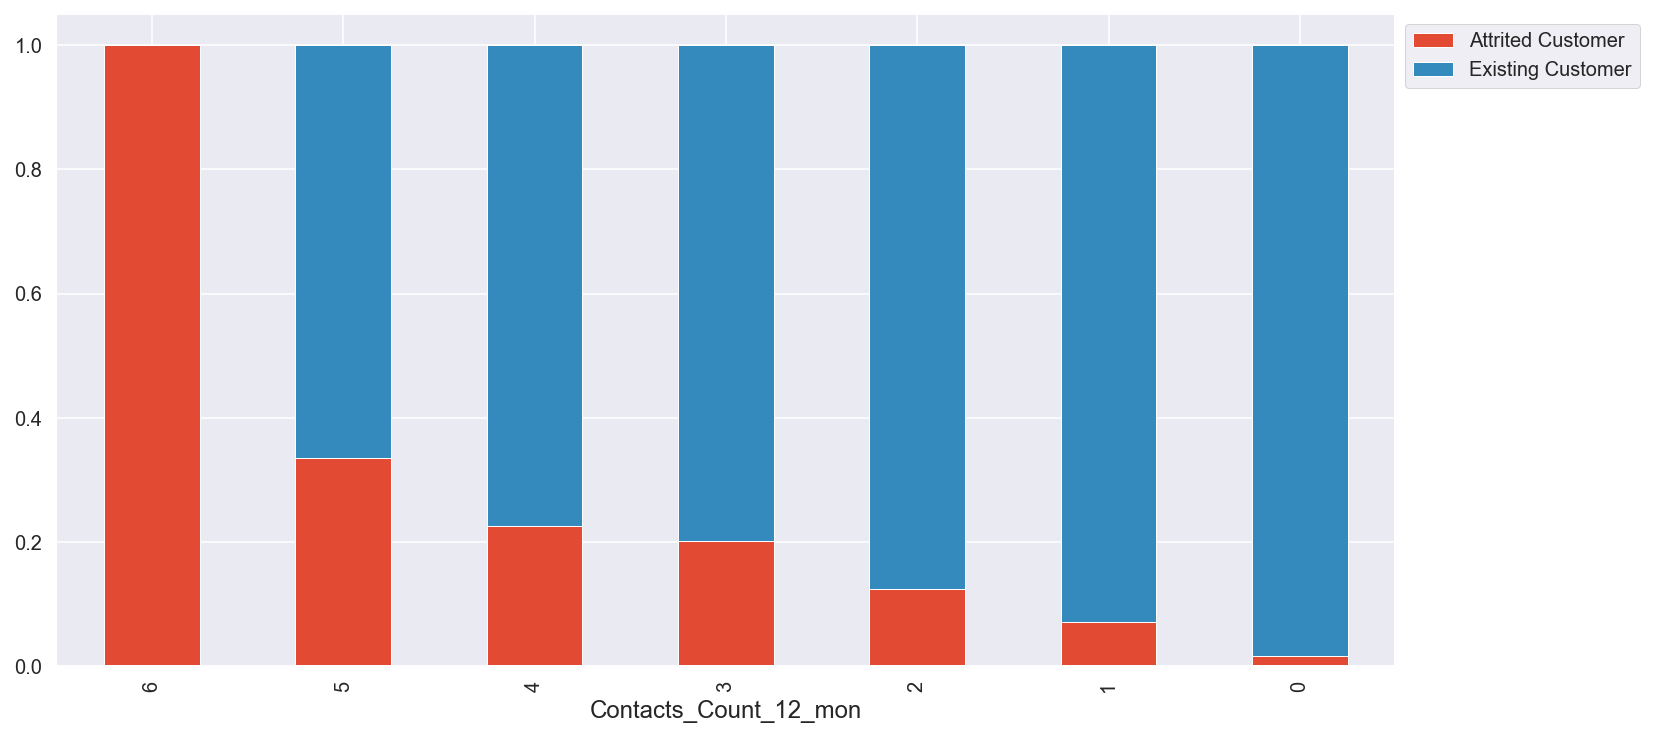

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* Customers are highly likely to attrite when contacts are 6 or 5 and start decreasing with the number of decreasing counts.

#### Attrition_Flag vs Credit_Limit

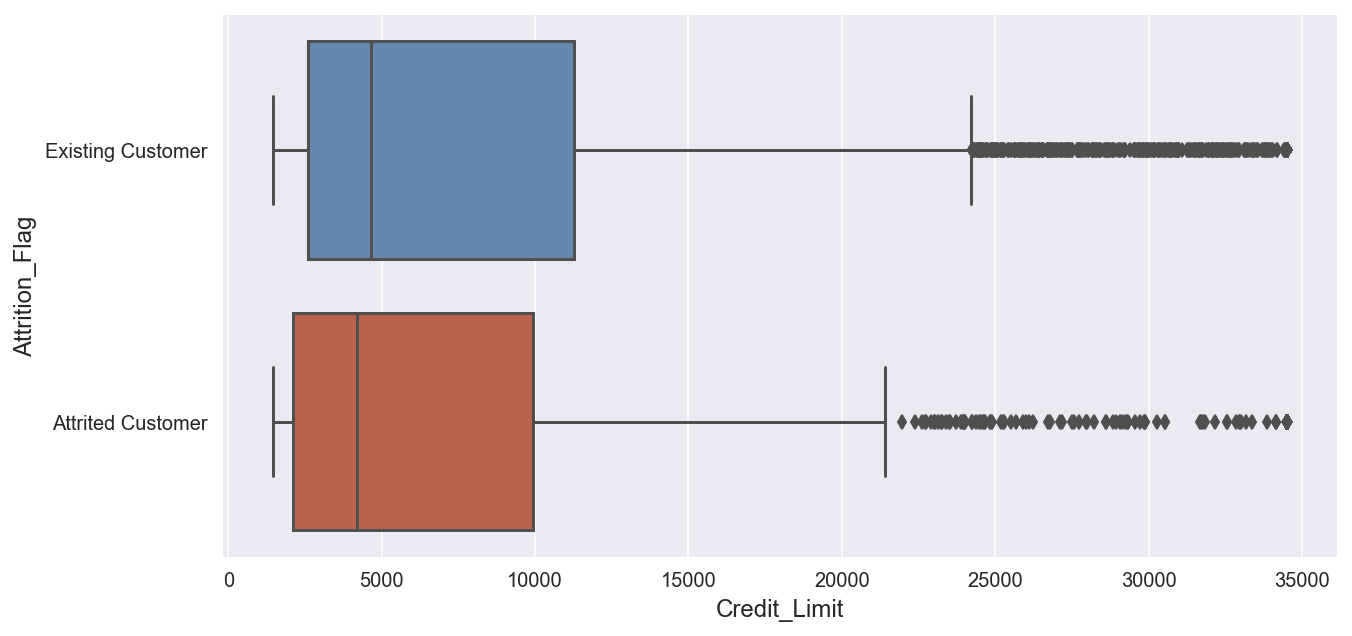

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Credit_Limit", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

* 'Credit_Limit' is not a determinant factor to sort out if we will have attrite or not.

#### Attrition_Flag vs Total_Revolving_Bal

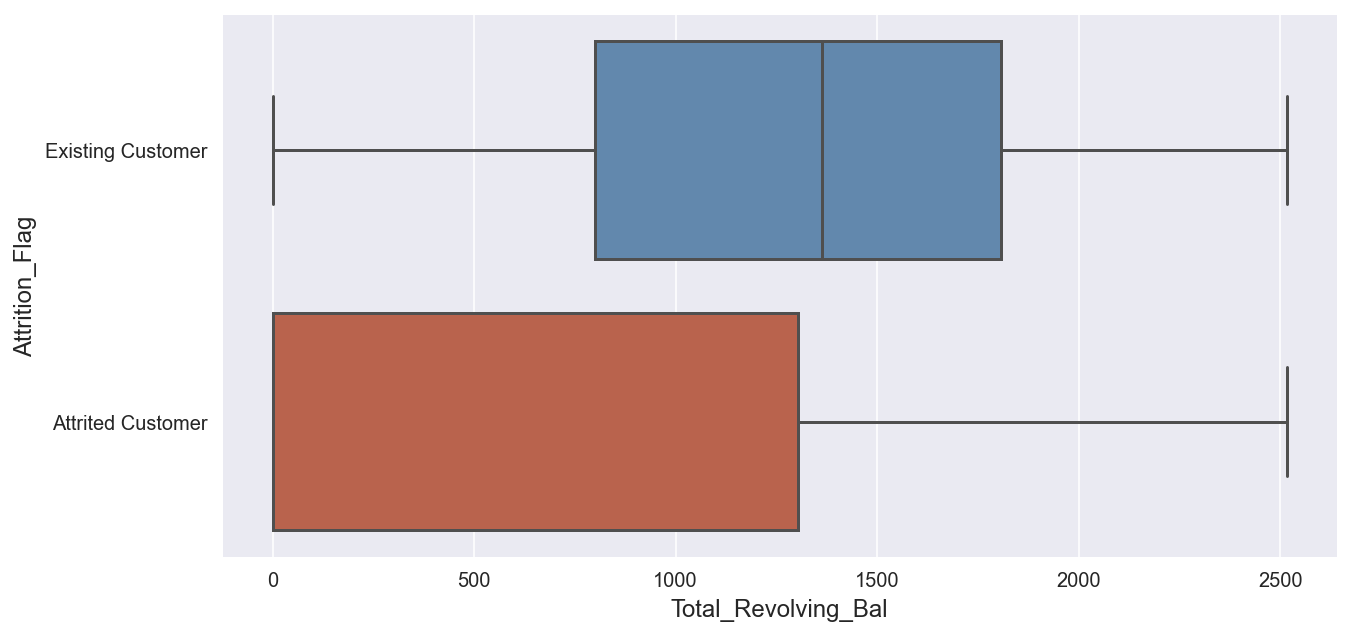

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Total_Revolving_Bal", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

* 'Total_Revolving_Bal' may be a good feature to decide if we will have an attrite customer or not.
* Attrite is more likely to happen when 'Total_Revolving_Bal' is below ~1,300.

#### Attrition_Flag vs Avg_Open_To_Buy

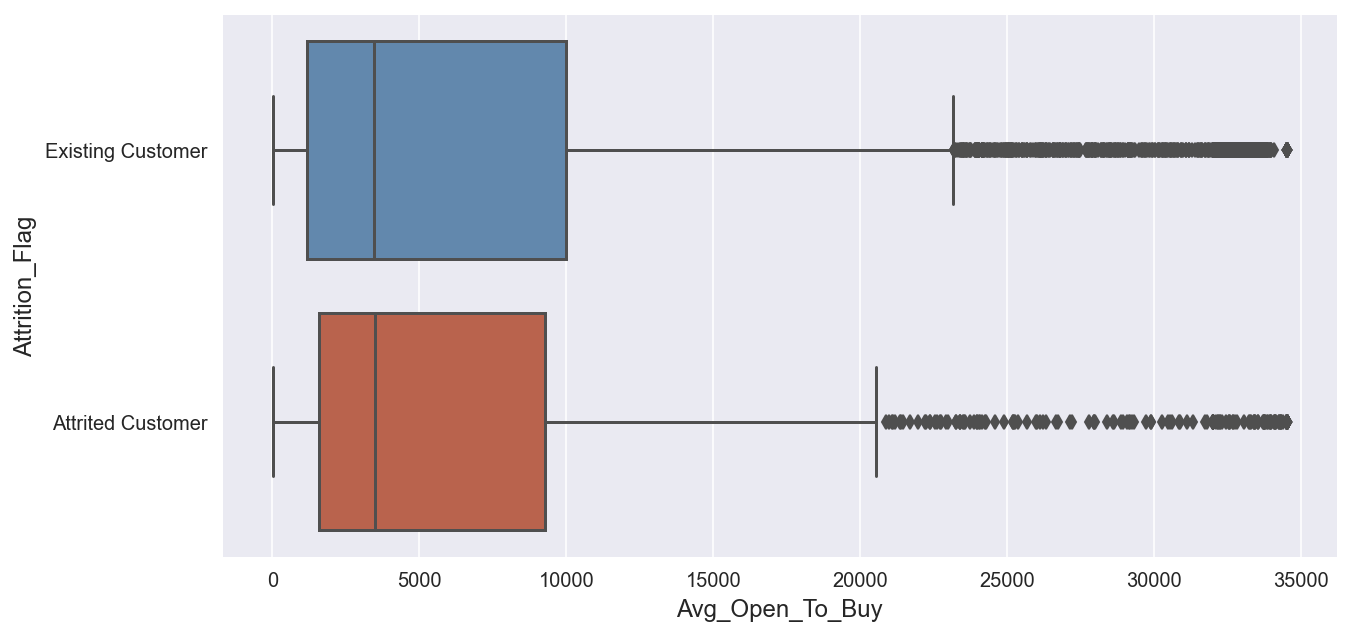

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Avg_Open_To_Buy", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

* 'Avg_Open_To_Buy' is not good indicator ot attrition.

#### Attrition_Flag vs Total_Amt_Chng_Q4_Q1

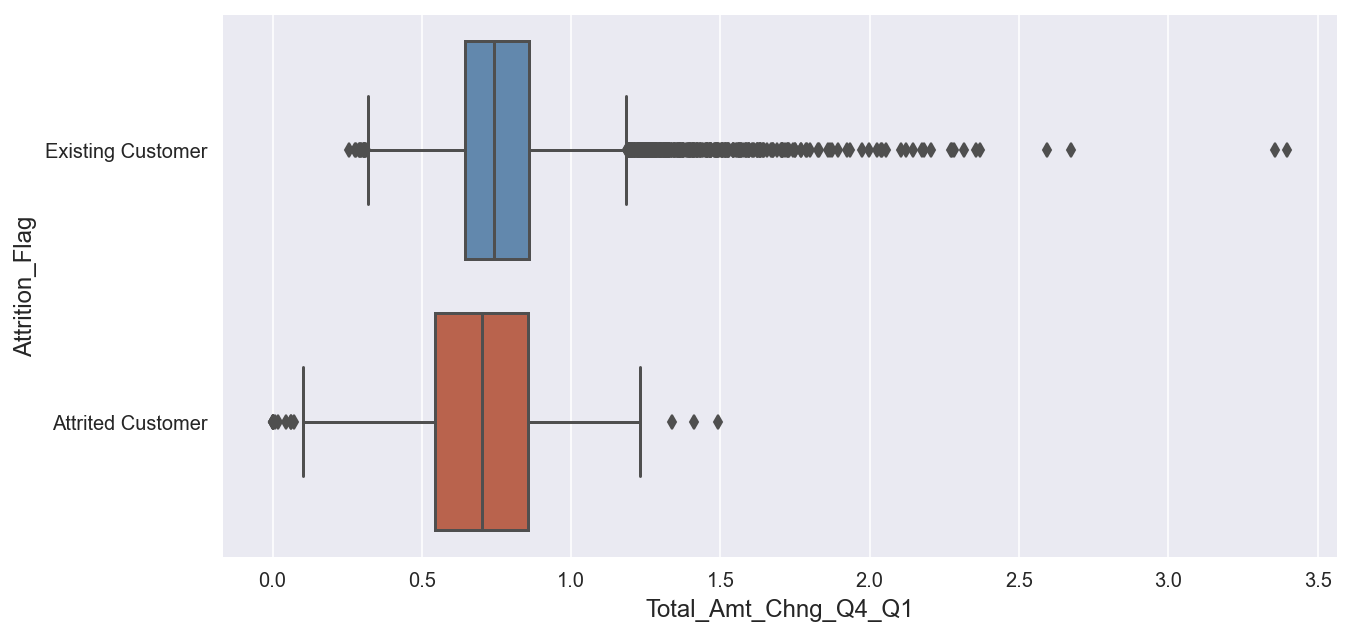

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Total_Amt_Chng_Q4_Q1", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

* There is not much differentiation whether we will have attrition when using 'Total_Amt_Chng_Q4_Q1'.

#### Attrition_Flag vs Total_Trans_Amt

In [49]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Total_Trans_Amt", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

<IPython.core.display.Javascript object>

* `Lower` 'Total_Trans_Amt' are more predictive of attrition that higher values.

#### Attrition_Flag vs Total_Trans_Ct

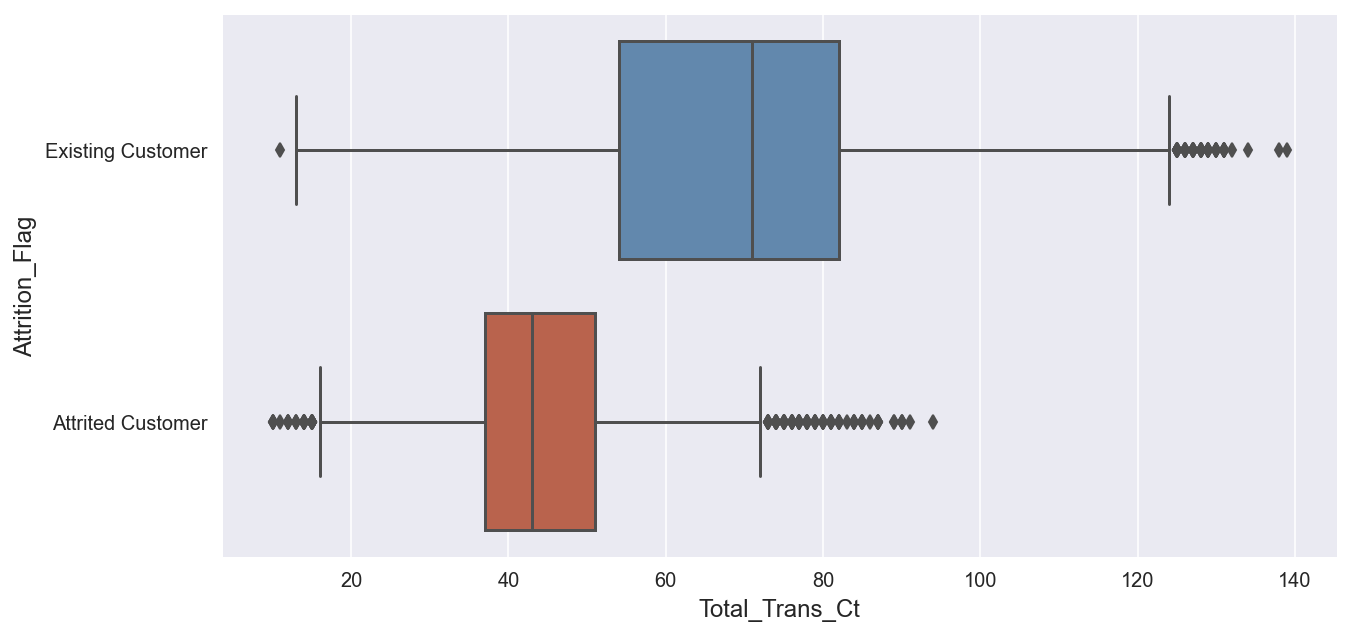

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Total_Trans_Ct", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

* `Lower` 'Total_Trans_Ct' are safer predictors of attrition that higher values.

#### Attrition_Flag vs Total_Ct_Chng_Q4_Q1

In [51]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Total_Ct_Chng_Q4_Q1", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

<IPython.core.display.Javascript object>

* `Lower` 'Total_Ct_Chng_Q4_Q1' are slightly better predictors of attrition that higher values.

#### Attrition_Flag vs Avg_Utilization_Ratio

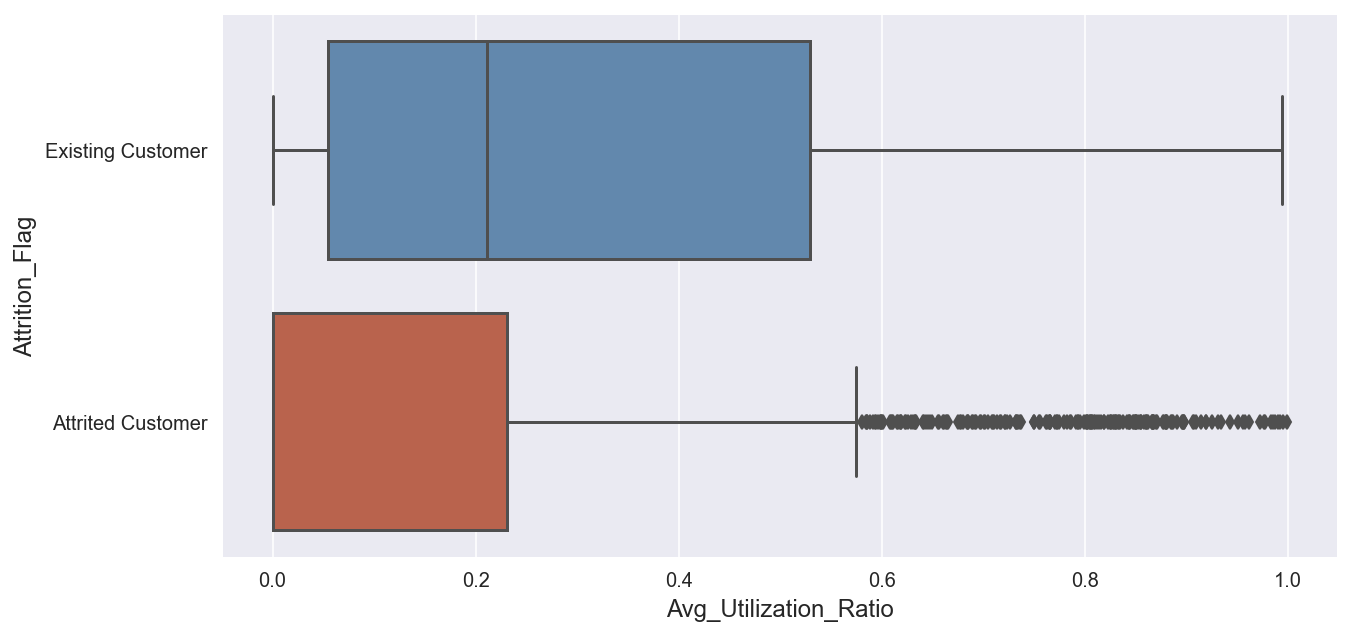

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(10, 5))
my_pal = {"Existing Customer": "#5588BA", "Attrited Customer": "#CB593B"}
sns.boxplot(x="Avg_Utilization_Ratio", y="Attrition_Flag", data=data, palette=my_pal)
plt.show()

* It doesn't seem to be in the safe zone to utilize 'Avg_Utilization_Ratio' as a safer predictor of attrition.

#### Correlation Matrix

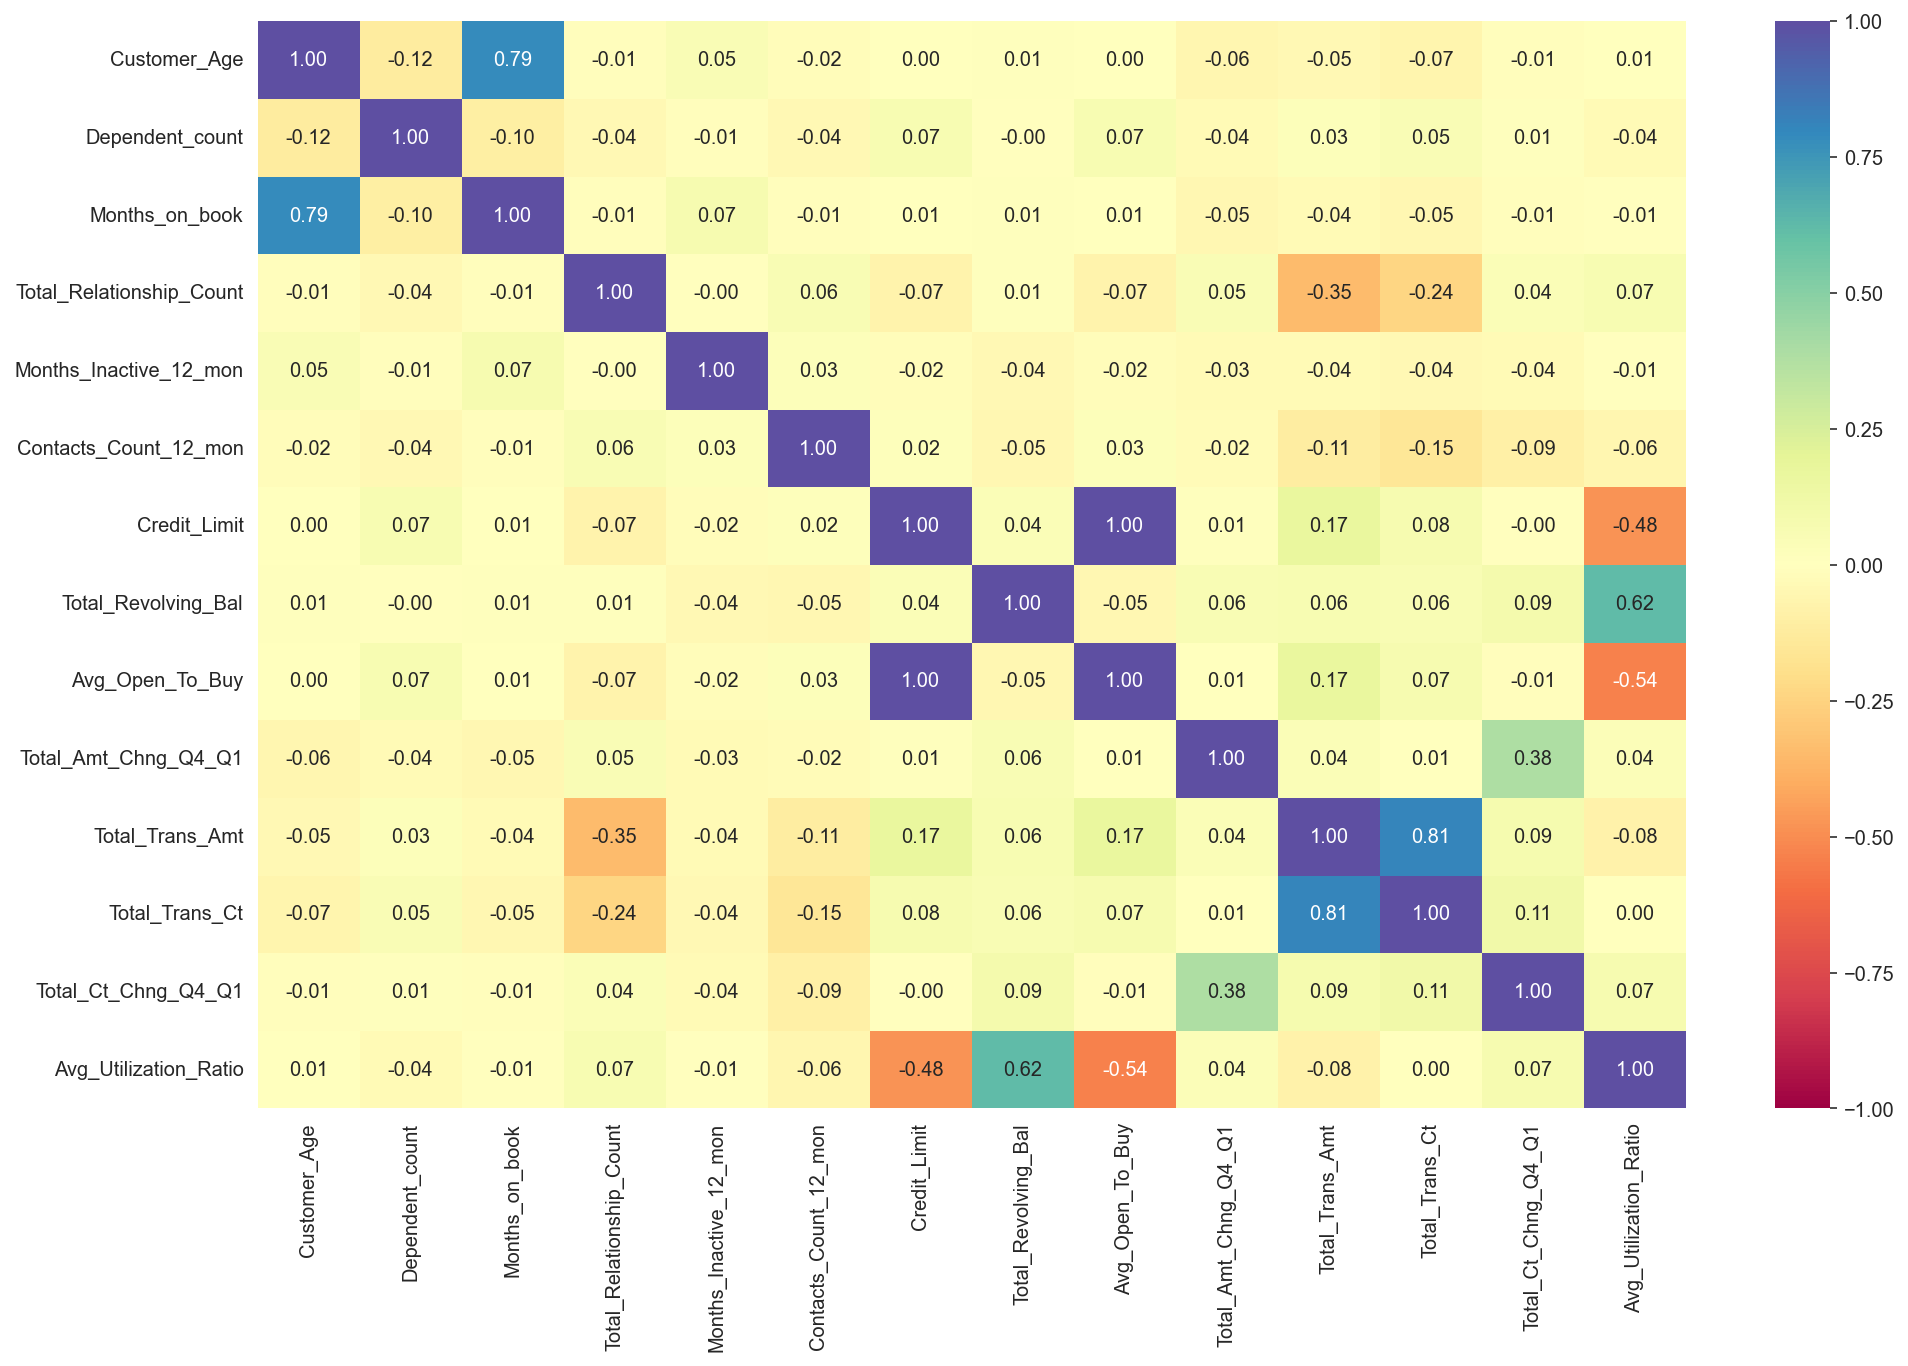

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    df[data.columns[1:]].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

#### Observations on Correlation Matrix

* 'Avg_Open_To_Buy' is 100% positively correlated with 'Credit_Limit'. We will remove 'Avg_Open_To_Buy'.
* 'Total_Trans_Ct' is highly positive correlated to 'Total_Trans_Amt'. We will remove 'Total_Trans_Ct'.
* 'Months_on_book' is highly positive correlated to 'Customer_Age'. We will remove 'Customer_Age'.

### Key meaningful observations
* Almost 84% of customers has no 'attrition' qualification.
* 'Customer_Age' distribution looks fairly normal (gaussian) with some outliers to the right of the median.
* 'Gender' has almost 53% 'female' population and 47% 'male'.
* 'Dependent_count' has almost 53% of population with with '2' and '3' dependents altogether.
* Second in frequency of number of dependents is with '1' and '4' with 18% and 16% respectively.
* Lowest frequency lies within number of dependents '0' and '5' with 9% and 4%.
* 'Graduate' is the most frequent 'Education_Level' with ~31%, followed by 'High School' with ~20%.
* Next in frequency is 'Uneducated' with ~15%, followed by 'College' at 10%.
* Lowest frequency lies within 'Post-Graduate' with 5.1% and 'Doctorate' with 4.5%.
* 'Married' is the most frequent 'Marital_Status' with 46%, followed by 'Single' with ~39%.
* Lowest frequency lies within 'Divorced' with 7.4%.
* On 'Income_Category' the highest percentage is for 'Less than $40K' with 35.2%. 

* Next in frequency we found customers with income within '40K - 60K' with ~18%. 

* The brackets '60K - 80K' and '80K - 120K' are 14% and 15% respectively. 

* Lowest frequency belongs to '$120K +' with a 7.2%. 

* There is a 'strange' segment called 'abc' with ~11%. We will investigate this further.
* On 'Card_Category' the highest percentage is for 'Blue' level with 93.2%.
* Next in frequency we found customers with level 'Silver' on 5.5%.
* Lowest frequency belongs to levels 'Gold' and 'Platinum' with 1.2% and 0.2% respectively.
* On 'Months_on_book' the highest percentage is for '36' months with 24.3%.
* Distribution looks pretty normal (gaussian) and a few outliers on the left and right of the box plot.
* On 'Total_Relationship_Count' the highest percentage is for '3' counts with ~23%.
* Next in frequency are '4', '5', and '6' counts with 18.9%, 18.7% and 18.4% respectively.
* Lowest frequency belongs to counts '2' and '1' with 12.3% and 9% respectively.
* On 'Months_Inactive_12_mon' the highest percentage is for '3' counts with ~38%.
* Next in frequency are '2', and '1' with 32.4%, and 22% respectively.
* Lowest frequency belongs to counts '4', '5' and '6' with 4.3%, 1.8%, and 1.2% respectively.
* On 'Contacts_Count_12_mon' the highest percentage is for '3', and '2' counts with ~33.4%, and 31.9%.
* Next in frequency are '1', and '4' with 14.8%, and 13.8% respectively.
* Lowest frequency belongs to counts '0', '5', and '6' with 3.9%, 1.7%, and 0.5% respectively.
* On 'Credit_Limit' the distribution looks skewed to the right but 'gaussian' and a considerable number of outliers to the right of the median.
* On 'Total_Revolving_Bal' the distribution looks skewed to the left ('mean' behind the 'median') with a considerable 'hump' at the left indicating a possible bi-modal distribution.
* On 'Avg_Open_To_Buy' the distribution looks skewed to the right.
* It also shows a small 'hump' at the right indicating a possible bi-modal distribution.
* And a 'bunch' of 'outliers' which will be analyzed later.
* On 'Total_Amt_Chng_Q4_Q1' the distribution looks slightly skewed to the right.
* It also shows a considerable number of 'outliers' on both sides of the whiskers.
* On 'Total_Trans_Amt' the distribution looks skewed to the right with several 'humps'.
* It also shows a considerable number of 'outliers' on the right of the higher whisker.
* On 'Total_Trans_Ct' the distribution looks skewed to the left with a couple of 'humps'.
* It also shows a few 'outliers' on the right of the higher whisker.
* On 'Total_Ct_Chng_Q4_Q1' the distribution looks like is a 'straight' 'gaussian'.
* It also shows a high number of 'outliers' on the right & left of the whiskers.
* On 'Avg_Utilization_Ratio' the distribution looks skewed to right.
* It doesn't show 'outliers' but a second 'hump' indicating the presence of a bi-modal distribution.On 'Avg_Utilization_Ratio' the distribution looks skewed to right.
* It doesn't show 'outliers' but a second 'hump' indicating the presence of a bi-modal distribution.
* Attrition is more possible at 'Customer_Age' 68 & 66 than in other ages.
* Attrition is not too different if th customer is 'Male' or 'Female'.
* 'Gender' doesn't seen to be a relevant attribute to identify Attrition.
* Attrition is not too different if the customer have many or none dependents.
* 'Dependent_count' doesn't seen to be a relevant attribute to identify Attrition.
* 'Education_Level' doesn't seen to be a relevant attribute to identify Attrition.
* 'Marital_Status' also doesn't seen to be a relevant attribute to identify Attrition. Proportions are relatively the same.
* 'Income_Category' also doesn't seen to be a relevant attribute to identify Attrition. Proportions are relatively the same.
* 'Card_Category' indicates that customers with 'Premium' level cards are slightly more inclined to attrite than customer other type of card.
* 'Months_on_book' doesn't seem to indicate a clear condition that attrite will happen subject to any number of `Months_on_book'.
* On 'Total_Relationship_Count' is slighlty higher to attrite when count is '1' or '2'.
* On 'Months_Inactive_12_mon' we see that when is '0' the attrition is more likely to happen.
* Customers are highly likely to attrite when contacts are 6 or 5 and start decreasing with the number of decreasing counts.
* 'Credit_Limit' is not a determinant factor to sort out if we will have attrite or not.
* 'Total_Revolving_Bal' may be a good feature to decide if we will have an attrite customer or not.
* Attrite is more likely to happen when 'Total_Revolving_Bal' is below ~1,300.
* 'Avg_Open_To_Buy' is not good indicator ot attrition.
* There is not much differentiation whether we will have attrition when using 'Total_Amt_Chng_Q4_Q1'.
* Lower 'Total_Trans_Amt' are more predictive of attrition that higher values.
* Lower 'Total_Trans_Ct' are safer predictors of attrition that higher values.
* Lower 'Total_Ct_Chng_Q4_Q1' are slightly better predictors of attrition that higher values.
* It doesn't seem to be in the safe zone to utilize 'Avg_Utilization_Ratio' as a safer predictor of attrition.
* 'Avg_Open_To_Buy' is 100% positively correlated with 'Credit_Limit'. We will remove 'Avg_Open_To_Buy'.
* 'Total_Trans_Ct' is highly positive correlated to 'Total_Trans_Amt'. We will remove 'Total_Trans_Ct'.
* 'Months_on_book' is highly positive correlated to 'Customer_Age'. We will remove 'Customer_Age'.

## Data Preprocessing

### Prepare the data for analysis

### Missing value Treatment

* We have two predictors of data type 'object': 'Education_Level' and 'Marital_Status' with missing values.
* We will impute the `mode` of those columns to fix the missing data.

In [54]:
# mode for 'Education_Level'
education_level_mode = data["Education_Level"].mode()[0]
# impute mode on 'Education_Level'
data.loc[data["Education_Level"].isna(), "Education_Level"] = education_level_mode

<IPython.core.display.Javascript object>

In [55]:
# mode for 'Marital_Status'
marital_status_mode = data["Marital_Status"].mode()[0]
# impute mode on 'Marital_Status'
data.loc[data["Marital_Status"].isna(), "Marital_Status"] = marital_status_mode

<IPython.core.display.Javascript object>

### Feature Engineering

#### Check the data of the 'object' datatype columns.

In [56]:
cols_obj = data.select_dtypes(["object"])
cols_obj.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Check value counts for 'categorical' variables

In [57]:
# Checking value counts of categorical variables
for i in cols_obj:
    print(f'Unique values in "{i}" are :')
    df_concat = pd.concat(
        [
            df[i].value_counts().to_frame(),
            round(
                df[i].value_counts(normalize=True).to_frame().rename(columns={i: "%"})
                * 100,
                2,
            ),
        ],
        axis=1,
    )
    print(df_concat)
    print("*" * 50)

Unique values in "Attrition_Flag" are :
                   Attrition_Flag      %
Existing Customer            8500  83.93
Attrited Customer            1627  16.07
**************************************************
Unique values in "Gender" are :
   Gender      %
F    5358  52.91
M    4769  47.09
**************************************************
Unique values in "Education_Level" are :
               Education_Level      %
Graduate                  3128  36.34
High School               2013  23.39
Uneducated                1487  17.27
College                   1013  11.77
Post-Graduate              516   5.99
Doctorate                  451   5.24
**************************************************
Unique values in "Marital_Status" are :
          Marital_Status      %
Married             4687  49.98
Single              3943  42.05
Divorced             748   7.98
**************************************************
Unique values in "Income_Category" are :
                Income_Category   

<IPython.core.display.Javascript object>

* On 'Income_Category' the value 'abc' doesn't seem to be a real value.
* During the section to treat Missing data we will impute this with KNN algorithm as this 'abc' value represents almost 11% of the data.

#### Creating 'categorical' variables

In [58]:
# review of current status of data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

In [59]:
# Set of dependent/independent variables to be converted to categorical
col_cat = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

<IPython.core.display.Javascript object>

#### Feature Engineering on 'Attrition_Flag'

In [60]:
data["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

<IPython.core.display.Javascript object>

In [61]:
data["Attrition_Flag"] = data["Attrition_Flag"].map(
    {"Existing Customer": 0, "Attrited Customer": 1}
)

<IPython.core.display.Javascript object>

#### Feature Engineering on 'Gender'

In [62]:
data["Gender"].unique()

array(['M', 'F'], dtype=object)

<IPython.core.display.Javascript object>

In [63]:
gender_dic = {"M": 0, "F": 1}
data["Gender"] = data["Gender"].map(gender_dic)
data["Gender"].unique()

array([0, 1], dtype=int64)

<IPython.core.display.Javascript object>

#### Feature Engineering on 'Education_Level'

* On 'Education_Level' we have a very low proportion of observation on 'Post-Graduate' and 'Doctorate'.

* We will merge these two 'categories' in one called 'Post-Grad-Doc'.

In [64]:
# feature engineering on 'Education_level'
def merge_ed_level(ed_level):
    if ed_level in ["Post-Graduate", "Doctorate"]:
        return "Post-Grad-Doc"
    return ed_level


data["Education_Level"] = data["Education_Level"].apply(merge_ed_level)

<IPython.core.display.Javascript object>

#### Feature Engineering on 'Card_Category'

In [65]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<IPython.core.display.Javascript object>

* On 'Card_Category' we will merge 'Silver', 'Gold', and 'Platinum' in one single class called 'Slvr-Gld-Plat' as they have individually to low occurrences.

In [66]:
# feature engineering on 'Card_Category'
def merge_card_cat(card_cat):
    if card_cat in ["Silver", "Gold", "Platinum"]:
        return "Slvr-Gld-Plat"
    return card_cat


data["Card_Category"] = data["Card_Category"].apply(merge_card_cat)

<IPython.core.display.Javascript object>

#### Feature Engineering on 'Income_Category'

In [67]:
# visualizing types of categories within 'Income_Category'
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

* On 'Income_Category' we have 1,112 observations belonging to a 'suspicious' category called 'abc'.
* We will set that value to NaN, then we will encode the 'valid' categories.
* Next step will be to impute values on the NaN observations of 'Income Category' using KNN.

In [68]:
# setting 'Income_Category" = 'abc' as NaN
data.loc[data["Income_Category"] == "abc", "Income_Category"] = np.nan
data.loc[data["Income_Category"].isnull()]

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
19                  0            45       1                2        Graduate        Married             NaN          Blue              37                         6                       1                      2       14470.0                 1157          13313.0                 0.966             1207              21                0.909                  0.080
28                  0            44       1                3      Uneducated         Single             NaN          Blue              34                         5                       2                      2       10100.0                    0          10100.0                 0.525             1052              18                1.571                  0.000
39                  1            66       1                0   Post-Grad-Doc        Married             NaN          Blue              56                         5                       4                      3        7882.0                  605           7277.0                 1.052              704              16                0.143                  0.077
44                  0            38       1                4        Graduate         Single             NaN          Blue              28                         2                       3                      3        9830.0                 2055           7775.0                 0.977             1042              23                0.917                  0.209
58                  0            44       1                5        Graduate        Married             NaN          Blue              35                         4                       1                      2        6273.0                  978           5295.0                 2.275             1359              25                1.083                  0.156
...               ...           ...     ...              ...             ...            ...             ...           ...             ...                       ...                     ...                    ...           ...                  ...              ...                   ...              ...             ...                  ...                    ...
10021               1            30       1                1        Graduate        Married             NaN          Blue              18                         4                       1                      4        4377.0                 2517           1860.0                 0.941             8759              74                0.609                  0.575
10040               1            50       1                3   Post-Grad-Doc         Single             NaN          Blue              36                         4                       3                      3        5173.0                    0           5173.0                 0.912             8757              68                0.789                  0.000
10083               0            42       1                4      Uneducated        Married             NaN          Blue              23                         4                       1                      2        8348.0                    0           8348.0                 0.695            15905             111                0.708                  0.000
10092               1            40       1                3        Graduate        Married             NaN          Blue              25                         1                       2                      3        6888.0                 1878           5010.0                 1.059             9038              64                0.829                  0.273
10119               1    

<IPython.core.display.Javascript object>

In [69]:
# shows current distribution of 'Income_Category'
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
# Encoding 'Income_Category'
dic_income = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
}
data["Income_Category"] = data["Income_Category"].map(dic_income)

<IPython.core.display.Javascript object>

In [71]:
# Encode temporarily 'object' variables to use KNN Imputer
data["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'College', 'Post-Grad-Doc'], dtype=object)

<IPython.core.display.Javascript object>

In [72]:
ed_level_dic = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Grad-Doc": 4,
}
data["Education_Level"] = data["Education_Level"].map(ed_level_dic)
data["Education_Level"].unique()

array([1, 3, 0, 2, 4], dtype=int64)

<IPython.core.display.Javascript object>

In [73]:
data["Marital_Status"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

<IPython.core.display.Javascript object>

In [74]:
marital_status_dic = {"Married": 0, "Single": 1, "Divorced": 2}
data["Marital_Status"] = data["Marital_Status"].map(marital_status_dic)
data["Marital_Status"].unique()

array([0, 1, 2], dtype=int64)

<IPython.core.display.Javascript object>

In [75]:
data["Card_Category"].unique()

array(['Blue', 'Slvr-Gld-Plat'], dtype=object)

<IPython.core.display.Javascript object>

In [76]:
card_cat_dic = {"Blue": 0, "Slvr-Gld-Plat": 1}
data["Card_Category"] = data["Card_Category"].map(card_cat_dic)
data["Card_Category"].unique()

array([0, 1], dtype=int64)

<IPython.core.display.Javascript object>

In [77]:
# make a safe copy of the dataframe 'data'
df_safe = data.copy()

<IPython.core.display.Javascript object>

In [78]:
df_safe

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0                   0            45       0                3                1               0              2.0              0              39                         5                       1                      3       12691.0                  777          11914.0                 1.335             1144              42                1.625                  0.061
1                   0            49       1                5                3               1              0.0              0              44                         6                       1                      2        8256.0                  864           7392.0                 1.541             1291              33                3.714                  0.105
2                   0            51       0                3                3               0              3.0              0              36                         4                       1                      0        3418.0                    0           3418.0                 2.594             1887              20                2.333                  0.000
3                   0            40       1                4                1               0              0.0              0              34                         3                       4                      1        3313.0                 2517            796.0                 1.405             1171              20                2.333                  0.760
4                   0            40       0                3                0               0              2.0              0              21                         5                       1                      0        4716.0                    0           4716.0                 2.175              816              28                2.500                  0.000
...               ...           ...     ...              ...              ...             ...              ...            ...             ...                       ...                     ...                    ...           ...                  ...              ...                   ...              ...             ...                  ...                    ...
10122               0            50       0                2                3               1              1.0              0              40                         3                       2                      3        4003.0                 1851           2152.0                 0.703            15476             117                0.857                  0.462
10123               1            41       0                2                3               2              1.0              0              25                         4                       2                      3        4277.0                 2186           2091.0                 0.804             8764              69                0.683                  0.511
10124               1            44       1                1                1               0              0.0              0              36                         5                       3                      4        5409.0                    0           5409.0                 0.819            10291              60                0.818                  0.000
10125               1            30       0                2                3               0              1.0              0              36                         4                       3                      3        5281.0                    0           5281.0                 0.535             8395              62                0.722     

<IPython.core.display.Javascript object>

In [79]:
# verify we have previous 'abc' category as NaN now
df_safe.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [80]:
df_safe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           9015 non-null   float64
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

In [81]:
# initialize knn imputer
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [82]:
# columns of the df_safe dataframe
columns = df_safe.columns

<IPython.core.display.Javascript object>

In [83]:
df_filled = imputer.fit_transform(df_safe)

<IPython.core.display.Javascript object>

In [84]:
# df_filled now is a dataframe of only float64 values
# we will re-cast those columns to its original datatype
df_filled = pd.DataFrame(df_filled, columns=columns)

<IPython.core.display.Javascript object>

In [85]:
# converting to original data types
for col in df_filled.columns:
    if df_safe[col].dtype == "float64":
        df_filled[col] = df_filled[col].astype("float64")
    if df_safe[col].dtype == "int64":
        df_filled[col] = df_filled[col].fillna(0).astype(np.int64, errors="ignore")

<IPython.core.display.Javascript object>

In [86]:
# checking that there is no NaN values in the dataset
df_filled.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

In [87]:
# converting 'imputed' column 'Income_Category' from 'float64' to 'int64'
df_filled["Income_Category"] = df_filled["Income_Category"].astype("int64")

<IPython.core.display.Javascript object>

In [88]:
# copying imputed dataset df_filled back to data
data = df_filled.copy()

<IPython.core.display.Javascript object>

#### Removing highly correlated features

* We found out in the 'correlation matrix' that some variables are highly correlated.
* We are removing 'Customer_Age', 'Total_Trans_Ct', and 'Avg_Open_To_Buy' for this reason.

In [89]:
# dropping some highly correlated features
data.drop(
    axis=1, columns=["Customer_Age", "Total_Trans_Ct", "Avg_Open_To_Buy"], inplace=True
)

<IPython.core.display.Javascript object>

In [90]:
data

Attrition_Flag  Gender  Dependent_count  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0                   0       0                3                1               0                2              0              39                         5                       1                      3       12691.0                  777                 1.335             1144                1.625                  0.061
1                   0       1                5                3               1                0              0              44                         6                       1                      2        8256.0                  864                 1.541             1291                3.714                  0.105
2                   0       0                3                3               0                3              0              36                         4                       1                      0        3418.0                    0                 2.594             1887                2.333                  0.000
3                   0       1                4                1               0                0              0              34                         3                       4                      1        3313.0                 2517                 1.405             1171                2.333                  0.760
4                   0       0                3                0               0                2              0              21                         5                       1                      0        4716.0                    0                 2.175              816                2.500                  0.000
...               ...     ...              ...              ...             ...              ...            ...             ...                       ...                     ...                    ...           ...                  ...                   ...              ...                  ...                    ...
10122               0       0                2                3               1                1              0              40                         3                       2                      3        4003.0                 1851                 0.703            15476                0.857                  0.462
10123               1       0                2                3               2                1              0              25                         4                       2                      3        4277.0                 2186                 0.804             8764                0.683                  0.511
10124               1       1                1                1               0                0              0              36                         5                       3                      4        5409.0                    0                 0.819            10291                0.818                  0.000
10125               1       0                2                3               0                1              0              36                         4                       3                      3        5281.0                    0                 0.535             8395                0.722                  0.000
10126               1       1                2                3               0                0              1              25                         6                       2                      4       10388.0                 1961                 0.703            10294                0.649                  0.189

[10127 rows x 17 columns]

<IPython.core.display.Javascript object>

#### Feature Engineering on 'Months_on_book'

In [91]:
# define function to group items from 'Months_on_book'
def months_on_book_group(month):
    """
    majority of observations are with 'Months_on_book' = 36
    Then we will encode this as a type 'eq36'.
    Everything > 36 encoded as type 'gt36', and < 36 encoded as 'lt36'.
    """
    if month == 36:
        return "eq36"
    if month > 36:
        return "gt36"
    return "lt36"

<IPython.core.display.Javascript object>

In [92]:
# encoding 'Months_on_book'
data["Months_on_book_bin"] = data["Months_on_book"].apply(months_on_book_group)
data.drop(axis=1, columns=["Months_on_book"], inplace=True)

<IPython.core.display.Javascript object>

In [93]:
data.head()

Attrition_Flag  Gender  Dependent_count  Education_Level  Marital_Status  Income_Category  Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Months_on_book_bin
0               0       0                3                1               0                2              0                         5                       1                      3       12691.0                  777                 1.335             1144                1.625                  0.061               gt36
1               0       1                5                3               1                0              0                         6                       1                      2        8256.0                  864                 1.541             1291                3.714                  0.105               gt36
2               0       0                3                3               0                3              0                         4                       1                      0        3418.0                    0                 2.594             1887                2.333                  0.000               eq36
3               0       1                4                1               0                0              0                         3                       4                      1        3313.0                 2517                 1.405             1171                2.333                  0.760               lt36
4               0       0                3                0               0                2              0                         5                       1                      0        4716.0                    0                 2.175              816                2.500                  0.000               lt36

<IPython.core.display.Javascript object>

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Marital_Status            10127 non-null  int64  
 5   Income_Category           10127 non-null  int64  
 6   Card_Category             10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

<IPython.core.display.Javascript object>

In [95]:
# converting back to original 'object' values for the 'object' variables
object_features_dic = {
    "Gender": gender_dic,
    "Education_Level": ed_level_dic,
    "Marital_Status": marital_status_dic,
    "Income_Category": dic_income,
    "Card_Category": card_cat_dic,
}

<IPython.core.display.Javascript object>

In [96]:
# reverse the dictionary used to encoding previously
for key, dct in object_features_dic.items():
    #     print(key, dct)
    rev_dct = {v: k for k, v in dct.items()}
    #     print(rev_dct)
    data[key] = data[key].map(rev_dct)

<IPython.core.display.Javascript object>

In [97]:
data

Attrition_Flag Gender  Dependent_count Education_Level Marital_Status Income_Category  Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Months_on_book_bin
0                   0      M                3     High School        Married     $60K - $80K           Blue                         5                       1                      3       12691.0                  777                 1.335             1144                1.625                  0.061               gt36
1                   0      F                5        Graduate         Single  Less than $40K           Blue                         6                       1                      2        8256.0                  864                 1.541             1291                3.714                  0.105               gt36
2                   0      M                3        Graduate        Married    $80K - $120K           Blue                         4                       1                      0        3418.0                    0                 2.594             1887                2.333                  0.000               eq36
3                   0      F                4     High School        Married  Less than $40K           Blue                         3                       4                      1        3313.0                 2517                 1.405             1171                2.333                  0.760               lt36
4                   0      M                3      Uneducated        Married     $60K - $80K           Blue                         5                       1                      0        4716.0                    0                 2.175              816                2.500                  0.000               lt36
...               ...    ...              ...             ...            ...             ...            ...                       ...                     ...                    ...           ...                  ...                   ...              ...                  ...                    ...                ...
10122               0      M                2        Graduate         Single     $40K - $60K           Blue                         3                       2                      3        4003.0                 1851                 0.703            15476                0.857                  0.462               gt36
10123               1      M                2        Graduate       Divorced     $40K - $60K           Blue                         4                       2                      3        4277.0                 2186                 0.804             8764                0.683                  0.511               lt36
10124               1      F                1     High School        Married  Less than $40K           Blue                         5                       3                      4        5409.0                    0                 0.819            10291                0.818                  0.000               eq36
10125               1      M                2        Graduate        Married     $40K - $60K           Blue                         4                       3                      3        5281.0                    0                 0.535             8395                0.722                  0.000               eq36
10126               1      F                2        Graduate        Married  Less than $40K  Slvr-Gld-Plat                         6                       2                      4       10388.0                 1961                 0.703            10294                0.649                  0.189               lt36

[10127 rows x 17 columns]

<IPython.core.display.Javascript object>

In [98]:
# numerical columns with high variance
col_num = [
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

<IPython.core.display.Javascript object>

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

<IPython.core.display.Javascript object>

* We will convert 'Total_Revolving_Bal' and 'Total_Trans_Amt' to 'float64'

In [100]:
# convert 'Total_Revolving_Bal' and 'Total_Trans_Amt' to 'float64'
data["Total_Revolving_Bal"] = data["Total_Revolving_Bal"].astype("float64")
data["Total_Trans_Amt"] = data["Total_Trans_Amt"].astype("float64")

<IPython.core.display.Javascript object>

#### Binning for 'categorical' and 'numerical' variables

In [101]:
# degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]
# student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]

# student_results_degrees = pd.cut(
#     student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees
# )
# pd.value_counts(student_results_degrees)

<IPython.core.display.Javascript object>

### Outlier Treatment

#### Credit_Limit

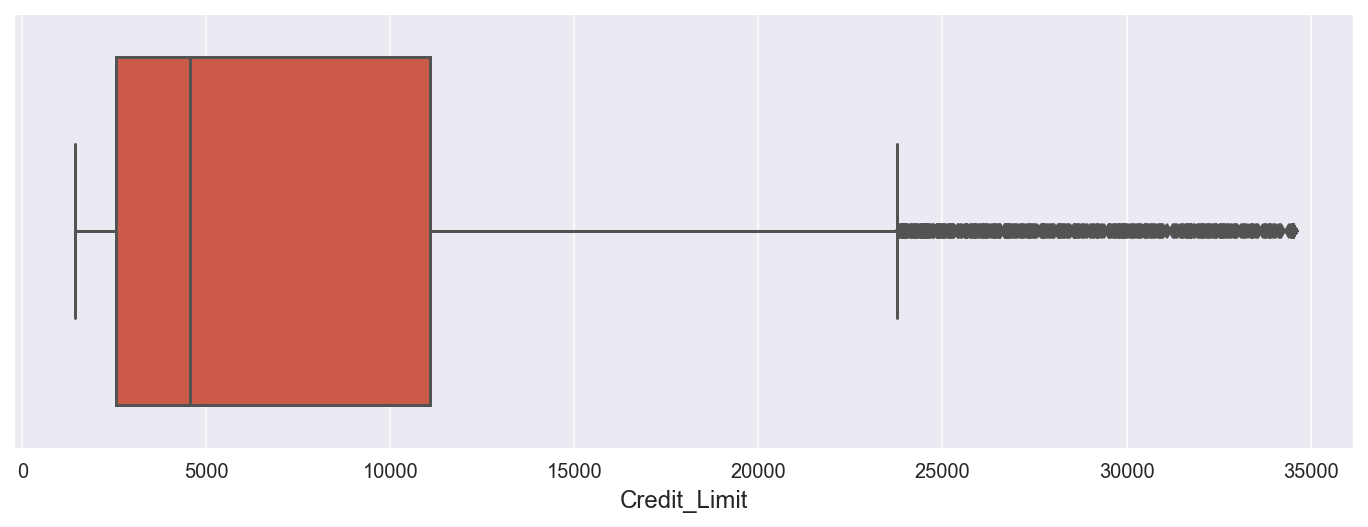

<IPython.core.display.Javascript object>

In [102]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=data,
    x="Credit_Limit",
)
plt.show()

In [103]:
# getting outliers values and location indexes of the outliers
# Note: using a higher `amplitude` for the IQR multiplier of 2.5 instead of the common 1.5
outliers, bad_indexes = get_outliers(
    data, "Credit_Limit", factor=2.5, include_indexes=True
)
# number of observations out of range
data.loc[bad_indexes].shape

(579, 17)

<IPython.core.display.Javascript object>

* There are 579 wrong observations in 'Credit_Limit'.

In [104]:
data.loc[bad_indexes]

Attrition_Flag Gender  Dependent_count Education_Level Marital_Status Income_Category  Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Months_on_book_bin
6                   0      M                4        Graduate        Married         $120K +  Slvr-Gld-Plat                         6                       1                      3       34516.0               2264.0                 1.975           1330.0                0.722                  0.066               gt36
40                  0      M                3        Graduate         Single    $80K - $120K           Blue                         2                       2                      2       32426.0                578.0                 1.042           1109.0                0.474                  0.018               gt36
45                  0      M                4      Uneducated         Single    $80K - $120K           Blue                         3                       2                      3       34516.0                  0.0                 1.621           1444.0                1.333                  0.000               lt36
61                  1      M                2        Graduate        Married     $60K - $80K  Slvr-Gld-Plat                         2                       4                      4       34516.0                  0.0                 0.763            691.0                0.500                  0.000               lt36
65                  0      M                4      Uneducated         Single    $80K - $120K  Slvr-Gld-Plat                         4                       1                      4       34516.0               1515.0                 0.592           1293.0                0.600                  0.044               gt36
...               ...    ...              ...             ...            ...             ...            ...                       ...                     ...                    ...           ...                  ...                   ...              ...                  ...                    ...                ...
10088               0      M                2        Graduate         Single     $60K - $80K  Slvr-Gld-Plat                         4                       2                      2       34516.0               1529.0                 0.609          13940.0                0.810                  0.044               lt36
10095               0      M                3        Graduate        Married    $80K - $120K           Blue                         4                       1                      3       34516.0               1099.0                 0.816          15490.0                0.618                  0.032               lt36
10098               1      M                3        Graduate         Single         $120K +  Slvr-Gld-Plat                         4                       3                      4       34516.0                  0.0                 1.007           9931.0                0.750                  0.000               eq36
10110               0      M                1        Graduate         Single    $80K - $120K  Slvr-Gld-Plat                         5                       2                      2       34516.0               1091.0                 0.640          15274.0                0.714                  0.032               gt36
10112               1      M                2         College        Married         $120K +  Slvr-Gld-Plat                         2                       1                      4       34516.0                  0.0                 1.004           9338.0                0.622                  0.000               lt36

[579 rows x 17 columns]

<IPython.core.display.Javascript object>

* There are a high number of observations with the value 34,516. This sounds like wrong data. We will remove these observations.

In [105]:
# removing extreme outliers
data.drop(index=bad_indexes, inplace=True)

<IPython.core.display.Javascript object>

#### Total_Amt_Chng_Q4_Q1

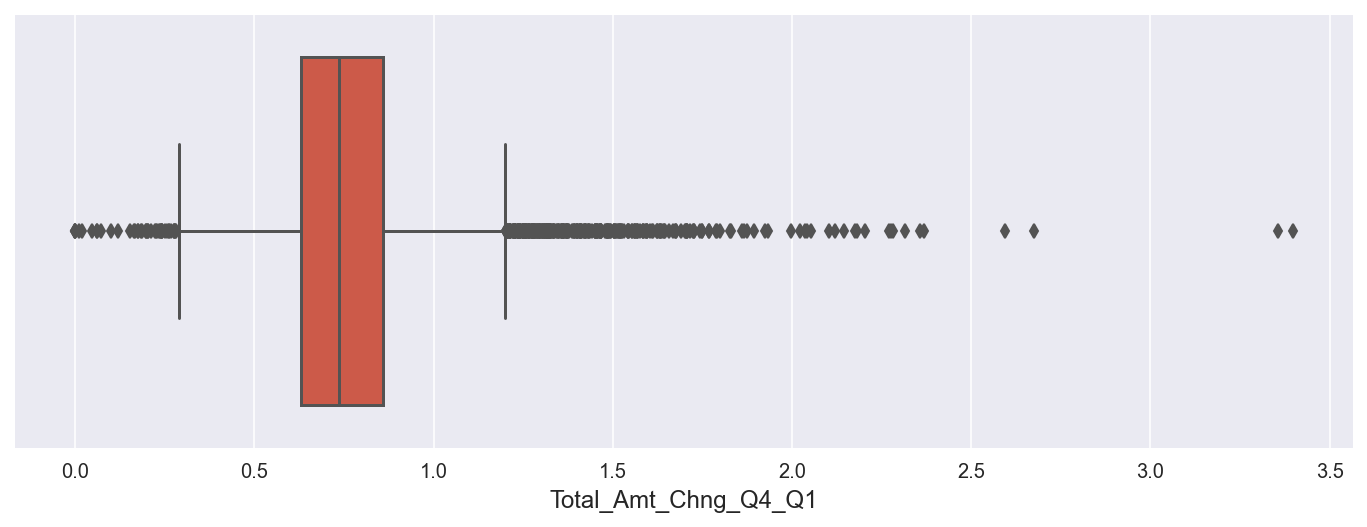

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=data,
    x="Total_Amt_Chng_Q4_Q1",
)
plt.show()

In [107]:
# getting outliers values and location indexes of the outliers
# Note: using a higher `amplitude` for the IQR multiplier of 2.5 instead of the common 1.5
outliers, bad_indexes = get_outliers(
    data, "Total_Amt_Chng_Q4_Q1", factor=2.5, include_indexes=True
)
good_indexes = [idx for idx in data.index if idx not in bad_indexes]
data.loc[bad_indexes].shape

(148, 17)

<IPython.core.display.Javascript object>

* There are 155 observations out of range.

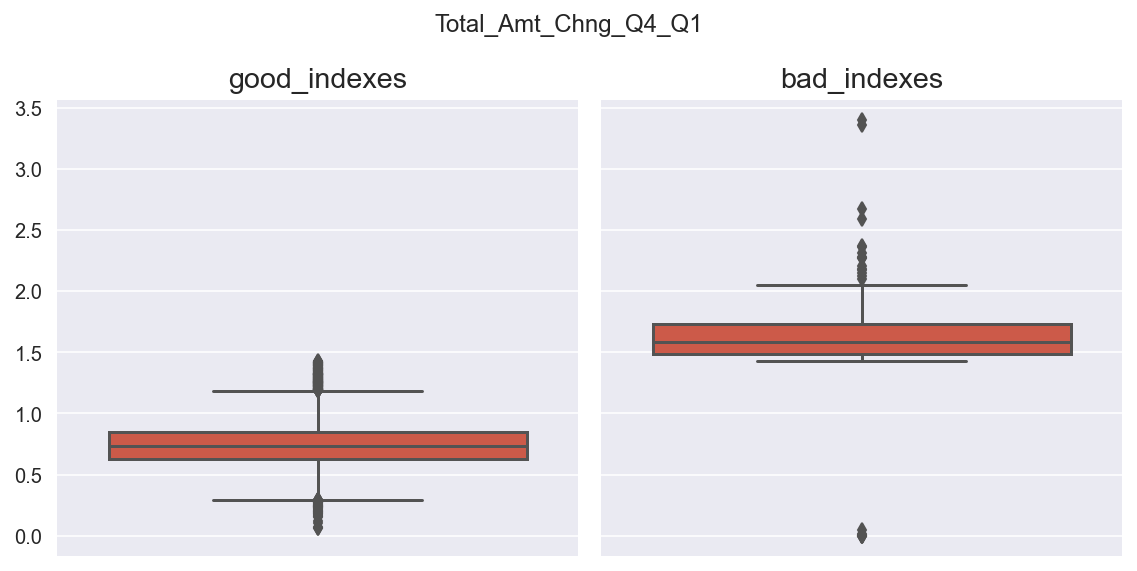

<IPython.core.display.Javascript object>

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)
sns.boxplot(ax=ax[0], data=data, y=data.loc[good_indexes, "Total_Amt_Chng_Q4_Q1"]).set(
    ylabel=""
)
sns.boxplot(ax=ax[1], data=data, y=data.loc[bad_indexes, "Total_Amt_Chng_Q4_Q1"]).set(
    ylabel=""
)
# Combine all the operations and display
fig.suptitle("Total_Amt_Chng_Q4_Q1")
ax[0].set_title("good_indexes")
ax[1].set_title("bad_indexes")
plt.tight_layout()
plt.show()

* 'bad_indexes' corresponding to extreme outliers having a **'median'** away from the **'median'** of the 'good_indexes'.

In [109]:
# removing extreme outliers
data.drop(index=bad_indexes, inplace=True)

<IPython.core.display.Javascript object>

#### Total_Trans_Amt

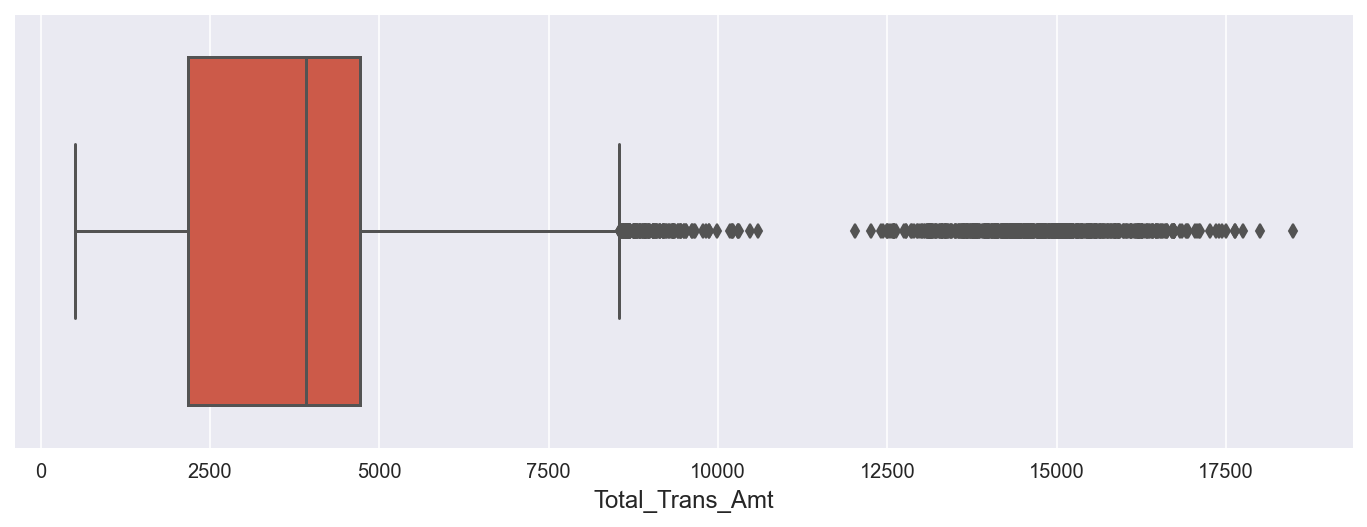

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=data,
    x="Total_Trans_Amt",
)
plt.show()

In [111]:
# getting outliers values and location indexes of the outliers
# Note: using a higher `amplitude` for the IQR multiplier of 2.5 instead of the common 1.5
outliers, bad_indexes = get_outliers(
    data, "Total_Trans_Amt", factor=2.5, include_indexes=True
)
good_indexes = [idx for idx in data.index if idx not in bad_indexes]
data.loc[bad_indexes].shape

(641, 17)

<IPython.core.display.Javascript object>

* There are 747 extreme outliers within 'Total_Trans_Amt'.

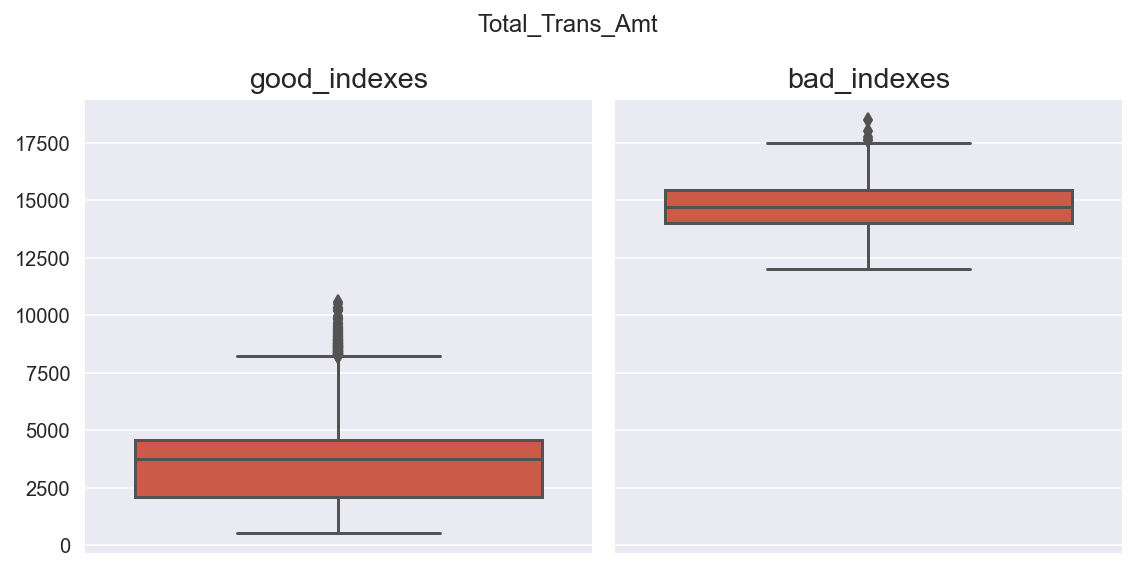

<IPython.core.display.Javascript object>

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)
sns.boxplot(ax=ax[0], data=data, y=data.loc[good_indexes, "Total_Trans_Amt"]).set(
    ylabel=""
)
sns.boxplot(ax=ax[1], data=data, y=data.loc[bad_indexes, "Total_Trans_Amt"]).set(
    ylabel=""
)
# Combine all the operations and display
fig.suptitle("Total_Trans_Amt")
ax[0].set_title("good_indexes")
ax[1].set_title("bad_indexes")
plt.tight_layout()
plt.show()

* As in the presious feature the 'bad_indexes' are more extreme in this case.

In [113]:
# removing extreme outliers
data.drop(index=bad_indexes, inplace=True)

<IPython.core.display.Javascript object>

#### Total_Ct_Chng_Q4_Q1

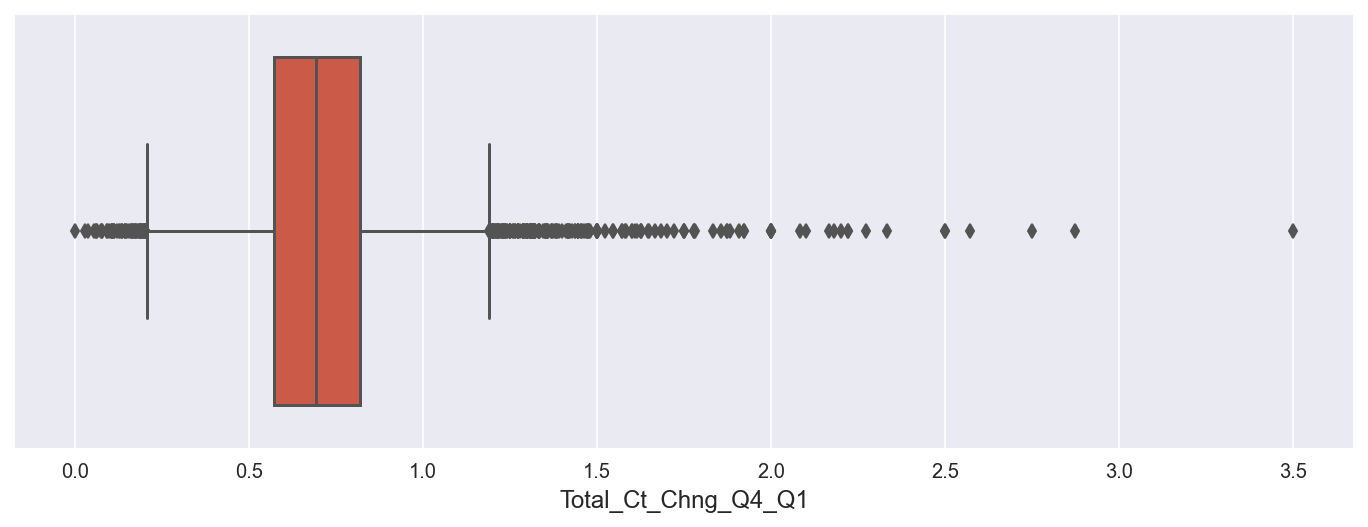

<IPython.core.display.Javascript object>

In [114]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=data,
    x="Total_Ct_Chng_Q4_Q1",
)
plt.show()

In [115]:
# getting outliers values and location indexes of the outliers
# Note: using a higher `amplitude` for the IQR multiplier of 2.5 instead of the common 1.5
outliers, bad_indexes = get_outliers(
    data, "Total_Ct_Chng_Q4_Q1", factor=2.5, include_indexes=True
)
good_indexes = [idx for idx in data.index if idx not in bad_indexes]
data.loc[bad_indexes].shape

(81, 17)

<IPython.core.display.Javascript object>

* There are 123 extreme values on 'Total_Ct_Chng_Q4_Q1'.

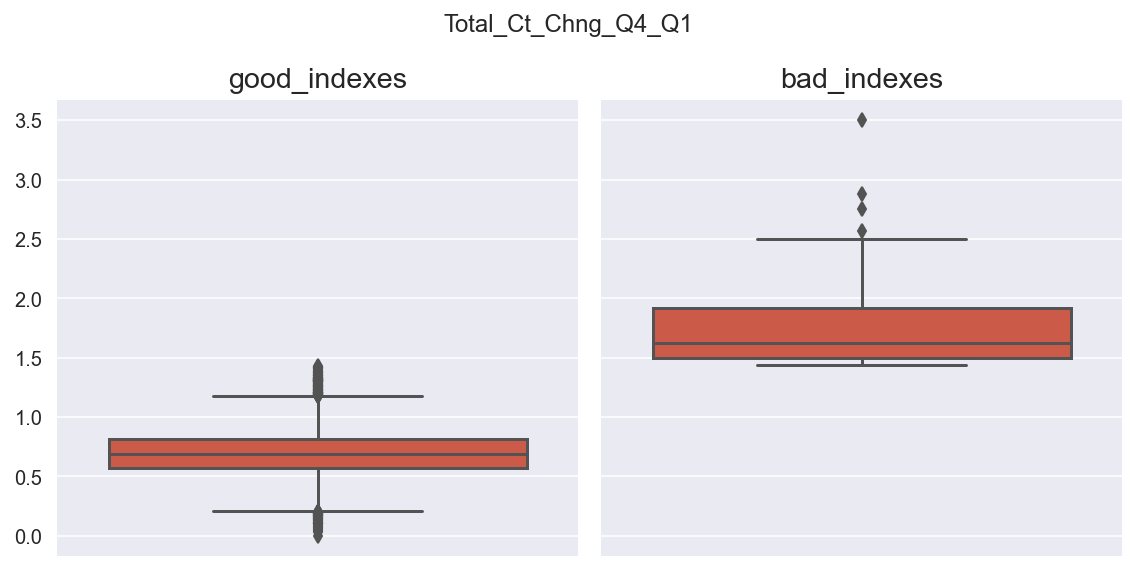

<IPython.core.display.Javascript object>

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)
sns.boxplot(ax=ax[0], data=data, y=data.loc[good_indexes, "Total_Ct_Chng_Q4_Q1"]).set(
    ylabel=""
)
sns.boxplot(ax=ax[1], data=data, y=data.loc[bad_indexes, "Total_Ct_Chng_Q4_Q1"]).set(
    ylabel=""
)
# Combine all the operations and display
fig.suptitle("Total_Ct_Chng_Q4_Q1")
ax[0].set_title("good_indexes")
ax[1].set_title("bad_indexes")
plt.tight_layout()
plt.show()

* Similar situation as before where extreme values are away from the **'median'** of 'good_indexes'.

In [117]:
# removing extreme outliers
data.drop(index=bad_indexes, inplace=True)

<IPython.core.display.Javascript object>

In [118]:
data.shape

(8678, 17)

<IPython.core.display.Javascript object>

* Now our dataset has only 8,678 observations after removing bad extreme outliers from the dataset.

In [119]:
data

Attrition_Flag Gender  Dependent_count Education_Level Marital_Status Income_Category  Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Months_on_book_bin
5                   0      M                2        Graduate        Married     $40K - $60K           Blue                         3                       1                      2        4010.0               1247.0                 1.376           1088.0                0.846                  0.311               eq36
10                  0      M                5      Uneducated        Married         $120K +           Blue                         5                       3                      2        6748.0               1467.0                 0.831           1201.0                0.680                  0.217               lt36
14                  0      F                2        Graduate        Married  Less than $40K           Blue                         5                       2                      2        2436.0                680.0                 1.190           1570.0                0.611                  0.279               gt36
19                  0      F                2        Graduate        Married     $40K - $60K           Blue                         6                       1                      2       14470.0               1157.0                 0.966           1207.0                0.909                  0.080               gt36
20                  0      M                1   Post-Grad-Doc       Divorced     $60K - $80K           Blue                         5                       2                      0       20979.0               1800.0                 0.906           1178.0                0.929                  0.086               gt36
...               ...    ...              ...             ...            ...             ...            ...                       ...                     ...                    ...           ...                  ...                   ...              ...                  ...                    ...                ...
10119               1      F                3      Uneducated         Single     $40K - $60K           Blue                         4                       3                      3       14657.0               2517.0                 0.166           6009.0                0.514                  0.172               gt36
10123               1      M                2        Graduate       Divorced     $40K - $60K           Blue                         4                       2                      3        4277.0               2186.0                 0.804           8764.0                0.683                  0.511               lt36
10124               1      F                1     High School        Married  Less than $40K           Blue                         5                       3                      4        5409.0                  0.0                 0.819          10291.0                0.818                  0.000               eq36
10125               1      M                2        Graduate        Married     $40K - $60K           Blue                         4                       3                      3        5281.0                  0.0                 0.535           8395.0                0.722                  0.000               eq36
10126               1      F                2        Graduate        Married  Less than $40K  Slvr-Gld-Plat                         6                       2                      4       10388.0               1961.0                 0.703          10294.0                0.649                  0.189               lt36

[8678 rows x 17 columns]

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion


* Model can make wrong predictions as:<p>

  * Predicting a customer will attrite and the customer doesn't attrite or churn.<p>

  * Predicting a customer will not attrite and the customer attrites or churn.


* Which case is more important?

  Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.
  

* How to reduce this loss i.e need to reduce False Negatives?

  The Bank wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives (i.e. Class 1) so that the Bank can provide incentives to control attrition (curning) rate especially for top-clients thereby optimizing the overall project cost in retaining the best customers.

### Models to be built

* We will build (6) `'standard' data` Models, (6) `'Oversampled data'` Models, and (6) `'Undersampled data'` Models. Out of the 18 models (6 on original, 6 on oversampled, 6 on undersampled data), we will select the top 3 models and tune them using a random search:<p>

  * `Logistic Regression`: In sklearn this class implements regularized logistic regression. Note that regularization is applied by default. It can handle both dense and sparse input.<p>
  
  * `Decision Tree Classifier`: In sklearn we have available the algorithm decision tree classifier. The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.<p>
  
  * `Bagging Classifier`: In sklearn a Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.<p>
      
  * `AdaBoost Classifier`: An AdaBoost classifier, in sklearn, is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.<p>
      
  * `Random Forest Classifier`: In sklearn a random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.<p>
  
  * `Gradient Boosting Classifier`: In sklearn a GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss.<p>
      

### Approach to split the data

* We will use the approach of Train / Validation / Test<p>
      
* We will split the data into train, test, and validation. Then, train the model using the train set, check the model performance on the validation set and tweak the hyperparameters by checking the performance on the validation set. Use test set to assess the performance only on the final model.<p>

* For our problem, we have 8k+ data points. We will split the data into 60% train, 20% validation, and 20% test. This would result in having fair enough data points in the train set and our model might be able to identify the relevant patterns.<p>
    
* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train, validation and test sets.
This is done using the stratify parameter in the train_test_split function.

### Data Preparation for Modeling

In [120]:
data.head()

Attrition_Flag Gender  Dependent_count Education_Level Marital_Status Income_Category Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Months_on_book_bin
5                0      M                2        Graduate        Married     $40K - $60K          Blue                         3                       1                      2        4010.0               1247.0                 1.376           1088.0                0.846                  0.311               eq36
10               0      M                5      Uneducated        Married         $120K +          Blue                         5                       3                      2        6748.0               1467.0                 0.831           1201.0                0.680                  0.217               lt36
14               0      F                2        Graduate        Married  Less than $40K          Blue                         5                       2                      2        2436.0                680.0                 1.190           1570.0                0.611                  0.279               gt36
19               0      F                2        Graduate        Married     $40K - $60K          Blue                         6                       1                      2       14470.0               1157.0                 0.966           1207.0                0.909                  0.080               gt36
20               0      M                1   Post-Grad-Doc       Divorced     $60K - $80K          Blue                         5                       2                      0       20979.0               1800.0                 0.906           1178.0                0.929                  0.086               gt36

<IPython.core.display.Javascript object>

In [121]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [122]:
X = data.drop(["Attrition_Flag"], axis=1)
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [123]:
X

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Education_Level_Graduate  Education_Level_High School  Education_Level_Post-Grad-Doc  Education_Level_Uneducated  Marital_Status_Married  Marital_Status_Single  Income_Category_$40K - $60K  Income_Category_$60K - $80K  Income_Category_$80K - $120K  Income_Category_Less than $40K  Card_Category_Slvr-Gld-Plat  Months_on_book_bin_gt36  Months_on_book_bin_lt36
5                    2                         3                       1                      2        4010.0               1247.0                 1.376           1088.0                0.846                  0.311         1                         1                            0                              0                           0                       1                      0                            1                            0                             0                               0                            0                        0                        0
10                   5                         5                       3                      2        6748.0               1467.0                 0.831           1201.0                0.680                  0.217         1                         0                            0                              0                           1                       1                      0                            0                            0                             0                               0                            0                        0                        1
14                   2                         5                       2                      2        2436.0                680.0                 1.190           1570.0                0.611                  0.279         0                         1                            0                              0                           0                       1                      0                            0                            0                             0                               1                            0                        1                        0
19                   2                         6                       1                      2       14470.0               1157.0                 0.966           1207.0                0.909                  0.080         0                         1                            0                              0                           0                       1                      0                            1                            0                             0                               0                            0                        1                        0
20                   1                         5                       2                      0       20979.0               1800.0                 0.906           1178.0                0.929                  0.086         1                         0                            0                              1                           0                       0                      0                            0                            1                             0                               0                            0                        1                        0
...                ...                       ...                     ...                    ...           ...                  ...                   ...              ...                  ...                    ...       ...                       ...                          ...                            ...                         ...                     ...                    ...                          ...                          ...                           ...                             ..

<IPython.core.display.Javascript object>

#### Split the data in Training, Validation, and Test

In [124]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.20, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(5553, 24) (1389, 24) (1736, 24)


<IPython.core.display.Javascript object>

## Model Building - Standard data

<h2><font face="arial", color='darkblue', size="6", text-align="left"><strong>Logistic Regression</strong></font></h2>

In [125]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lr = LogisticRegression(solver="newton-cg", random_state=1)
model = lr.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [126]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.877904  0.434469   0.764065  0.553947

<IPython.core.display.Javascript object>

In [127]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0   0.87833  0.44856   0.756944  0.563307

<IPython.core.display.Javascript object>

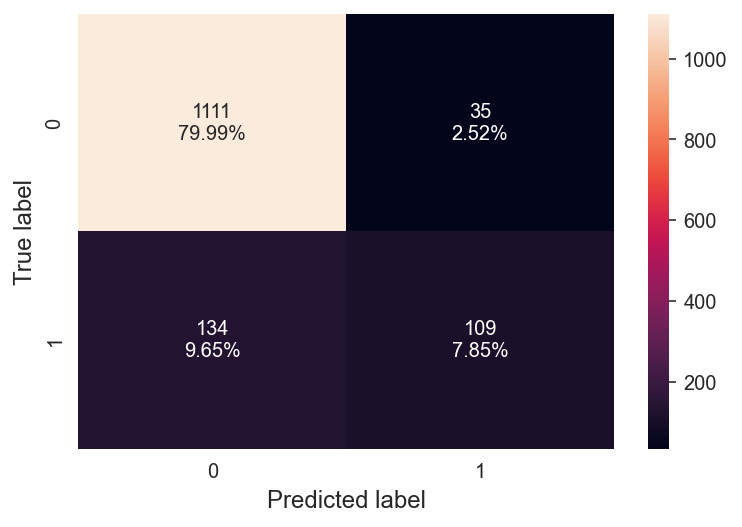

<IPython.core.display.Javascript object>

In [128]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a similar performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

## Model Building - Oversampled data

In [129]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of X_train_over: {}".format(X_train_over.shape))
print("After Oversampling, the shape of y_train_over: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 969
Before Oversampling, counts of label 'No': 4584 

After Oversampling, counts of label 'Yes': 4584
After Oversampling, counts of label 'No': 4584 

After Oversampling, the shape of X_train_over: (9168, 24)
After Oversampling, the shape of y_train_over: (9168,) 



<IPython.core.display.Javascript object>

### Logistic Regression on Oversampled Data

In [130]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

#### Let's check the model performance on train and validation set

In [131]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.790576  0.762653   0.807763  0.78456

<IPython.core.display.Javascript object>

In [132]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0   0.74514  0.547325   0.352785  0.429032

<IPython.core.display.Javascript object>

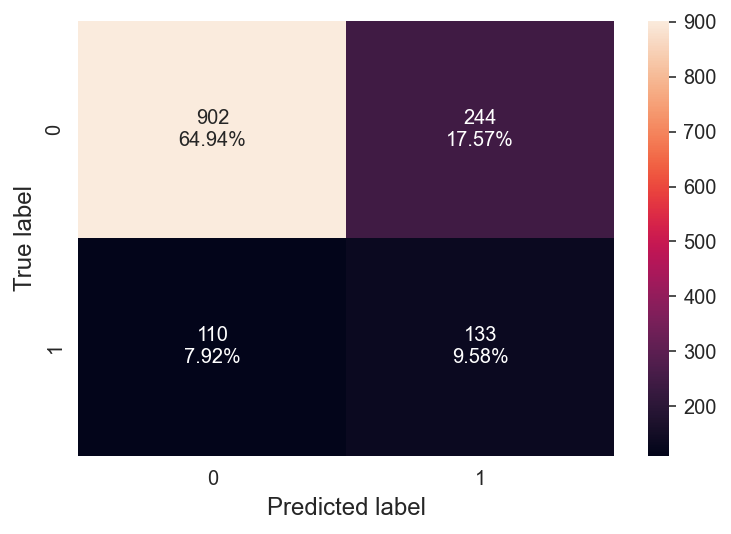

<IPython.core.display.Javascript object>

In [133]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try:

  a) Regularization to see if overfitting can be reduced

  b) Undersampling the train to handle the imbalance between classes and check the model performance.

### Regularization

In [134]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

<IPython.core.display.Javascript object>

In [135]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.701134  0.634599   0.732008  0.679832

<IPython.core.display.Javascript object>

In [136]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.764579  0.641975   0.393939  0.488263

<IPython.core.display.Javascript object>

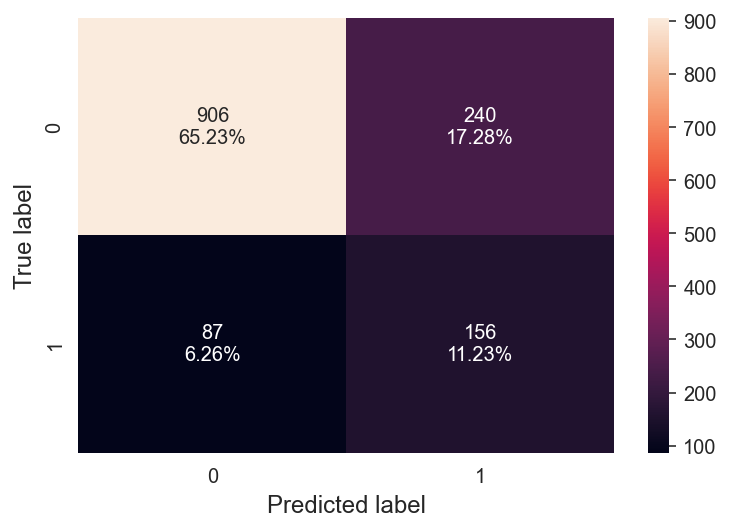

<IPython.core.display.Javascript object>

In [137]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

* After regularization, overfitting has reduced to some extent.
* Let's try undersampling now.

## Model Building - Undersampled data

### Undersampling Train data using Random Under Sampler

In [138]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [139]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 969
Before Undersampling, counts of label 'No': 4584 

After Undersampling, counts of label 'Yes': 969
After Undersampling, counts of label 'No': 969 

After Undersampling, the shape of train_X: (1938, 24)
After Undersampling, the shape of train_y: (1938,) 



<IPython.core.display.Javascript object>

### Logistic Regression on undersampled data

In [140]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

#### Let's check the model performance on train and validation set

In [141]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.729102  0.717234   0.734672  0.725849

<IPython.core.display.Javascript object>

In [142]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.727142  0.711934   0.358921  0.477241

<IPython.core.display.Javascript object>

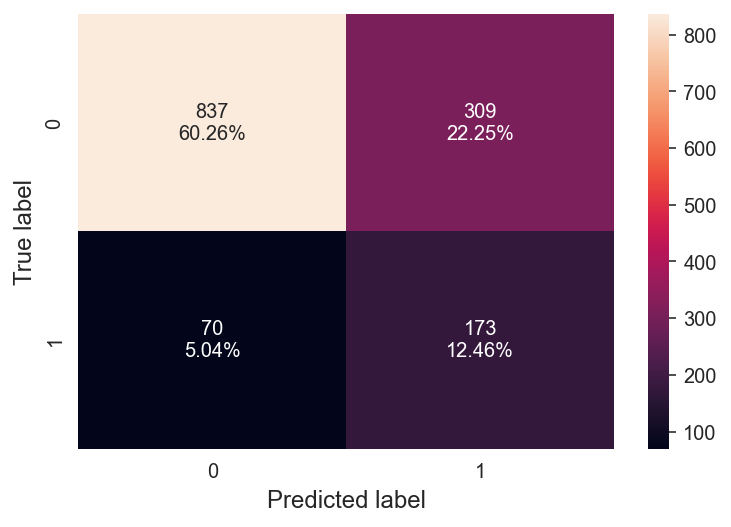

<IPython.core.display.Javascript object>

In [143]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model has given similar recall on training and validation set.
* Model performance has improved using undersampling. 

In [144]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression                         0.877904  0.434469   0.764065  0.553947
Logistic Regression with oversampled data   0.790576  0.762653   0.807763  0.784560
Regularised Logistic Regression             0.701134  0.634599   0.732008  0.679832
Logistic Regression with undersampled data  0.729102  0.717234   0.734672  0.725849

<IPython.core.display.Javascript object>

In [145]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df.T

Validation performance comparison:


Accuracy    Recall  Precision        F1
Logistic Regression                         0.878330  0.448560   0.756944  0.563307
Logistic Regression with oversampled data   0.745140  0.547325   0.352785  0.429032
Regularised Logistic Regression             0.764579  0.641975   0.393939  0.488263
Logistic Regression with undersampled data  0.727142  0.711934   0.358921  0.477241

<IPython.core.display.Javascript object>

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [146]:
# Calculating different metrics on validation set
log_reg_under_test_perf = model_performance_classification_sklearn(
    log_reg_under, X_test, y_test
)
print("Test performance:")
log_reg_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.752304  0.719472   0.387211  0.503464

<IPython.core.display.Javascript object>

<h2><font face="arial", color='darkblue', size="6", text-align="left"><strong>Decision Tree Classifier</strong></font></h2>

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.<p>

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.<p>

* In this case, we can pass a dictionary {0:0.18, 1:0.82} to the model to specify the weight of each class and the decision tree will give more weightage to class 0.<p>

* class_weight is a hyperparameter for the decision tree classifier.<p>

In [147]:
# weights given to the classifier are opposite to this distribution
data["Attrition_Flag"].value_counts(1)

0    0.825421
1    0.174579
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [148]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.175, 1: 0.825}, random_state=1
)

<IPython.core.display.Javascript object>

In [149]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.175, 1: 0.825}, random_state=1)

<IPython.core.display.Javascript object>

In [150]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [151]:
# Calculating different metrics on validation set
dtree_model_val_perf = model_performance_classification_sklearn(dtree, X_val, y_val)
print("Validation performance:")
dtree_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.908567  0.720165   0.747863  0.733753

<IPython.core.display.Javascript object>

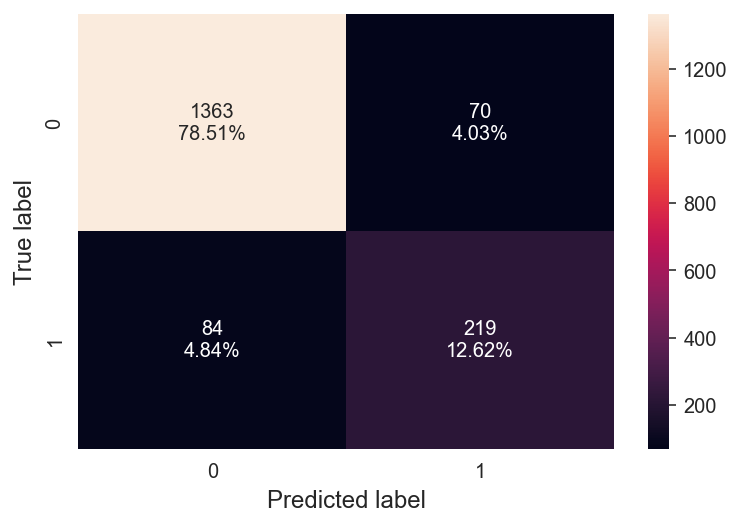

<IPython.core.display.Javascript object>

In [152]:
confusion_matrix_sklearn(dtree, X_test, y_test)

* Decision tree is working well on the training data but is not able to generalize well on validation data w.r.t recall.

### Decision Tree on Oversampled Data

In [153]:
dtree_over = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.175, 1: 0.825}, random_state=1
)

# Training the basic logistic regression model with training set
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight={0: 0.175, 1: 0.825}, random_state=1)

<IPython.core.display.Javascript object>

In [154]:
# Calculating different metrics on train set
dtree_over_train_perf = model_performance_classification_sklearn(
    dtree_over, X_train_over, y_train_over
)
print("Training performance:")
dtree_over_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [155]:
# Calculating different metrics on validation set
dtree_over_val_perf = model_performance_classification_sklearn(dtree_over, X_val, y_val)
print("Validation performance:")
dtree_over_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.882649  0.73251   0.644928  0.685934

<IPython.core.display.Javascript object>

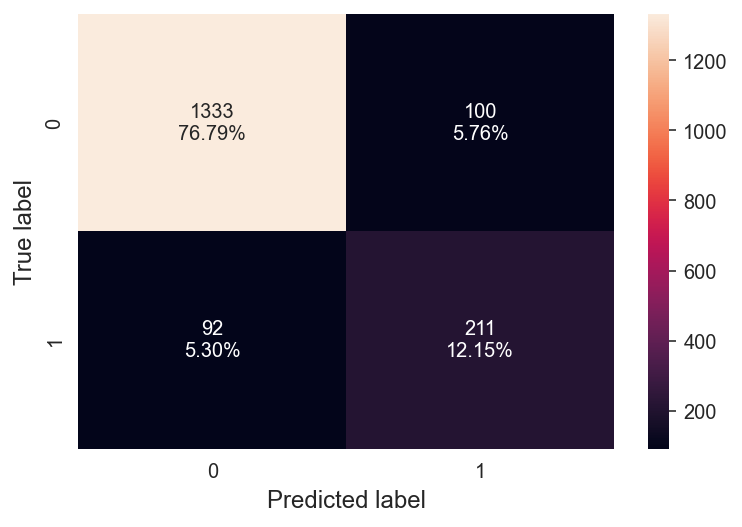

<IPython.core.display.Javascript object>

In [156]:
confusion_matrix_sklearn(dtree_over, X_test, y_test)

* comments about dtree_over performance

### Decision Tree on Undersampled Data

In [157]:
dtree_under = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.175, 1: 0.825}, random_state=1
)

# Training the basic logistic regression model with training set
dtree_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(class_weight={0: 0.175, 1: 0.825}, random_state=1)

<IPython.core.display.Javascript object>

In [158]:
# Calculating different metrics on train set
dtree_under_train_perf = model_performance_classification_sklearn(
    dtree_under, X_train_over, y_train_over
)
print("Training performance:")
dtree_under_train_perf

Training performance:


Accuracy   Recall  Precision        F1
0  0.927901  0.95637    0.90485  0.929897

<IPython.core.display.Javascript object>

In [159]:
# Calculating different metrics on validation set
dtree_under_val_perf = model_performance_classification_sklearn(
    dtree_under, X_val, y_val
)
print("Validation performance:")
dtree_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.856012  0.843621   0.558583  0.672131

<IPython.core.display.Javascript object>

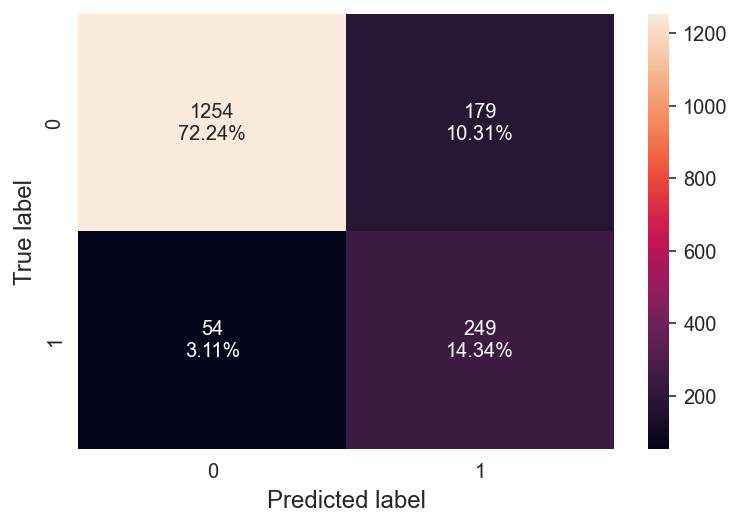

<IPython.core.display.Javascript object>

In [160]:
confusion_matrix_sklearn(dtree_under, X_test, y_test)

* comments about dtree_under performance

## Bagging Classifier

In [161]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [162]:
# Calculating different metrics on train set
bagging_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance:")
bagging_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.995498  0.976264    0.99789  0.986959

<IPython.core.display.Javascript object>

In [163]:
# Calculating different metrics on validation set
bagging_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance:")
bagging_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.944564  0.794239   0.877273  0.833693

<IPython.core.display.Javascript object>

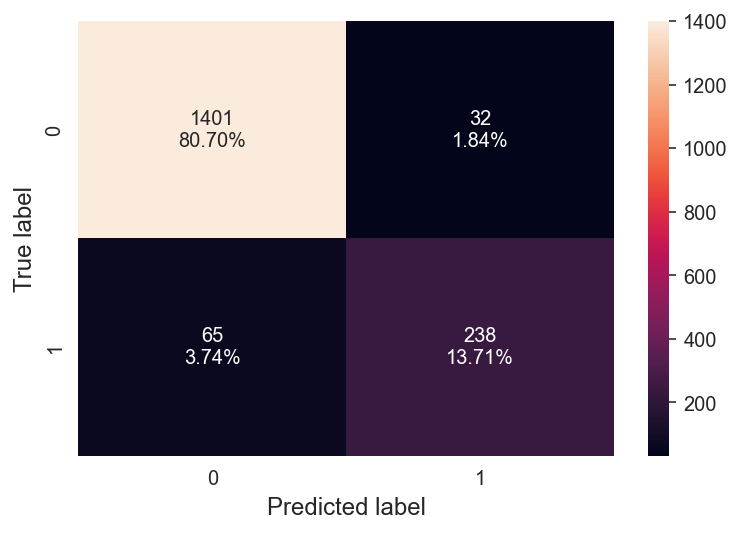

<IPython.core.display.Javascript object>

In [164]:
confusion_matrix_sklearn(bagging, X_test, y_test)

* Comments about Bagging classifier performance.

### Bagging Classifier with weighted decision tree

In [165]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.175, 1: 0.825}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.175,
                                                                      1: 0.825},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

In [166]:
# Calculating different metrics on train set
bagging_wt_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
print("Training performance:")
bagging_wt_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.995318  0.975232   0.997888  0.98643

<IPython.core.display.Javascript object>

In [167]:
# Calculating different metrics on validation set
bagging_wt_val_perf = model_performance_classification_sklearn(bagging_wt, X_val, y_val)
print("Training performance:")
bagging_wt_val_perf

Training performance:


Accuracy   Recall  Precision        F1
0  0.930166  0.73251   0.847619  0.785872

<IPython.core.display.Javascript object>

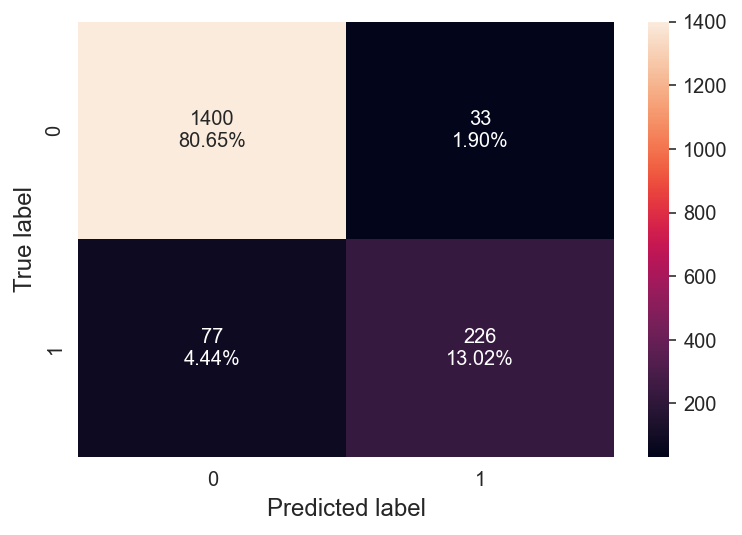

<IPython.core.display.Javascript object>

In [168]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

* Comments on Bagging Weighted Classifier performance

### Bagging Classifier Weighted with Oversampled data

In [169]:
bagging_wt_over = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.175, 1: 0.825}, random_state=1
    ),
    random_state=1,
)
bagging_wt_over.fit(X_train_over, y_train_over)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.175,
                                                                      1: 0.825},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

In [170]:
# Calculating different metrics on train set
bagging_wt_over_train_perf = model_performance_classification_sklearn(
    bagging_wt_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_wt_over_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.997382  0.996728   0.998034  0.99738

<IPython.core.display.Javascript object>

In [171]:
# Calculating different metrics on validation set
bagging_wt_over_val_perf = model_performance_classification_sklearn(
    bagging_wt_over, X_val, y_val
)
print("Training performance:")
bagging_wt_over_val_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.914327  0.757202   0.754098  0.755647

<IPython.core.display.Javascript object>

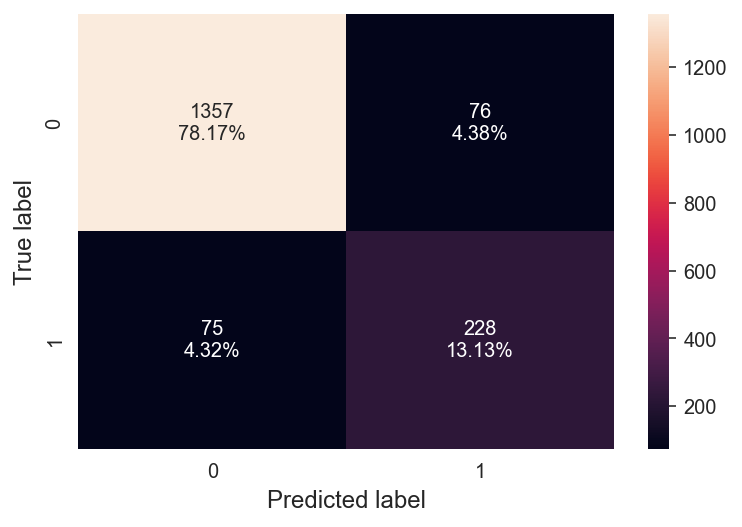

<IPython.core.display.Javascript object>

In [172]:
confusion_matrix_sklearn(bagging_wt_over, X_test, y_test)

* Comments on Bagging Weighted on Oversampled data performance

### Bagging Classifier Weighted with Undersampled Data

In [173]:
bagging_wt_under = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.175, 1: 0.825}, random_state=1
    ),
    random_state=1,
)
bagging_wt_under.fit(X_train_un, y_train_un)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.175,
                                                                      1: 0.825},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

In [174]:
# Calculating different metrics on train set
bagging_wt_under_train_perf = model_performance_classification_sklearn(
    bagging_wt_under, X_train_un, y_train_un
)
print("Training performance:")
bagging_wt_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.995356  0.993808   0.996894  0.995349

<IPython.core.display.Javascript object>

In [175]:
# Calculating different metrics on validation set
bagging_wt_under_val_perf = model_performance_classification_sklearn(
    bagging_wt_under, X_val, y_val
)
print("Training performance:")
bagging_wt_under_val_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.88121  0.872428   0.612717  0.719864

<IPython.core.display.Javascript object>

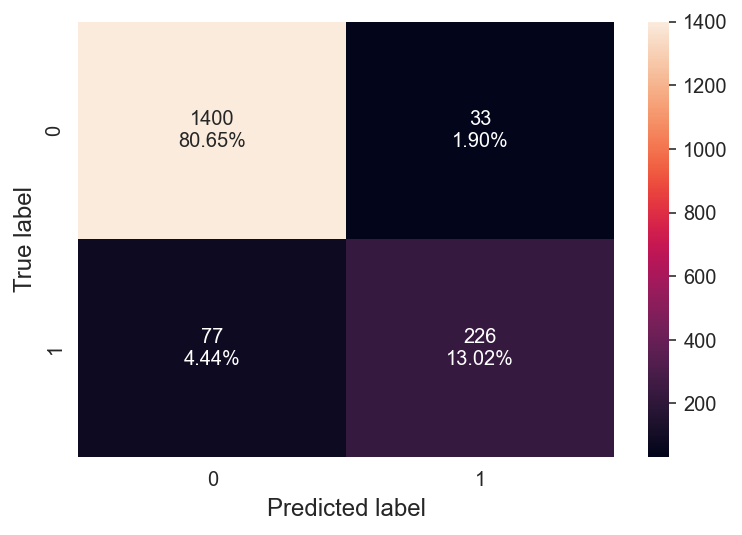

<IPython.core.display.Javascript object>

In [176]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

* Comments on Bagging Classifier Weighted witn Undersampled data

### Random Forest Classifier

In [177]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [178]:
# Calculating different metrics on train set
rf_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance:")
rf_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [179]:
# Calculating different metrics on validation set
rf_val_perf = model_performance_classification_sklearn(rf, X_val, y_val)
print("Training performance:")
rf_val_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.939525  0.716049   0.920635  0.805556

<IPython.core.display.Javascript object>

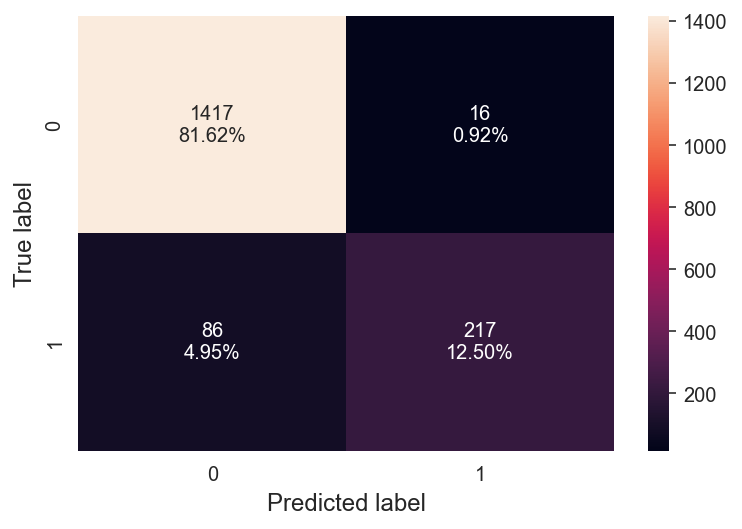

<IPython.core.display.Javascript object>

In [180]:
confusion_matrix_sklearn(rf, X_test, y_test)

* Comments on Random Forest performance.

### Random Forest with class weights

In [181]:
rf_wt = RandomForestClassifier(class_weight={0: 0.175, 1: 0.825}, random_state=1)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.175, 1: 0.825}, random_state=1)

<IPython.core.display.Javascript object>

In [182]:
# Calculating different metrics on train set
rf_wt_train_perf = model_performance_classification_sklearn(rf_wt, X_train, y_train)
print("Training performance:")
rf_wt_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [183]:
# Calculating different metrics on validation set
rf_wt_val_perf = model_performance_classification_sklearn(rf_wt, X_val, y_val)
print("Validation performance:")
rf_wt_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.934485  0.679012   0.926966  0.783848

<IPython.core.display.Javascript object>

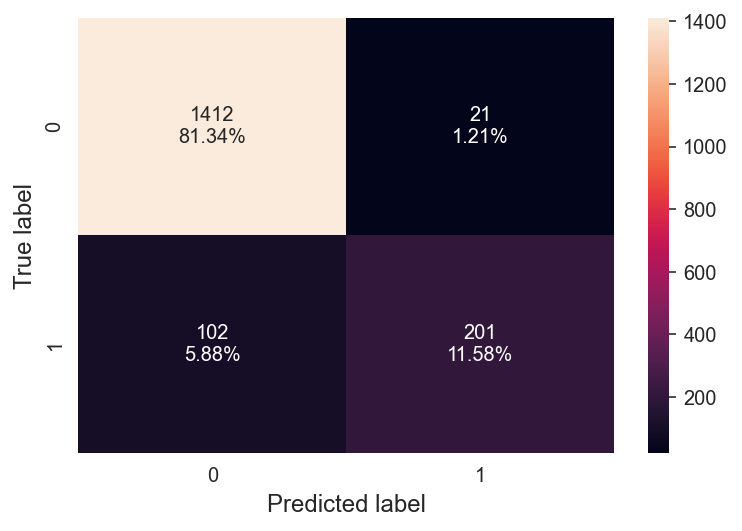

<IPython.core.display.Javascript object>

In [184]:
confusion_matrix_sklearn(rf_wt, X_test, y_test)

* Comments on Random Forest Weighted performance.

### Random Forest Classifier with Oversampled data

In [185]:
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [186]:
# Calculating different metrics on train set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [187]:
# Calculating different metrics on validation set
rf_over_val_perf = model_performance_classification_sklearn(rf_over, X_val, y_val)
print("Training performance:")
rf_over_val_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.928726  0.786008   0.802521  0.794179

<IPython.core.display.Javascript object>

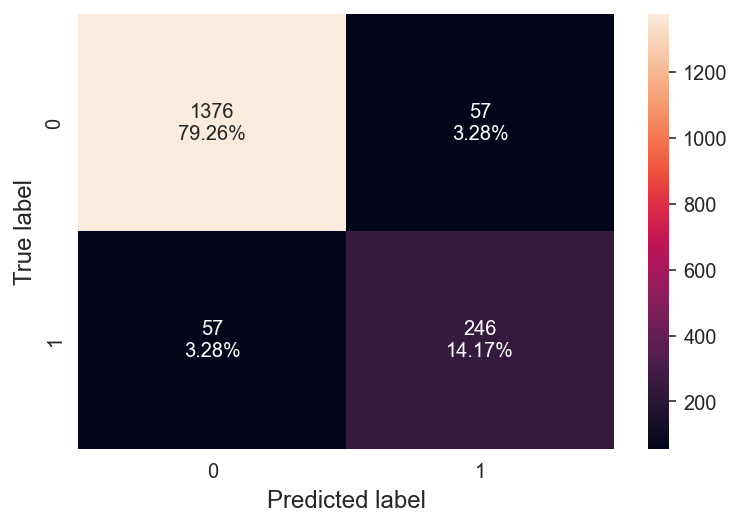

<IPython.core.display.Javascript object>

In [188]:
confusion_matrix_sklearn(rf_over, X_test, y_test)

* Comments on Random Forest with oversampled data performance.

### Random Forest Classifier with Undersampled data

In [189]:
rf_under = RandomForestClassifier(random_state=1)
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [190]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    rf_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [191]:
# Calculating different metrics on validation set
rf_under_val_perf = model_performance_classification_sklearn(rf_under, X_val, y_val)
print("Validation performance:")
rf_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.900648  0.888889    0.66055  0.757895

<IPython.core.display.Javascript object>

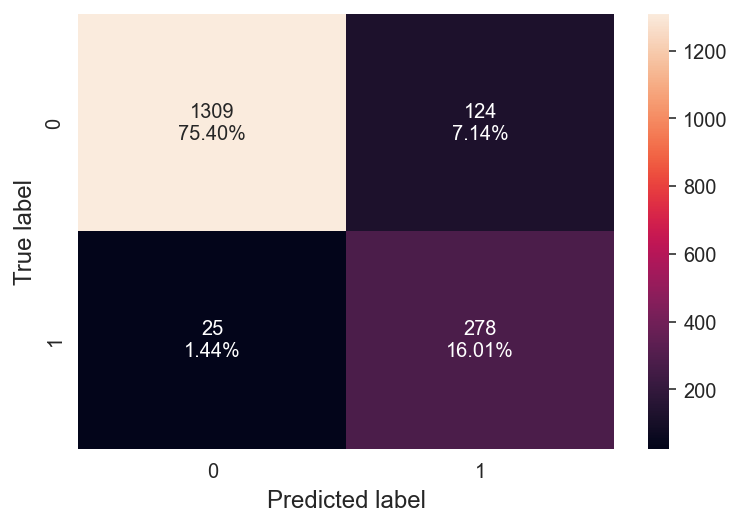

<IPython.core.display.Javascript object>

In [192]:
confusion_matrix_sklearn(rf_under, X_test, y_test)

* Comments on Random Forest with undersampled data performance.

### Adaboost Classifier

In [193]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [194]:
# Calculating different metrics on train set
abc_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance:")
abc_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.937331  0.765738   0.859791  0.810044

<IPython.core.display.Javascript object>

In [195]:
# Calculating different metrics on validation set
abc_val_perf = model_performance_classification_sklearn(abc, X_val, y_val)
print("Validation performance:")
abc_val_perf

Validation performance:


Accuracy   Recall  Precision       F1
0  0.925126  0.72428   0.826291  0.77193

<IPython.core.display.Javascript object>

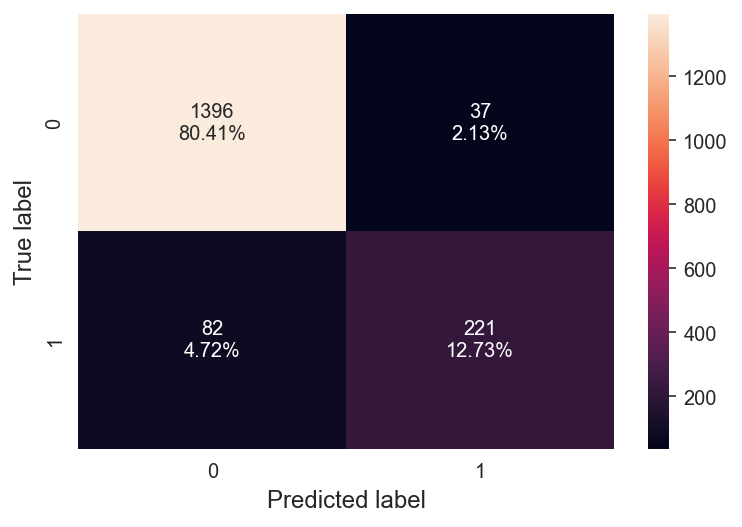

<IPython.core.display.Javascript object>

In [196]:
confusion_matrix_sklearn(abc, X_test, y_test)

* Comments on Adaboost classifier performance.

### Adaboost Classifier with Oversampled data

In [197]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [198]:
# Calculating different metrics on train set
abc_over_train_perf = model_performance_classification_sklearn(
    abc, X_train_over, y_train_over
)
print("Training performance:")
abc_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.866928  0.760253   0.966445  0.851038

<IPython.core.display.Javascript object>

In [199]:
# Calculating different metrics on validation set
abc_over_val_perf = model_performance_classification_sklearn(abc_over, X_val, y_val)
print("Validation performance:")
abc_over_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.901368  0.761317   0.700758  0.729783

<IPython.core.display.Javascript object>

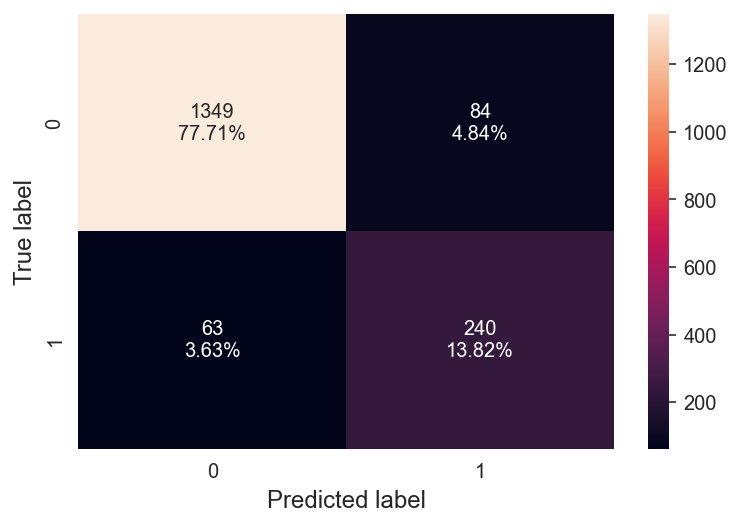

<IPython.core.display.Javascript object>

In [200]:
confusion_matrix_sklearn(abc_over, X_test, y_test)

* Comments on Adaboost classifier with oversampled data performance.

### Adaboost Classifier with Undersampled data

In [201]:
abc_under = AdaBoostClassifier(random_state=1)
abc_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [202]:
# Calculating different metrics on train set
abc_under_train_perf = model_performance_classification_sklearn(
    abc_under, X_train_un, y_train_un
)
print("Training performance:")
abc_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.927245  0.930857    0.92418  0.927506

<IPython.core.display.Javascript object>

In [203]:
# Calculating different metrics on validation set
abc_under_val_perf = model_performance_classification_sklearn(abc_under, X_val, y_val)
print("Validation performance:")
abc_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.87113  0.884774   0.587432  0.706076

<IPython.core.display.Javascript object>

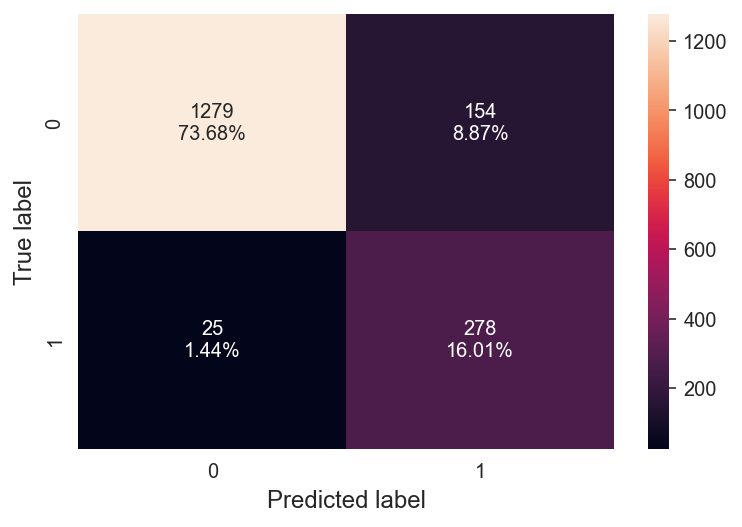

<IPython.core.display.Javascript object>

In [204]:
confusion_matrix_sklearn(abc_under, X_test, y_test)

* Comments on Adaboost classifier with undersampled data performance.

### Gradient Boosting Classifier

In [205]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [206]:
# Calculating different metrics on train set
gbc_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
print("Training performance:")
gbc_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.960202  0.835913   0.928899  0.879957

<IPython.core.display.Javascript object>

In [207]:
# Calculating different metrics on validation set
gbc_val_perf = model_performance_classification_sklearn(gbc, X_val, y_val)
print("Validation performance:")
gbc_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.940245  0.753086    0.88835  0.815145

<IPython.core.display.Javascript object>

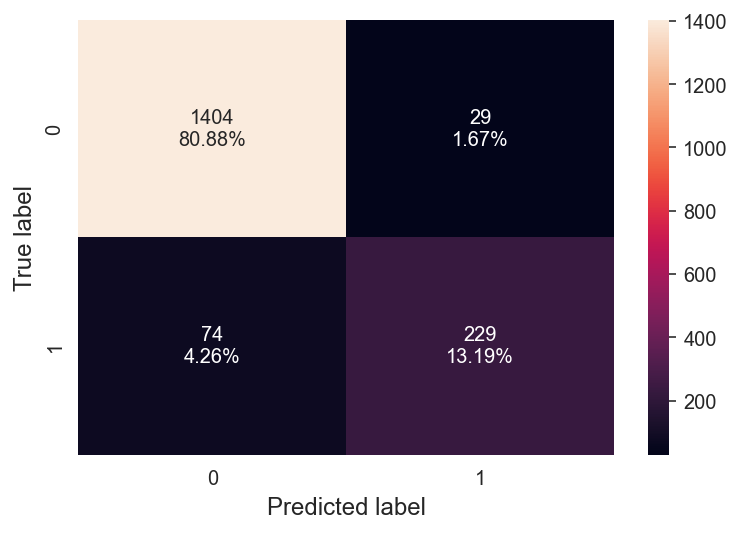

<IPython.core.display.Javascript object>

In [208]:
confusion_matrix_sklearn(gbc, X_test, y_test)

* Comments on Gradient Boosting Classifier performance.

### Gradient Boosting Classifier with Oversampled data

In [209]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [210]:
# Calculating different metrics on train set
gbc_over_train_perf = model_performance_classification_sklearn(
    gbc_over, X_train_over, y_train_over
)
print("Training performance:")
gbc_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.96586  0.966841   0.964947  0.965893

<IPython.core.display.Javascript object>

In [211]:
# Calculating different metrics on validation set
gbc_over_val_perf = model_performance_classification_sklearn(gbc_over, X_val, y_val)
print("Validation performance:")
gbc_over_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.935205  0.839506        0.8  0.819277

<IPython.core.display.Javascript object>

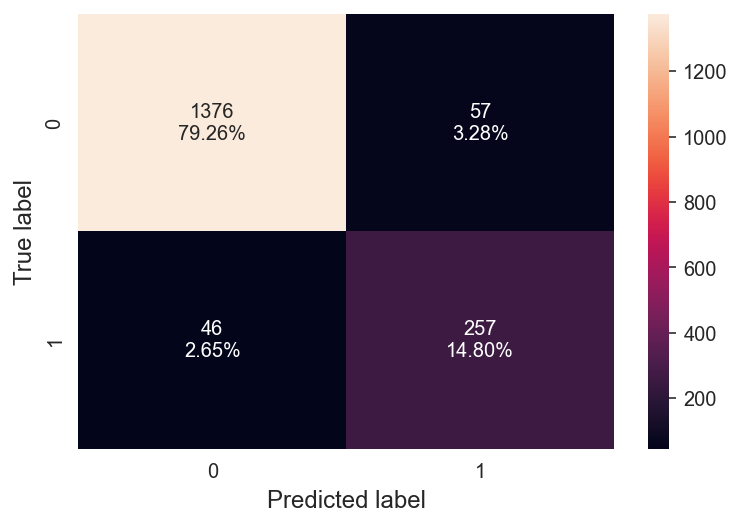

<IPython.core.display.Javascript object>

In [212]:
confusion_matrix_sklearn(gbc_over, X_test, y_test)

* Comments on Gradient Boosting Classifier with oversampled data performance.

### Gradient Boosting Classifier with Undersampled data

In [213]:
gbc_under = GradientBoostingClassifier(random_state=1)
gbc_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [214]:
# Calculating different metrics on train set
gbc_under_train_perf = model_performance_classification_sklearn(
    gbc_under, X_train_un, y_train_un
)
print("Training performance:")
gbc_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.964396  0.966976   0.962012  0.964488

<IPython.core.display.Javascript object>

In [215]:
# Calculating different metrics on validation set
gbc_under_val_perf = model_performance_classification_sklearn(gbc_under, X_val, y_val)
print("Validation performance:")
gbc_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.918647  0.921811   0.704403  0.798574

<IPython.core.display.Javascript object>

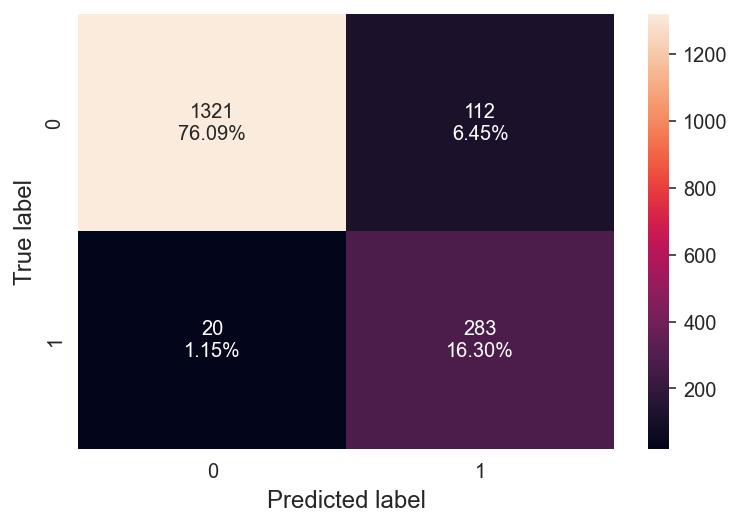

<IPython.core.display.Javascript object>

In [216]:
confusion_matrix_sklearn(gbc_under, X_test, y_test)

* Comments on Gradient Boosting Classifier with underbalanced data performance.

### XGBoost Classifier

In [217]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [218]:
# Calculating different metrics on train set
xgb_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
print("Training performance:")
xgb_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [219]:
# Calculating different metrics on validation set
xgb_val_perf = model_performance_classification_sklearn(xgb, X_val, y_val)
print("Validation performance:")
xgb_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.951764  0.82716   0.889381  0.857143

<IPython.core.display.Javascript object>

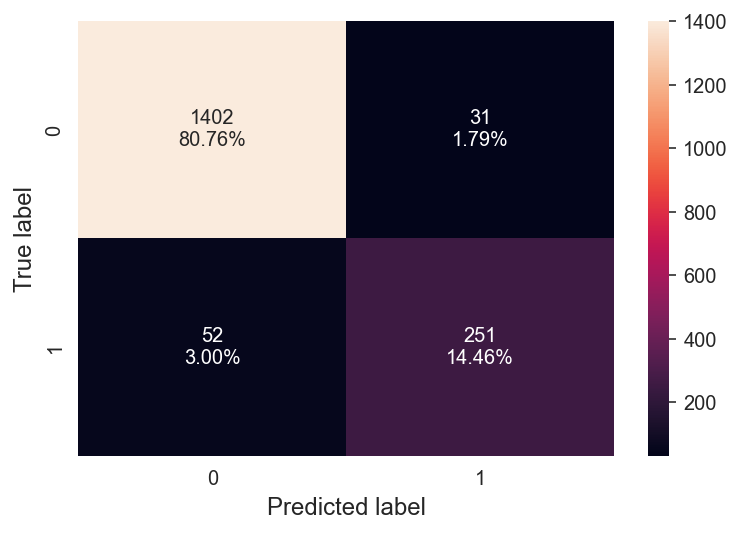

<IPython.core.display.Javascript object>

In [220]:
confusion_matrix_sklearn(xgb, X_test, y_test)

* Comments on XGBoost classifier performance.

### XGBoost Classifier with Oversampled data

In [221]:
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [222]:
# Calculating different metrics on train set
xgb_over_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
print("Training performance:")
xgb_over_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [223]:
# Calculating different metrics on validation set
xgb_over_val_perf = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print("Validation performance:")
xgb_over_val_perf

Validation performance:


Accuracy   Recall  Precision      F1
0  0.943844  0.82716   0.848101  0.8375

<IPython.core.display.Javascript object>

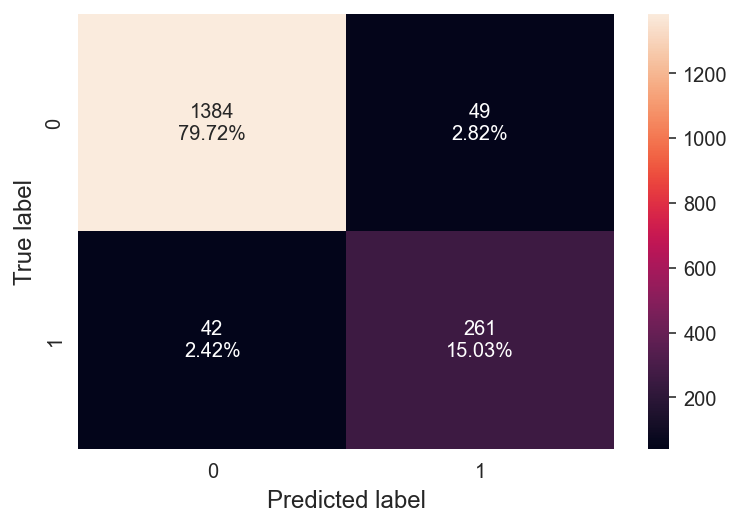

<IPython.core.display.Javascript object>

In [224]:
confusion_matrix_sklearn(xgb_over, X_test, y_test)

* Comments on XGBoost classifier with oversampled data performance.

### XGBoost Classifier with Undersampled data

In [225]:
xgb_under = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [226]:
# Calculating different metrics on train set
xgb_under_train_perf = model_performance_classification_sklearn(
    xgb_under, X_train_un, y_train_un
)
print("Training performance:")
xgb_under_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [227]:
# Calculating different metrics on validation set
xgb_under_val_perf = model_performance_classification_sklearn(xgb_under, X_val, y_val)
print("Validation performance:")
xgb_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.909287  0.909465       0.68  0.778169

<IPython.core.display.Javascript object>

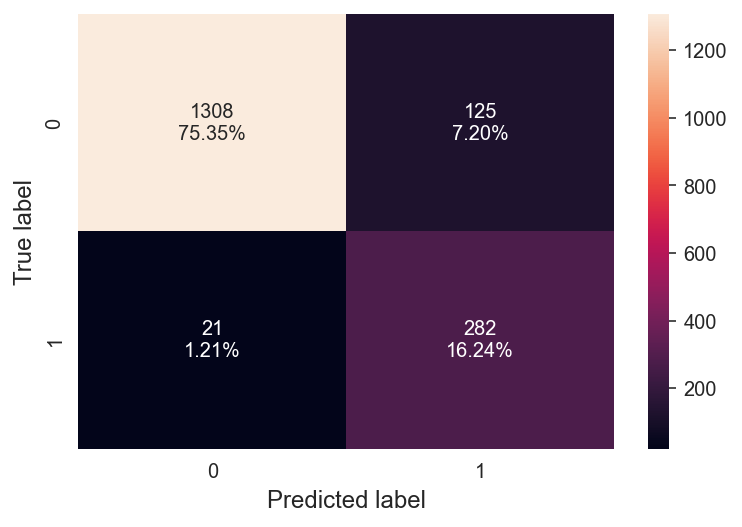

<IPython.core.display.Javascript object>

In [228]:
confusion_matrix_sklearn(xgb_under, X_test, y_test)

* Comments on XGBoost classifier with undersampled data performance.

## Hyperparameter tuning using randomized search

In [229]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
        dtree_model_train_perf.T,
        dtree_over_train_perf.T,
        dtree_under_train_perf.T,
        bagging_train_perf.T,
        bagging_wt_train_perf.T,
        bagging_wt_over_train_perf.T,
        bagging_wt_under_train_perf.T,
        rf_train_perf.T,
        rf_wt_train_perf.T,
        rf_over_train_perf.T,
        rf_under_train_perf.T,
        abc_train_perf.T,
        abc_over_train_perf.T,
        abc_under_train_perf.T,
        gbc_train_perf.T,
        gbc_over_train_perf.T,
        gbc_under_train_perf.T,
        xgb_train_perf.T,
        xgb_over_train_perf.T,
        xgb_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
    "Decision Tree",
    "Decision Tree with oversampled data",
    "Decision Tree with undersampled data",
    "Bagging",
    "Bagging weighted",
    "Bagging weighted with oversampled data",
    "Bagging weighted with undersampled data",
    "Random Forest",
    "Random Forest weighted",
    "Random Forest with oversampled data",
    "Random Forest with undersampled data",
    "AdaBoost",
    "AdaBoost with oversampled data",
    "AdaBoost with undersampled data",
    "Gradient Boosting",
    "Gradient Boosting with oversampled data",
    "Gradient Boosting with undersampled data",
    "XGBoost",
    "XGBoost with oversampled data",
    "XGBoost with undersampled data",
]

<IPython.core.display.Javascript object>

In [230]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
        dtree_model_val_perf.T,
        dtree_over_val_perf.T,
        dtree_under_val_perf.T,
        bagging_val_perf.T,
        bagging_wt_val_perf.T,
        bagging_wt_over_val_perf.T,
        bagging_wt_under_val_perf.T,
        rf_val_perf.T,
        rf_wt_val_perf.T,
        rf_over_val_perf.T,
        rf_under_val_perf.T,
        abc_val_perf.T,
        abc_over_val_perf.T,
        abc_under_val_perf.T,
        gbc_val_perf.T,
        gbc_over_val_perf.T,
        gbc_under_val_perf.T,
        xgb_val_perf.T,
        xgb_over_val_perf.T,
        xgb_under_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
    "Decision Tree",
    "Decision Tree with oversampled data",
    "Decision Tree with undersampled data",
    "Bagging",
    "Bagging weighted",
    "Bagging weighted with oversampled data",
    "Bagging weighted with undersampled data",
    "Random Forest",
    "Random Forest weighted",
    "Random Forest with oversampled data",
    "Random Forest with undersampled data",
    "AdaBoost",
    "AdaBoost with oversampled data",
    "AdaBoost with undersampled data",
    "Gradient Boosting",
    "Gradient Boosting with oversampled data",
    "Gradient Boosting with undersampled data",
    "XGBoost",
    "XGBoost with oversampled data",
    "XGBoost with undersampled data",
]

<IPython.core.display.Javascript object>

In [231]:
all_models_untuned_performance = pd.concat(
    [models_train_comp_df.T, models_val_comp_df.T], axis=1
)
all_models_untuned_performance

Accuracy    Recall  Precision        F1  Accuracy    Recall  Precision        F1
Logistic Regression                         0.877904  0.434469   0.764065  0.553947  0.878330  0.448560   0.756944  0.563307
Logistic Regression with oversampled data   0.790576  0.762653   0.807763  0.784560  0.745140  0.547325   0.352785  0.429032
Regularised Logistic Regression             0.701134  0.634599   0.732008  0.679832  0.764579  0.641975   0.393939  0.488263
Logistic Regression with undersampled data  0.729102  0.717234   0.734672  0.725849  0.727142  0.711934   0.358921  0.477241
Decision Tree                               1.000000  1.000000   1.000000  1.000000  0.908567  0.720165   0.747863  0.733753
Decision Tree with oversampled data         1.000000  1.000000   1.000000  1.000000  0.882649  0.732510   0.644928  0.685934
Decision Tree with undersampled data        0.927901  0.956370   0.904850  0.929897  0.856012  0.843621   0.558583  0.672131
Bagging                                     0.995498  0.976264   0.997890  0.986959  0.944564  0.794239   0.877273  0.833693
Bagging weighted                            0.995318  0.975232   0.997888  0.986430  0.930166  0.732510   0.847619  0.785872
Bagging weighted with oversampled data      0.997382  0.996728   0.998034  0.997380  0.914327  0.757202   0.754098  0.755647
Bagging weighted with undersampled data     0.995356  0.993808   0.996894  0.995349  0.881210  0.872428   0.612717  0.719864
Random Forest                               1.000000  1.000000   1.000000  1.000000  0.939525  0.716049   0.920635  0.805556
Random Forest weighted                      1.000000  1.000000   1.000000  1.000000  0.934485  0.679012   0.926966  0.783848
Random Forest with oversampled data         1.000000  1.000000   1.000000  1.000000  0.928726  0.786008   0.802521  0.794179
Random Forest with undersampled data        1.000000  1.000000   1.000000  1.000000  0.900648  0.888889   0.660550  0.757895
AdaBoost                                    0.937331  0.765738   0.859791  0.810044  0.925126  0.724280   0.826291  0.771930
AdaBoost with oversampled data              0.866928  0.760253   0.966445  0.851038  0.901368  0.761317   0.700758  0.729783
AdaBoost with undersampled data             0.927245  0.930857   0.924180  0.927506  0.871130  0.884774   0.587432  0.706076
Gradient Boosting                           0.960202  0.835913   0.928899  0.879957  0.940245  0.753086   0.888350  0.815145
Gradient Boosting with oversampled data     0.965860  0.966841   0.964947  0.965893  0.935205  0.839506   0.800000  0.819277
Gradient Boosting with undersampled data    0.964396  0.966976   0.962012  0.964488  0.918647  0.921811   0.704403  0.798574
XGBoost                                     1.000000  1.000000   1.000000  1.000000  0.951764  0.827160   0.889381  0.857143
XGBoost with oversampled data               1.000000  1.000000   1.000000  1.000000  0.943844  0.827160   0.848101  0.837500
XGBoost with undersampled data              1.000000  1.000000   1.000000  1.000000  0.909287  0.909465   0.680000  0.778169

<IPython.core.display.Javascript object>

### Model Selection for Tuning

* As our metric of interest is `'Recall'` we will focus our attention on that particular attribute.

* We will review results in backward mode: from the validation results to training results.

* On the table above the group of `'Accuracy'`, `'Recall'`, `'Precision'`, and `'F1'` at the very right are results from **validation**. There set at the left are results from **training**.

* `'Decision Tree with undersampled data'`, has a `'Recall'` on **validation** at `0.843621` and relatively close to its counter-part in **training** at `0.956370`.

* `'Bagging weighted with undersampled data'`, has a `'Recall'` on **validation** at `0.872428` and a very good value in **training** at `0.993808`.

* `'Gradient Boosting with undersampled data'`, has a `'Recall'` on **validation** at `0.921811` and a very good value in **training** at `0.966976`. It is probably the most homogeneous result of all model and more stable.

### Models to be tuned using random search

In [232]:
untuned_models_indices = [
    "Decision Tree with undersampled data",
    "Bagging weighted with undersampled data",
    "Gradient Boosting with undersampled data",
]
all_models_untuned_performance.loc[untuned_models_indices]

Accuracy    Recall  Precision        F1  Accuracy    Recall  Precision        F1
Decision Tree with undersampled data      0.927901  0.956370   0.904850  0.929897  0.856012  0.843621   0.558583  0.672131
Bagging weighted with undersampled data   0.995356  0.993808   0.996894  0.995349  0.881210  0.872428   0.612717  0.719864
Gradient Boosting with undersampled data  0.964396  0.966976   0.962012  0.964488  0.918647  0.921811   0.704403  0.798574

<IPython.core.display.Javascript object>

### Tuning the Best 3 models with Randomized Search

### Decision Tree with undersampled data

In [233]:
from scipy.stats import randint

<IPython.core.display.Javascript object>

In [234]:
%%time 

# defining model
model = dtree_under

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, 6, 7, None],
    "min_samples_leaf": randint(1, 9),
    "min_samples_split": [2, 3, 4, 5, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv_dt = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_dt.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_dt.best_params_, randomized_cv_dt.best_score_))

Best parameters are {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5} with CV score=0.8896426472944821:
CPU times: total: 703 ms
Wall time: 9.21 s


<IPython.core.display.Javascript object>

### Bagging weighted with undersampled data

In [235]:
%%time
# defining model
model = bagging_wt_under

# Parameter grid to pass in Randomized GridSearchCV

param_grid = {
    "n_estimators": [10, 20, 30],
    "max_features": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "bootstrap": [True],
    "bootstrap_features": [True],
    "oob_score": [True, False],
    "max_samples": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "max_samples": [0.05, 0.1, 0.2, 0.5, 0.7, 0.9],  # for bootstrap sampling
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_bagg_tuned = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=500,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv_bagg_tuned.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv_bagg_tuned.best_params_, randomized_cv_bagg_tuned.best_score_
    )
)

Best parameters are {'oob_score': True, 'n_estimators': 10, 'max_samples': 0.9, 'max_features': 1.0, 'bootstrap_features': True, 'bootstrap': True} with CV score=0.612018588750601:
CPU times: total: 6.67 s
Wall time: 1min 12s


<IPython.core.display.Javascript object>

### Gradient Boosting with undersampled data -- Tuning

In [236]:
%%time
# defining model
model = gbc_under

param_grid = {
    "n_estimators": np.arange(50, 301, 10),
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3, 0.05],
    "subsample": [0.8, 0.9, 1],
    "max_depth": np.arange(1, 6, 1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_gboost_tuned = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=300,
    scoring=scorer,
    cv=5,
    random_state=1,
)

#Fitting parameters in RandomizedSearchCV
randomized_cv_gboost_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_gboost_tuned.best_params_, randomized_cv_gboost_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1} with CV score=0.8359435927567972:
CPU times: total: 9.69 s
Wall time: 10min 23s


<IPython.core.display.Javascript object>

## Model Performances

### Decision Tree with undersampled data Tuned with randomized CV

In [237]:
# Calculating different metrics on train set
randomized_cv_dt_tuned_under_train_perf = model_performance_classification_sklearn(
    randomized_cv_dt, X_train, y_train
)
print("Training performance:")
randomized_cv_dt_tuned_under_train_perf

Training performance:


Accuracy    Recall  Precision     F1
0  0.898433  0.947368   0.641509  0.765

<IPython.core.display.Javascript object>

In [238]:
# Calculating different metrics on test set
randomized_cv_dt_tuned_under_test_perf = model_performance_classification_sklearn(
    randomized_cv_dt, X_test, y_test
)
print("Training performance:")
randomized_cv_dt_tuned_under_test_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.888249  0.891089    0.62645  0.735695

<IPython.core.display.Javascript object>

### Bagging Weighted with unsersampled data with randomized CV

In [239]:
# Calculating different metrics on train set
randomized_cv_bagg_tuned_under_train_perf = model_performance_classification_sklearn(
    randomized_cv_bagg_tuned, X_train, y_train
)
print("Training performance:")
randomized_cv_bagg_tuned_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.994778  0.970072        1.0  0.984809

<IPython.core.display.Javascript object>

In [240]:
# Calculating different metrics on test set
randomized_cv_bagg_tuned_under_test_perf = model_performance_classification_sklearn(
    randomized_cv_bagg_tuned, X_test, y_test
)
print("Testing performance:")
randomized_cv_bagg_tuned_under_test_perf

Testing performance:


Accuracy    Recall  Precision     F1
0  0.915899  0.584158   0.898477  0.708

<IPython.core.display.Javascript object>

### Gradient Boosting with unsersampled data with randomized CV

In [241]:
# Calculating different metrics on train set
randomized_cv_gboost_tuned_under_train_perf = model_performance_classification_sklearn(
    randomized_cv_gboost_tuned, X_train, y_train
)
print("Training performance:")
randomized_cv_gboost_tuned_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.992076  0.973168    0.98127  0.977202

<IPython.core.display.Javascript object>

In [242]:
# Calculating different metrics on test set
randomized_cv_gboost_tuned_under_test_perf = model_performance_classification_sklearn(
    randomized_cv_gboost_tuned, X_test, y_test
)
print("Testing performance:")
randomized_cv_gboost_tuned_under_test_perf

Testing performance:


Accuracy    Recall  Precision        F1
0  0.950461  0.811881   0.894545  0.851211

<IPython.core.display.Javascript object>

## Comparison of Tuned Models after Randomized CV

In [243]:
# training performance comparison

models_train_tuned_comp_df = pd.concat(
    [
        randomized_cv_dt_under_train_perf.T,
        randomized_cv_bagg_tuned_under_train_perf.T,
        randomized_cv_gboost_tuned_under_train_perf.T,
    ],
    axis=1,
)
models_train_tuned_comp_df.columns = [
    "Randomized CV Tuned Decision Tree with undersampled data",
    "Randomized CV Tuned Bagging weighted with undersampled data",
    "Randomized CV Tuned Gradient Boosting with undersampled data",
]

NameError: name 'randomized_cv_dt_under_train_perf' is not defined

<IPython.core.display.Javascript object>

In [ ]:
# testing performance comparison

models_test_tuned_comp_df = pd.concat(
    [
        randomized_cv_dt_under_test_perf.T,
        randomized_cv_bagg_tuned_under_test_perf.T,
        randomized_cv_gboost_tuned_under_test_perf.T,
    ],
    axis=1,
)
models_test_tuned_comp_df.columns = [
    "Randomized CV Tuned Decision Tree with undersampled data",
    "Randomized CV Tuned Bagging weighted with undersampled data",
    "Randomized CV Tuned Gradient Boosting with undersampled data",
]

In [ ]:
all_models_tuned_performance = pd.concat(
    [models_train_tuned_comp_df.T, models_test_tuned_comp_df.T], axis=1
)
all_models_tuned_performance

## The best model is Randomized CV Tuned Decision Tree with undersampled data showing `Recall` of 0.947368 on `'Training'` and 0.891089 on `'Testing'`.

### Plotting the Decision Tree of the best tuned model

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    randomized_cv_dt.best_estimator_,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
randomized_cv_dt.best_params_

## Productionize the model

* Now, we have a final model. let's use pipelines to put the model into production

In [ ]:
# Separating target variable and other variables
X = data.drop("Attrition_Flag", axis=1)
y = data["Attrition_Flag"]

In [ ]:
# creating a list of all variables
all_features = X.columns
all_features

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def dummifier():
    return pd.get_dummies(X, drop_first=True)

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), all_features), remainder="passthrough"
)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# defining pipe using make_pipeline
dt_clf = DecisionTreeClassifier(
    random_state=1,
    criterion="gini",
    max_depth=6,
    min_samples_leaf=6,
    min_samples_split=5,
)

In [ ]:
pipe = make_pipeline(column_trans, dt_clf)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
# pipe.predict(X_test)

## Actionable Insights & Recommendations

* We have completed the project and recommend the use of the best model for prediction potential `'Attrition'` of customers.<p>

* The model `'Randomized CV Tuned Decision Tree'` has a `'Recall'` of **0.891089** on `'Testing'` and a `'Recall'` of **0.947368** on `'Training'`.<p>

* The model performance could be improved, especially in terms of precision and the bank can use use the model for new customers once desired level of model performance is achieved.<p>
 
- The analysis shows that Total_Revolving_Bal may be a good feature to decide if we will have an attrite customer or not. We can recommend the Bank to keep this indicator sharp.<p>

- Our analysis showed that lower 'Total_Trans_Amt' are more predictive of attrition that higher values.<p>
    
* Also, our results confirm that lower 'Total_Ct_Chng_Q4_Q1' are slightly better predictors of attrition that higher values.<p>
